# T cells mapped to T2T version 2.0
# Day 6 post EP for CRISPoff and unedited
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Date: Aug. 2, 2025
Modify the window of the input size

In [39]:

import sys
from pathlib import Path
from datetime import datetime

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

In [2]:
system_info()
date_today = datetime.today().strftime('%Y-%m-%d')
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
reg_genome_version = "t2t_v2_0"
region_chr = 'chr1'

# 6500bps: EXACT cutting region  
# chr1:206,583,334-206,589,873
region_start = 206583334    + 20
region_end = 206589874      - 20 
# CD55 TSS start: chr1:206586828-206606065 (+)
# (before TSS: 3474, after TSS: 3026 bps)

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}') 

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

# Look at UNEDITED (NT = Not Treated) T cells at day 6 post EP (with no proteins)


In [3]:
unedit_bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# day 6:  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
unedit_bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

experiment_name =  day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

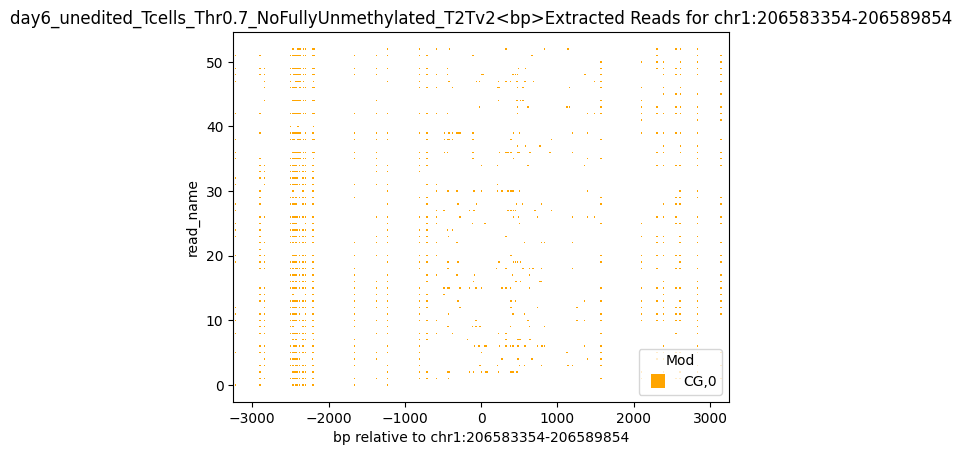

Found read coordinates: 53 reads
Unique read names with methylation: 53
Found 26 reads with full coverage
Reads with methylation data: 53
Overlap between full coverage and methylation: 26
After full coverage filtering: 662 reads with methylation data
Final result: 662 reads with methylation information out of 53 total reads


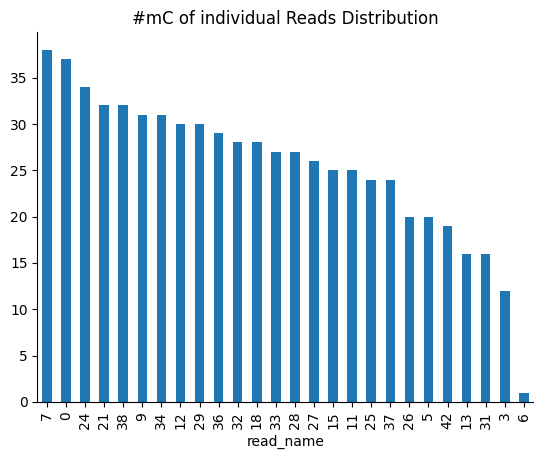

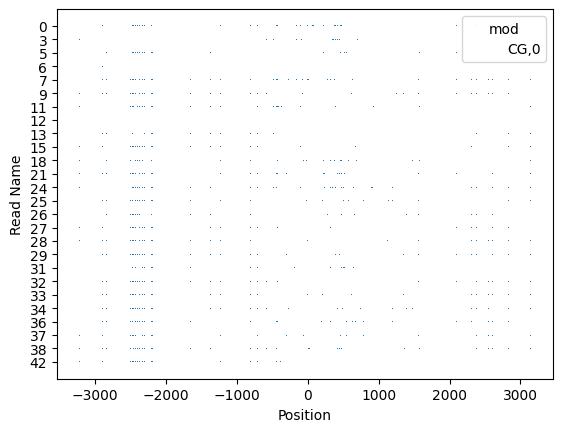

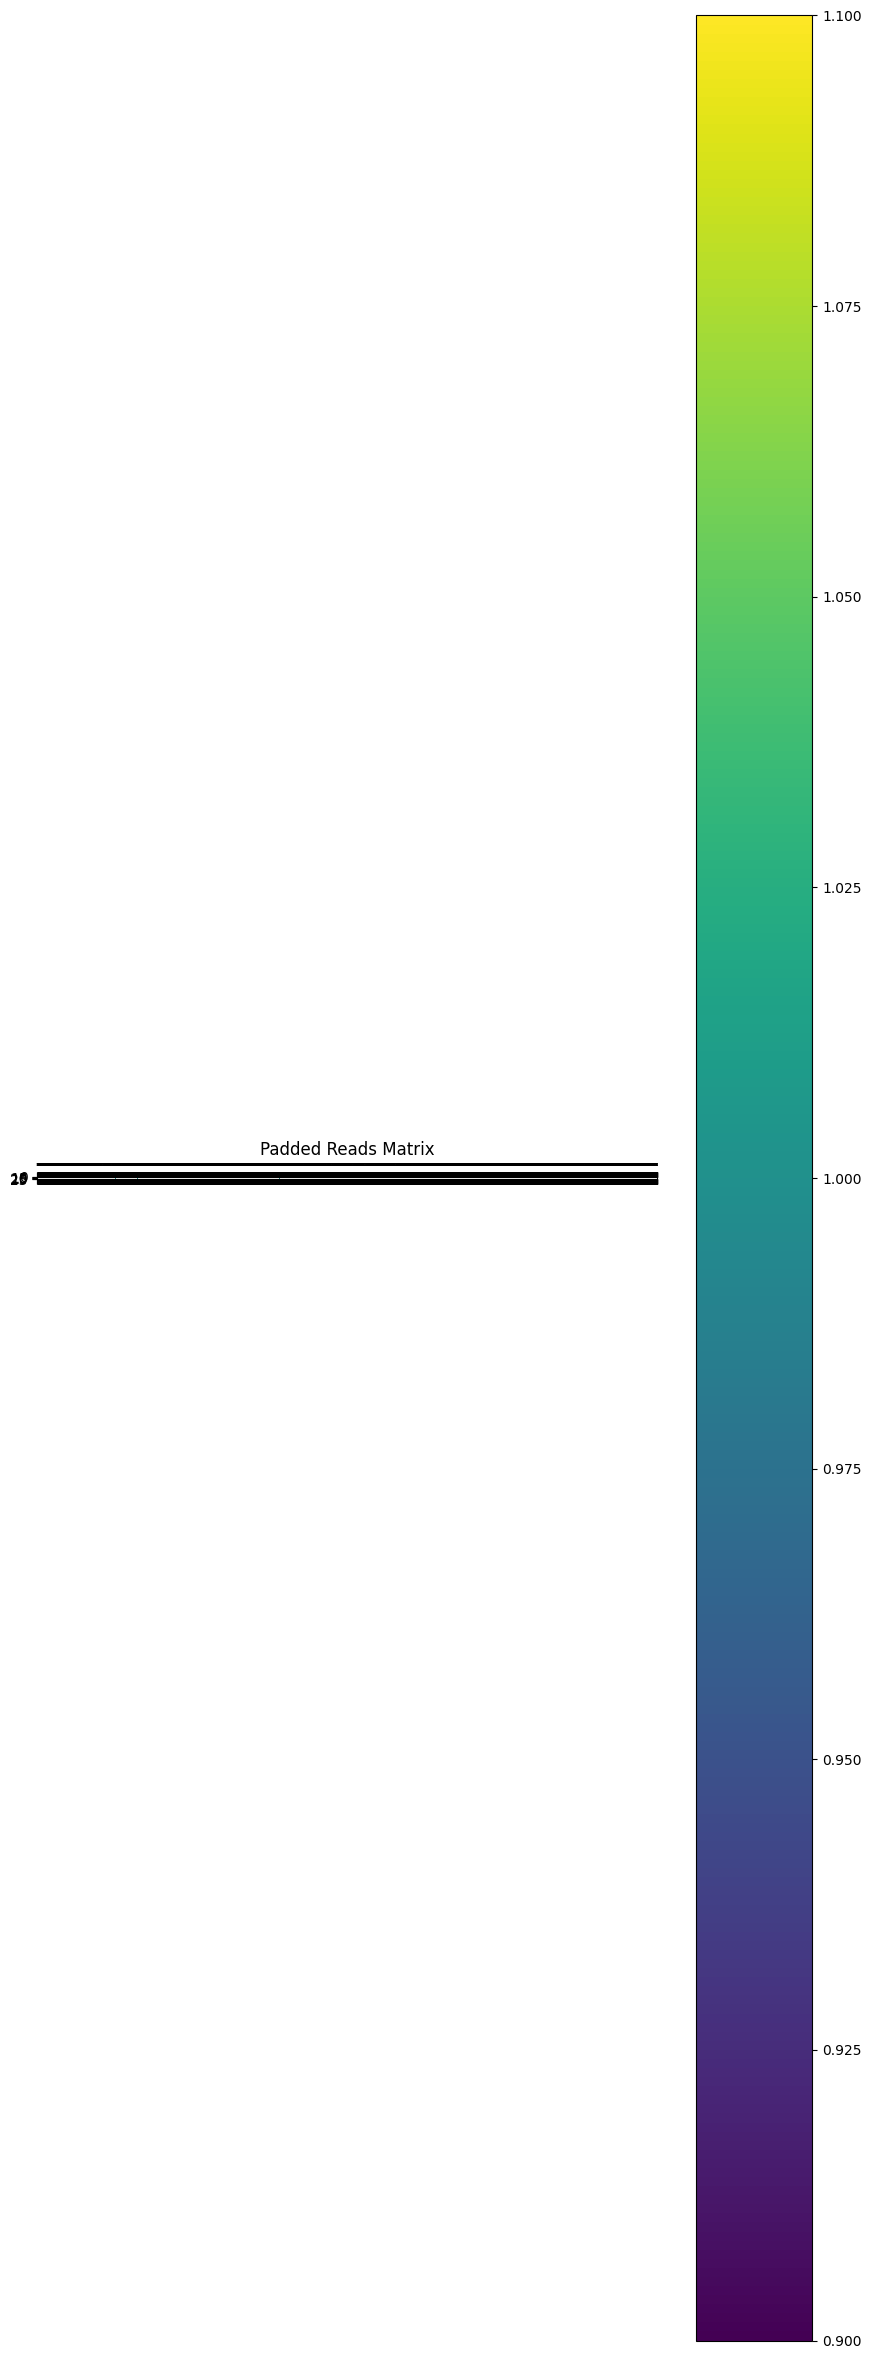

Padded reads saved to padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


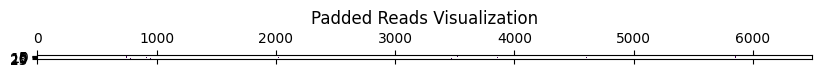

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

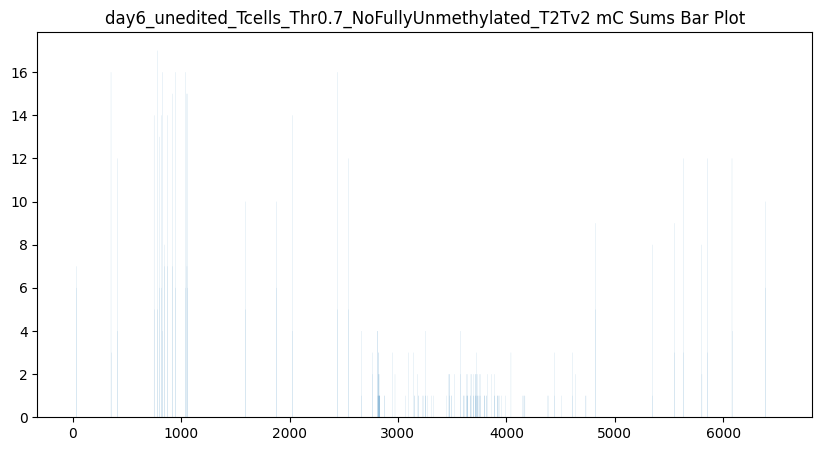

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


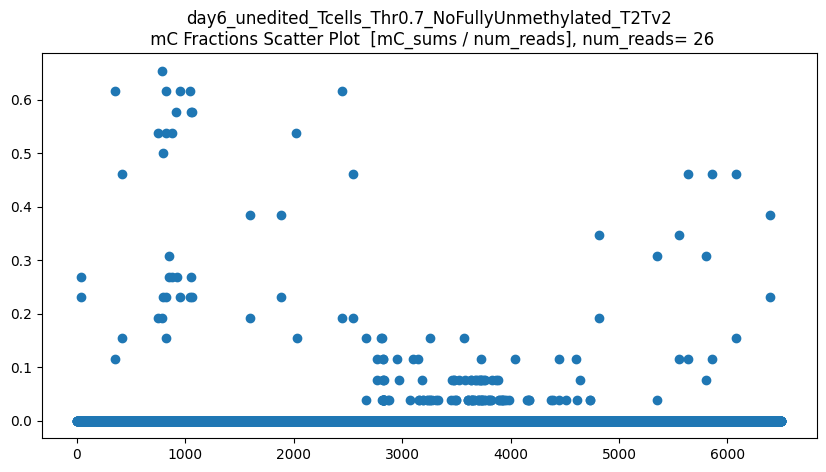

len(CGs_all) = 26
CGs_all.shape = (26, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


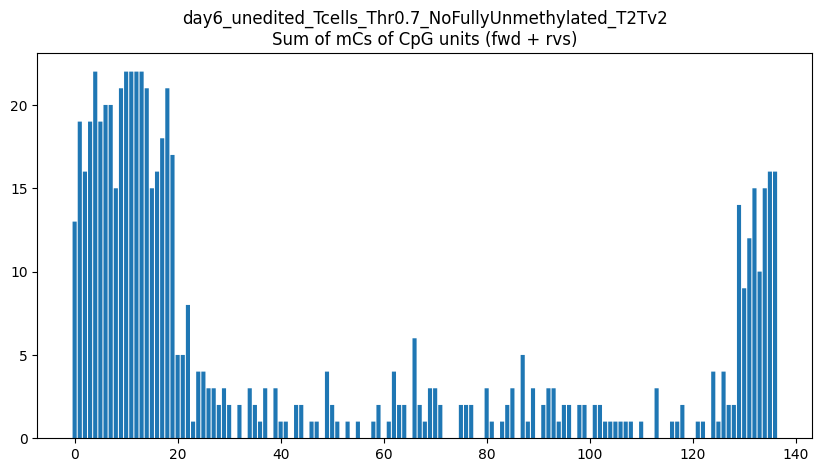

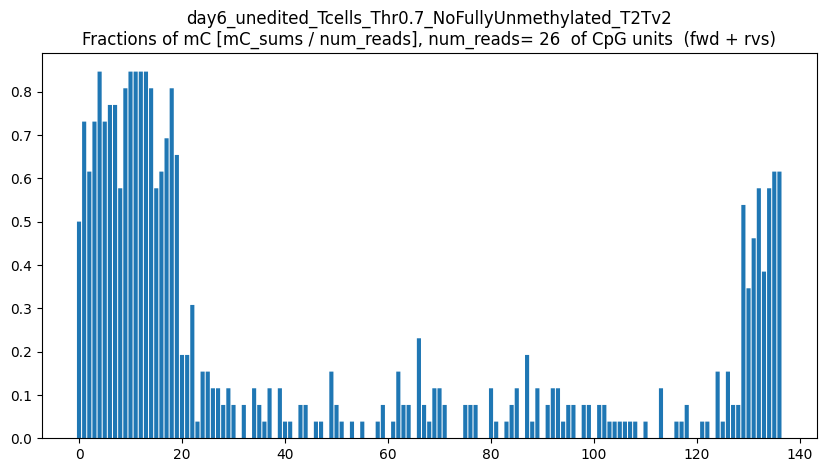

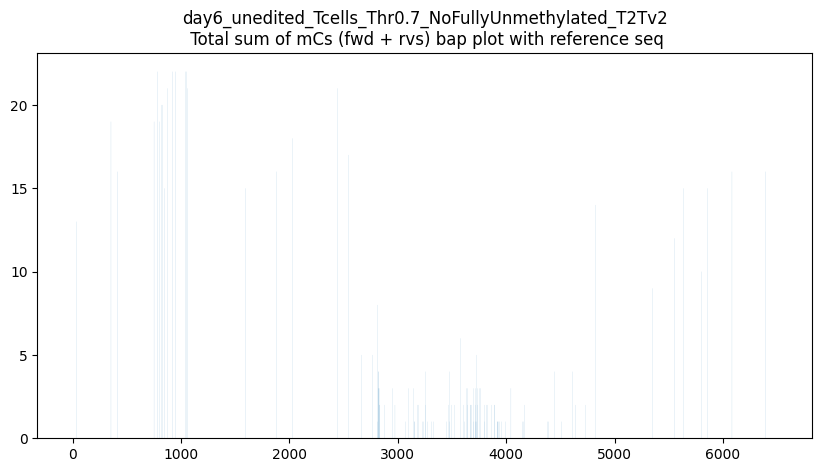

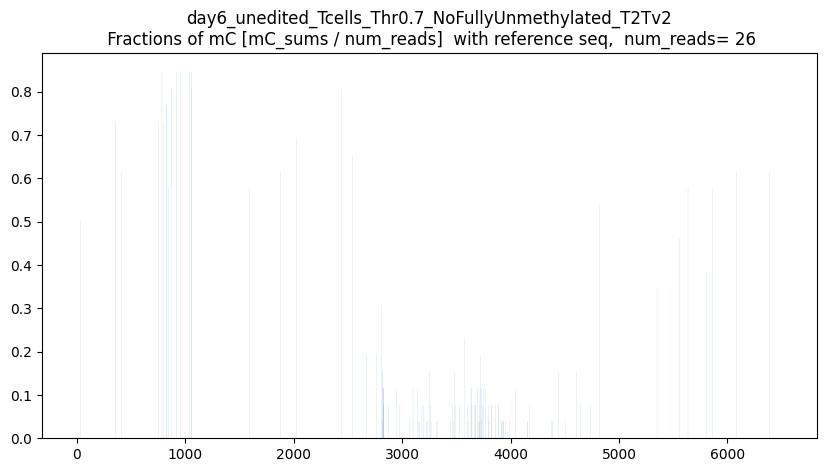

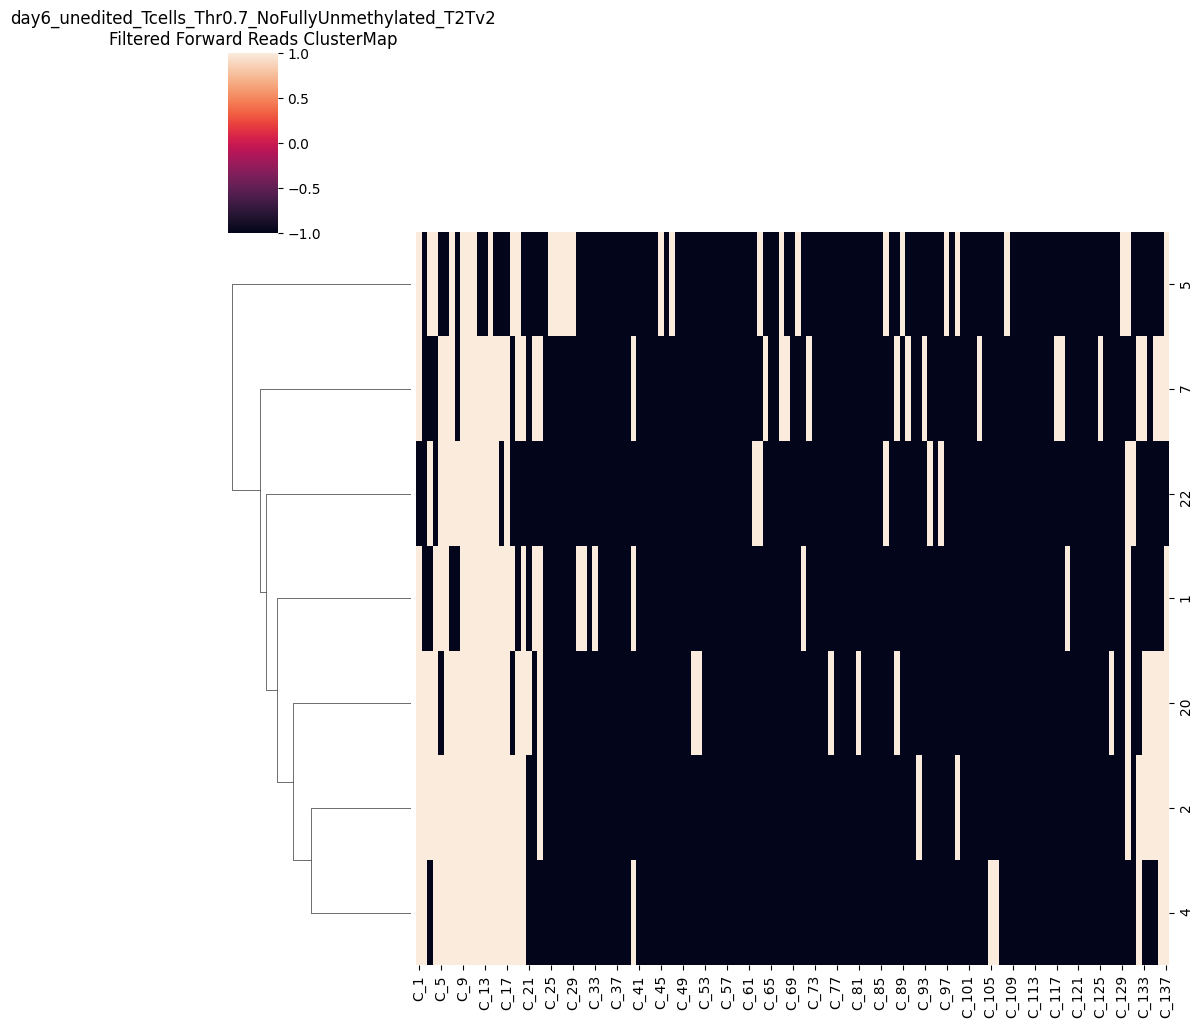

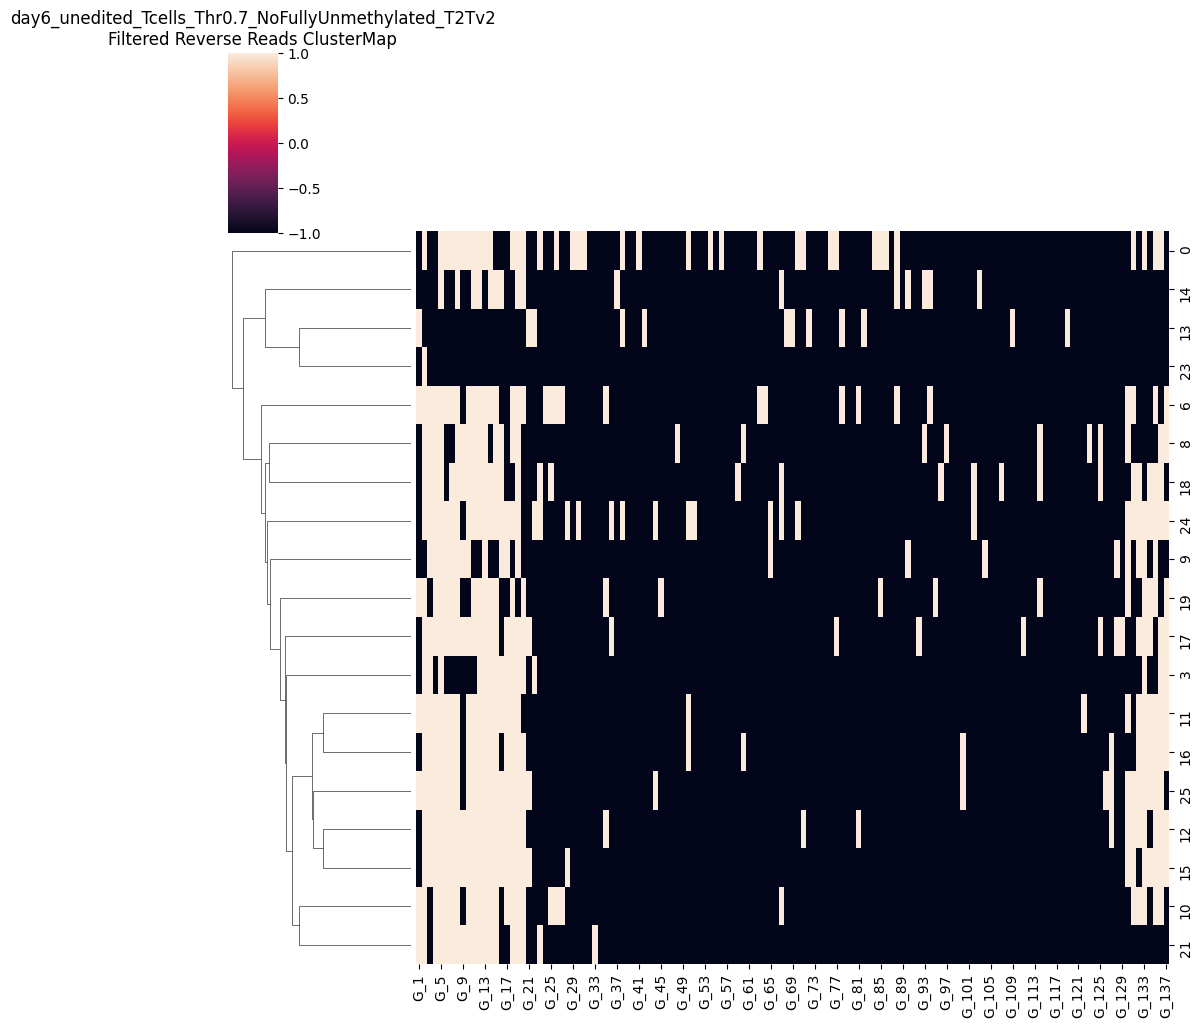

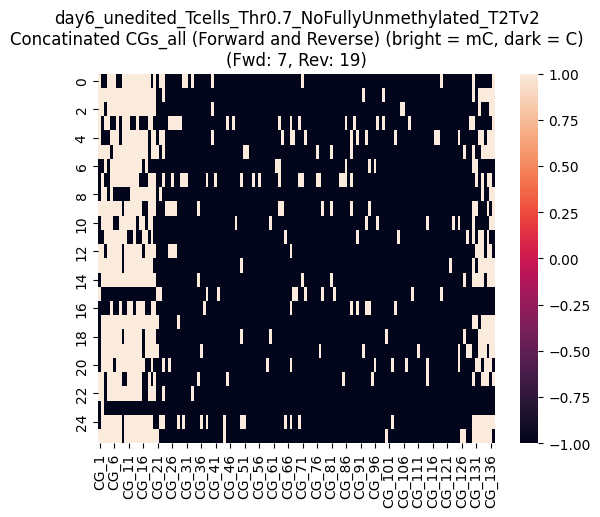

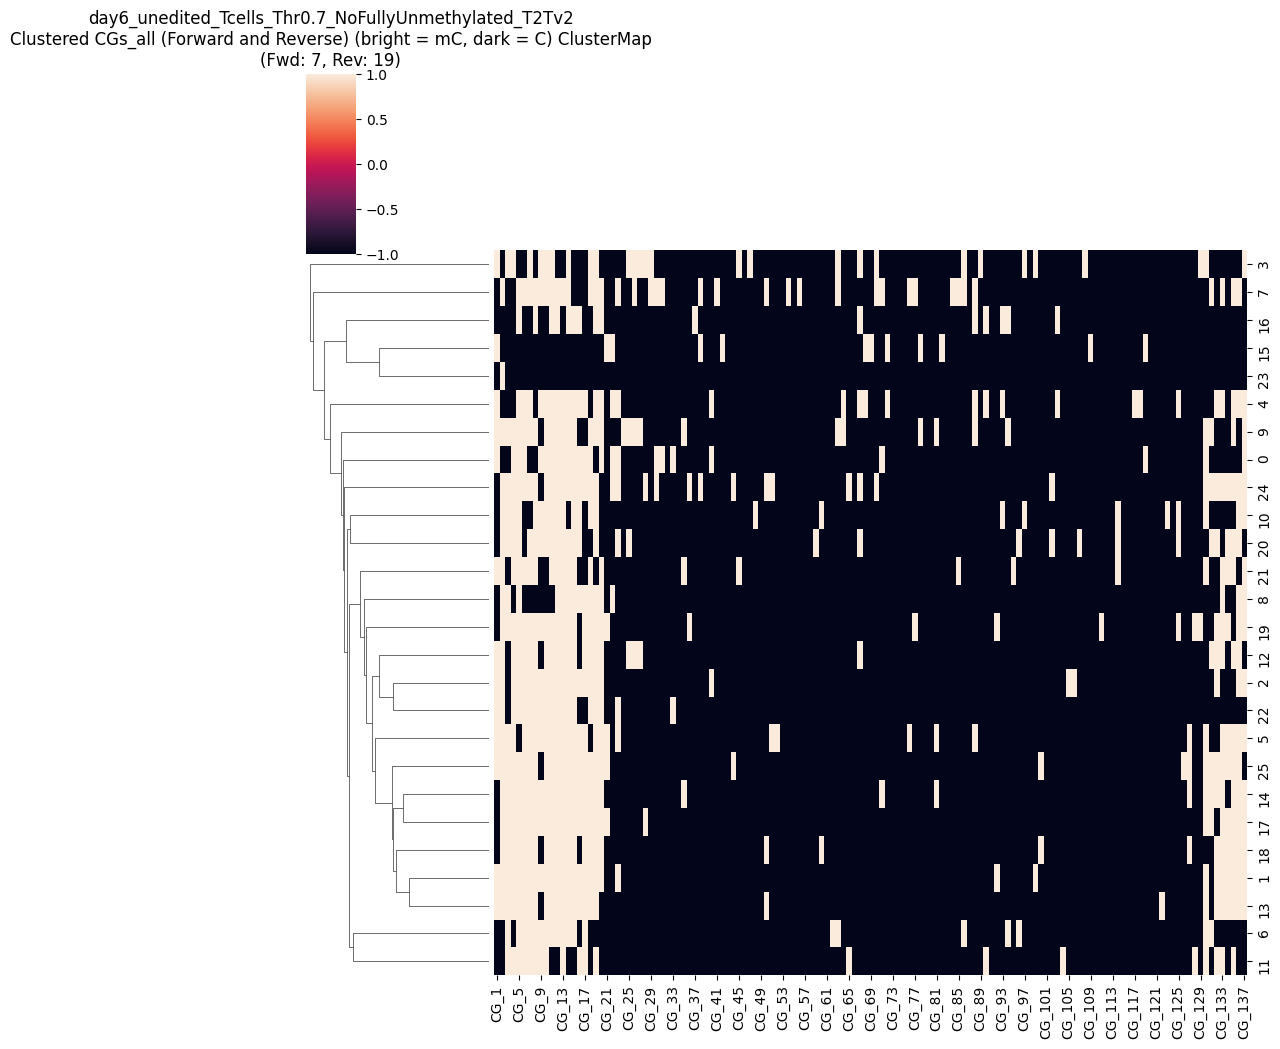

CGs_all saved as CG_137_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD7_numRVS19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [4]:


threshold_mC =  0.7 #  0.9 #0.99
experiment_name = "day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2"
bam_path = unedit_bam_path

print('experiment_name = ', experiment_name)

save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [5]:
reads_df

read_name_str read_name read_id_number   mod  \
0     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
1     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
2     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
3     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
4     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
...                                    ...       ...            ...   ...   
1031  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1032  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1033  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1034  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1035  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   

       pos  pos_shifted  
0    -2897          353  
1    -2467          783  
2    -2453          797  
3    -2428          822  
4    -2426          824  
...    ...          ...  
1031 -1225         2025  
1032  -807         2443  
1033  -708         2542  
1034  -441         2809  
1035  -377         2873  

[662 rows x 6 columns]

In [6]:
threshold_percent = 50
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 27.0
Maximum methylated CGs per read: 38.0
Threshold (50% of max): 13.50
Original number of reads: 26
Number of reads after filtering: 24
Removed 2 reads


read_name_str read_name read_id_number   mod  \
0     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
1     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
2     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
3     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
4     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
...                                    ...       ...            ...   ...   
1031  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1032  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1033  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1034  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1035  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   

       pos  pos_shifted  num_CG_methylated  
0    -2897          353                1.0  
1    -2467          783                1.0  
2    -2453          797                1.0  
3    -2428          822                1.0  
4    -2426          824                1.0  
...    ...          ...                ...  
1031 -1225         2025                1.0  
1032  -807         2443                1.0  
1033  -708         2542                1.0  
1034  -441         2809                1.0  
1035  -377         2873                1.0  

[649 rows x 7 columns]

In [7]:
methylation_counts

read_name  methylation_count
0          0               37.0
1         11               25.0
2         12               30.0
3         13               16.0
4         15               25.0
5         18               28.0
6         21               32.0
7         24               34.0
8         25               24.0
9         26               20.0
10        27               26.0
11        28               27.0
12        29               30.0
13         3               12.0
14        31               16.0
15        32               28.0
16        33               27.0
17        34               31.0
18        36               29.0
19        37               24.0
20        38               32.0
21        42               19.0
22         5               20.0
23         6                1.0
24         7               38.0
25         9               31.0

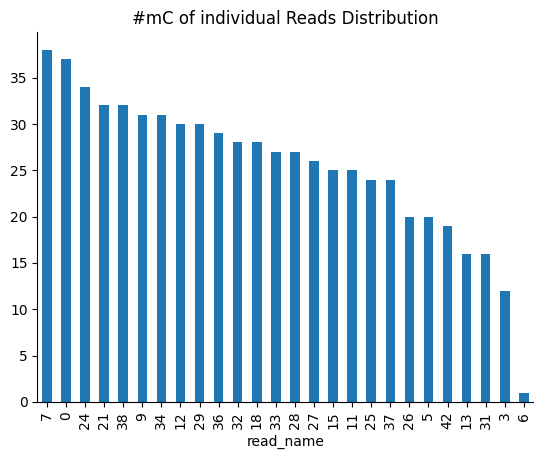

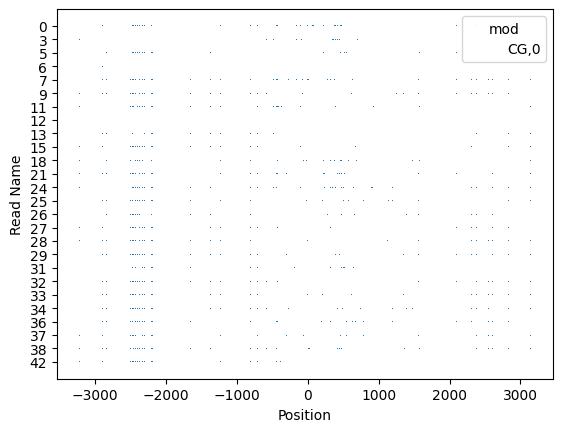

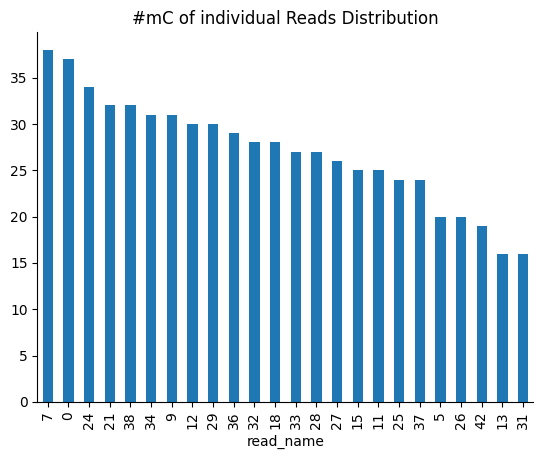

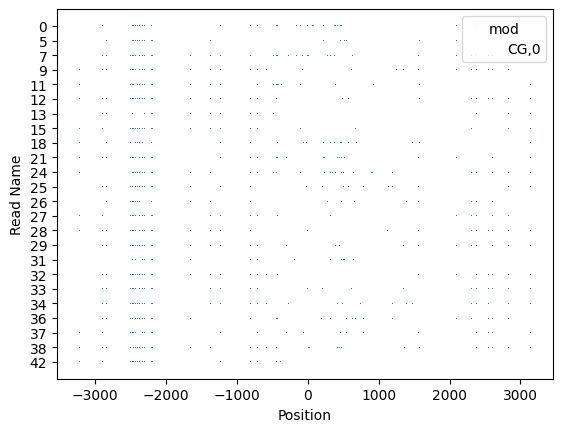

In [8]:
visualize_data(reads_df)
visualize_data(filtered_reads_df)

In [9]:
methylation_counts['methylation_count'].max()

np.float64(38.0)

In [10]:
mean_methylation = methylation_counts['methylation_count'].mean()
mean_methylation

np.float64(25.46153846153846)

In [11]:
methylation_counts['methylation_count'].median()

np.float64(27.0)

In [12]:
threshold_percent 
threshold = mean_methylation * (threshold_percent / 100)

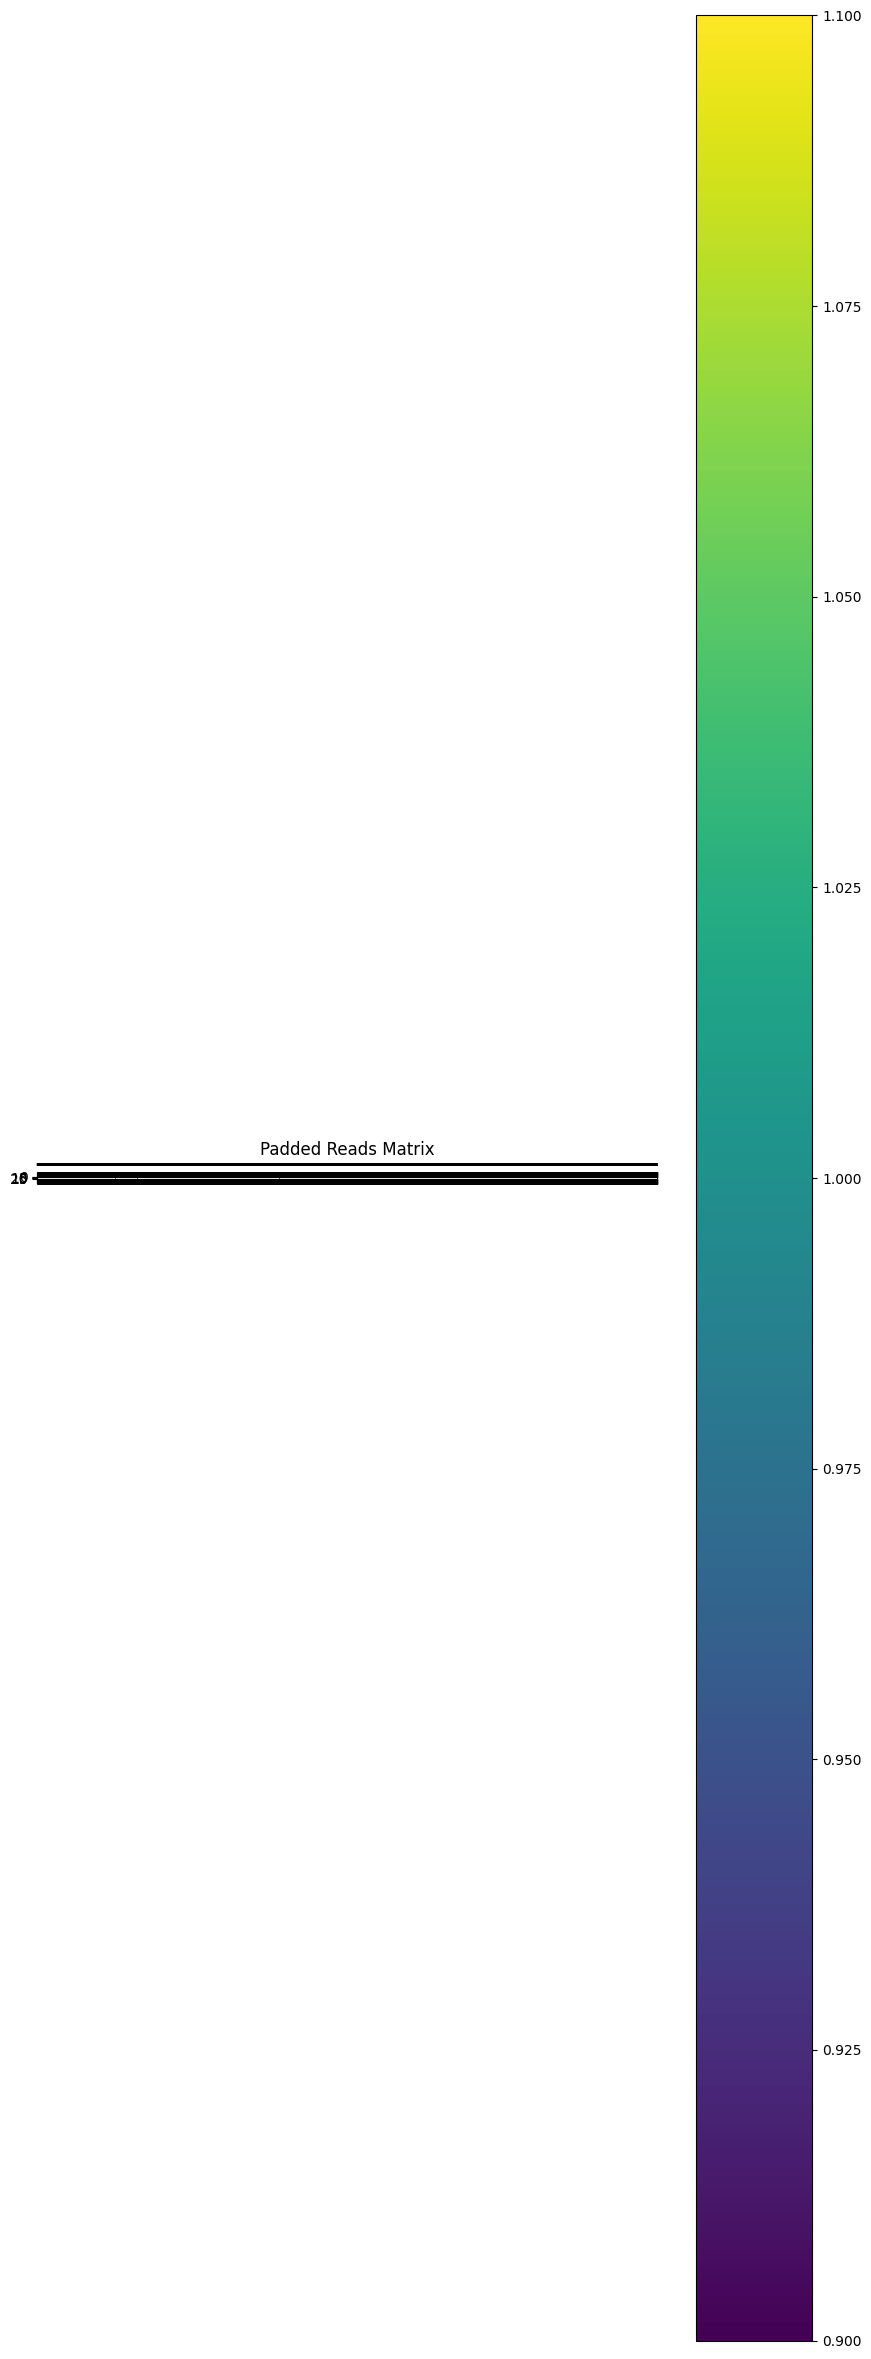

Padded reads saved to removed_low50_methylated_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy


In [13]:
save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)



Padded reads loaded successfully.


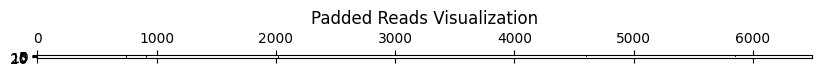

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

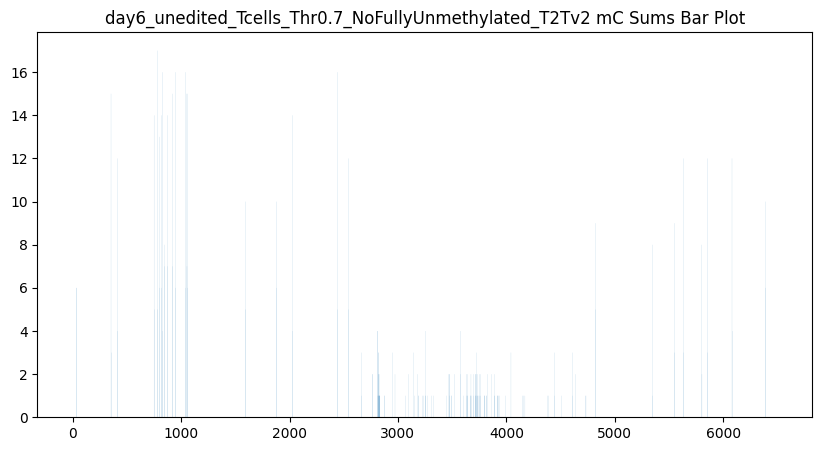

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


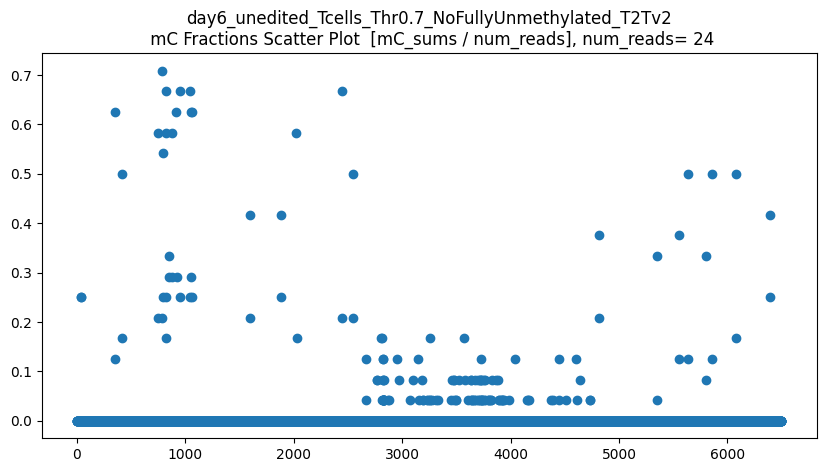

len(CGs_all) = 24
CGs_all.shape = (24, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


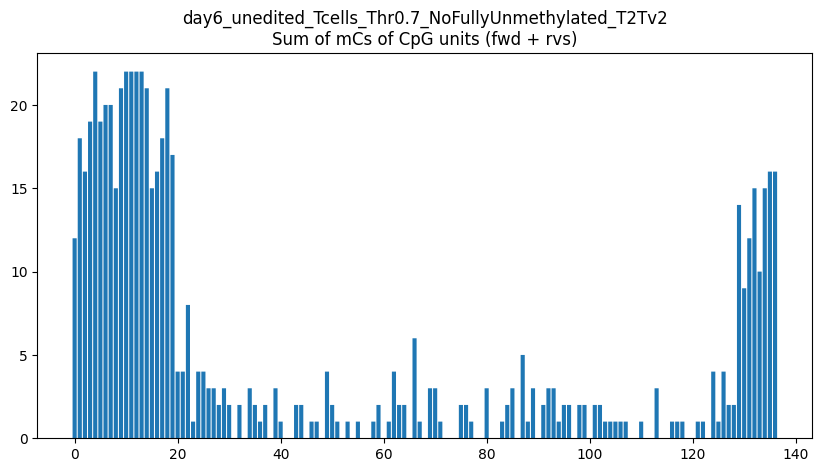

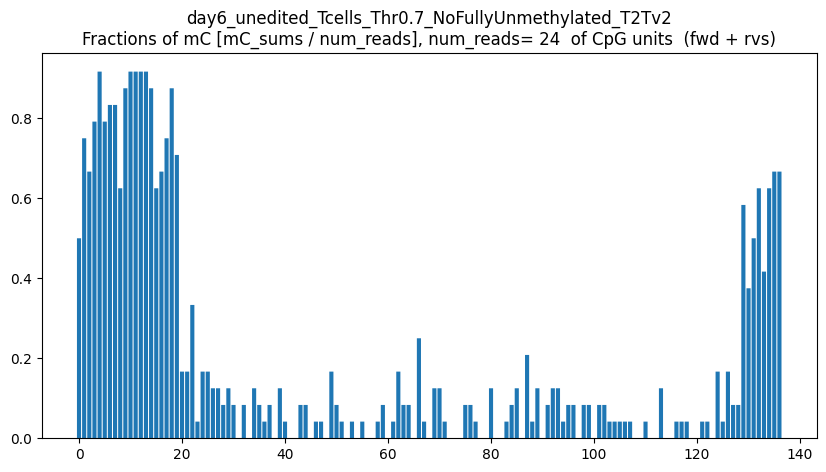

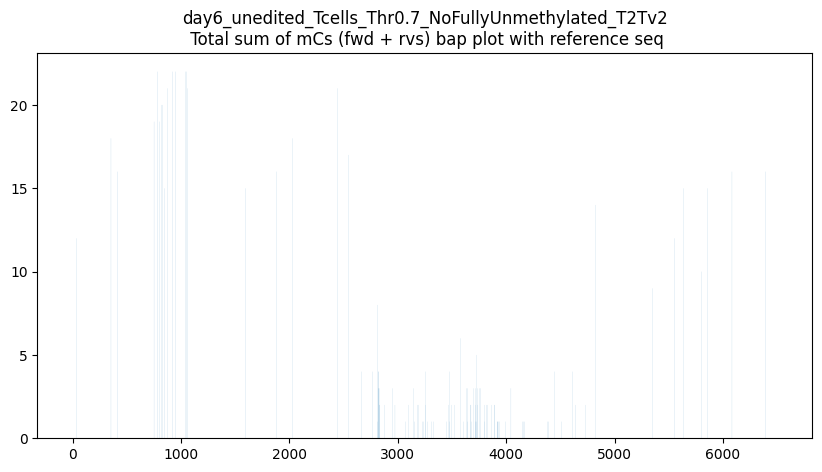

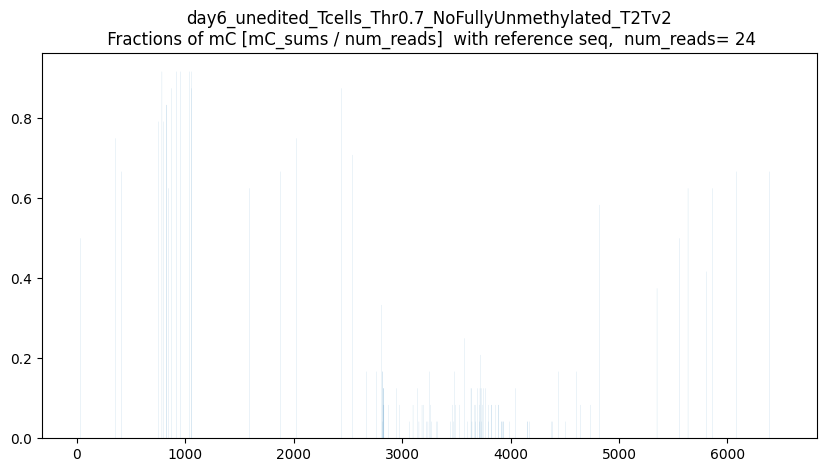

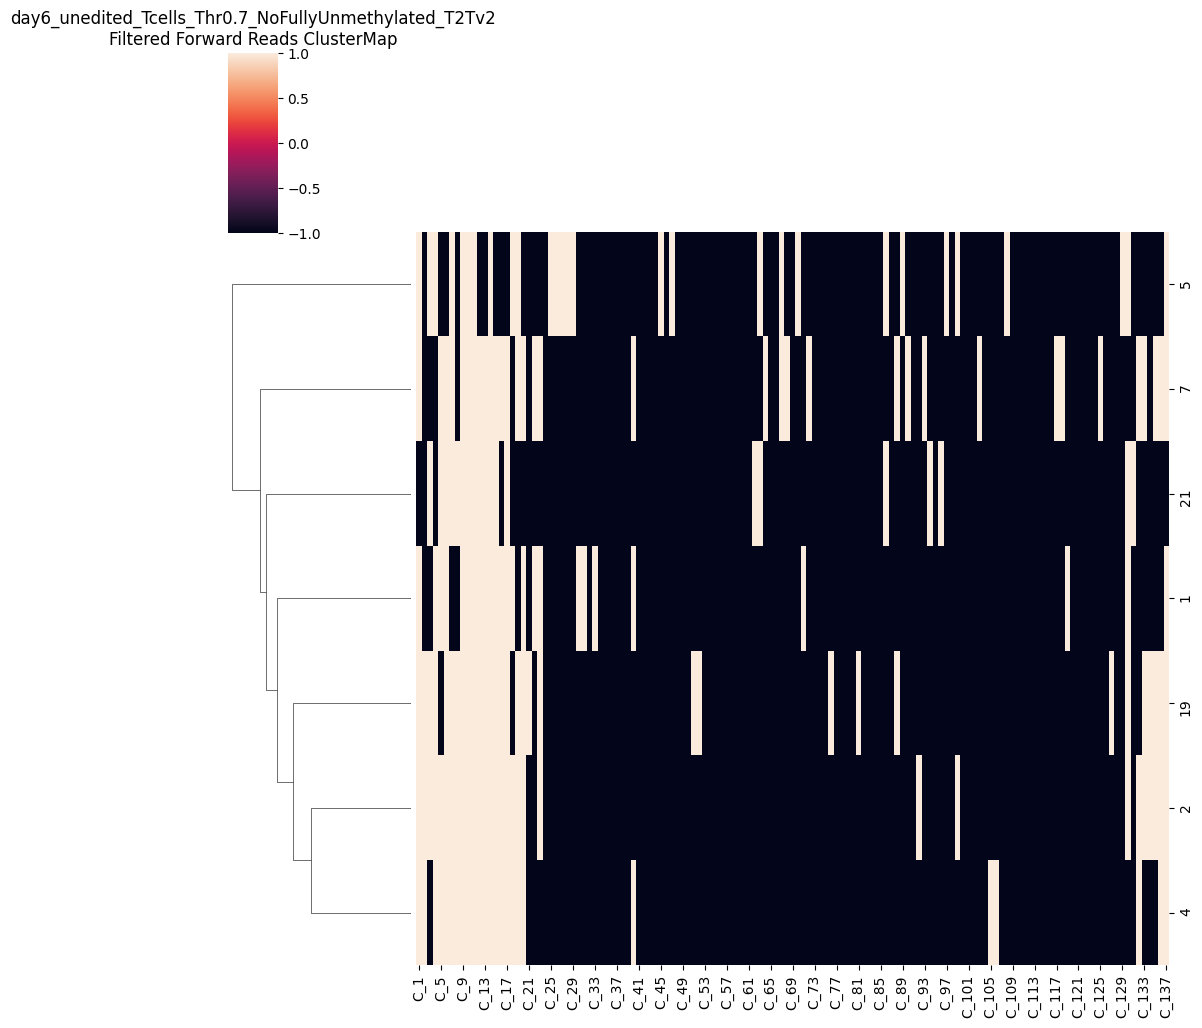

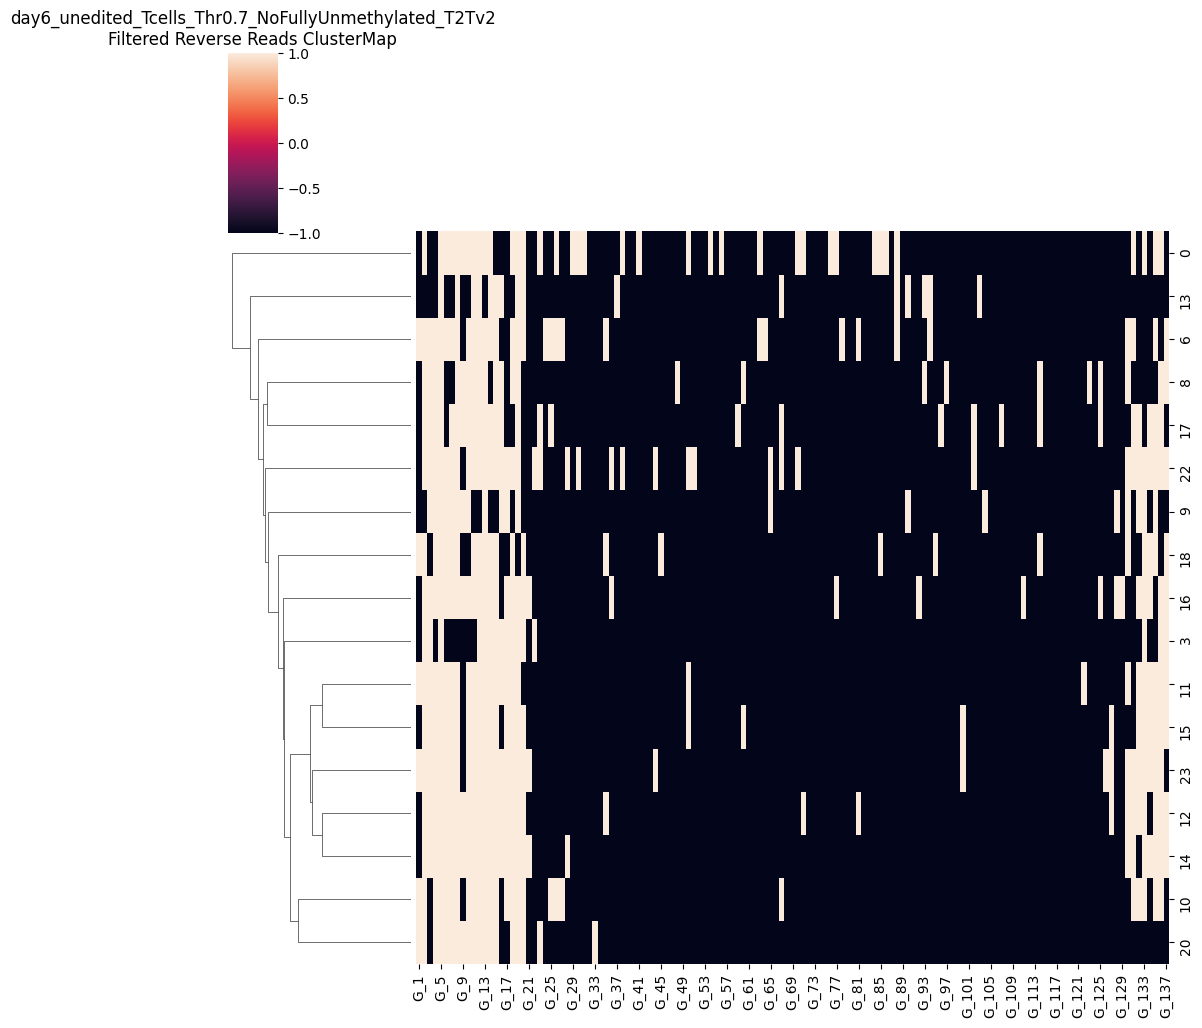

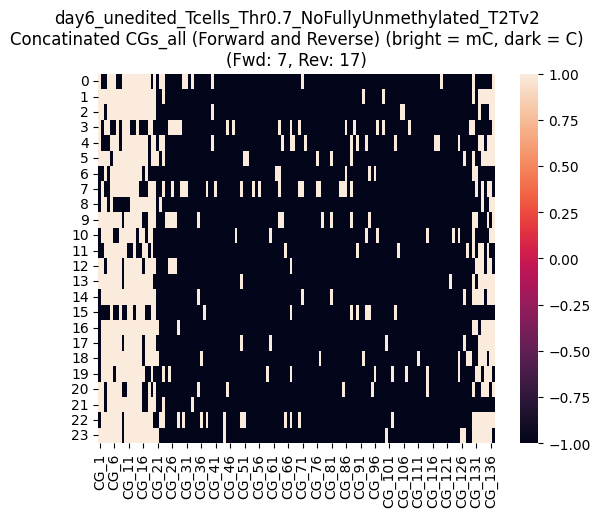

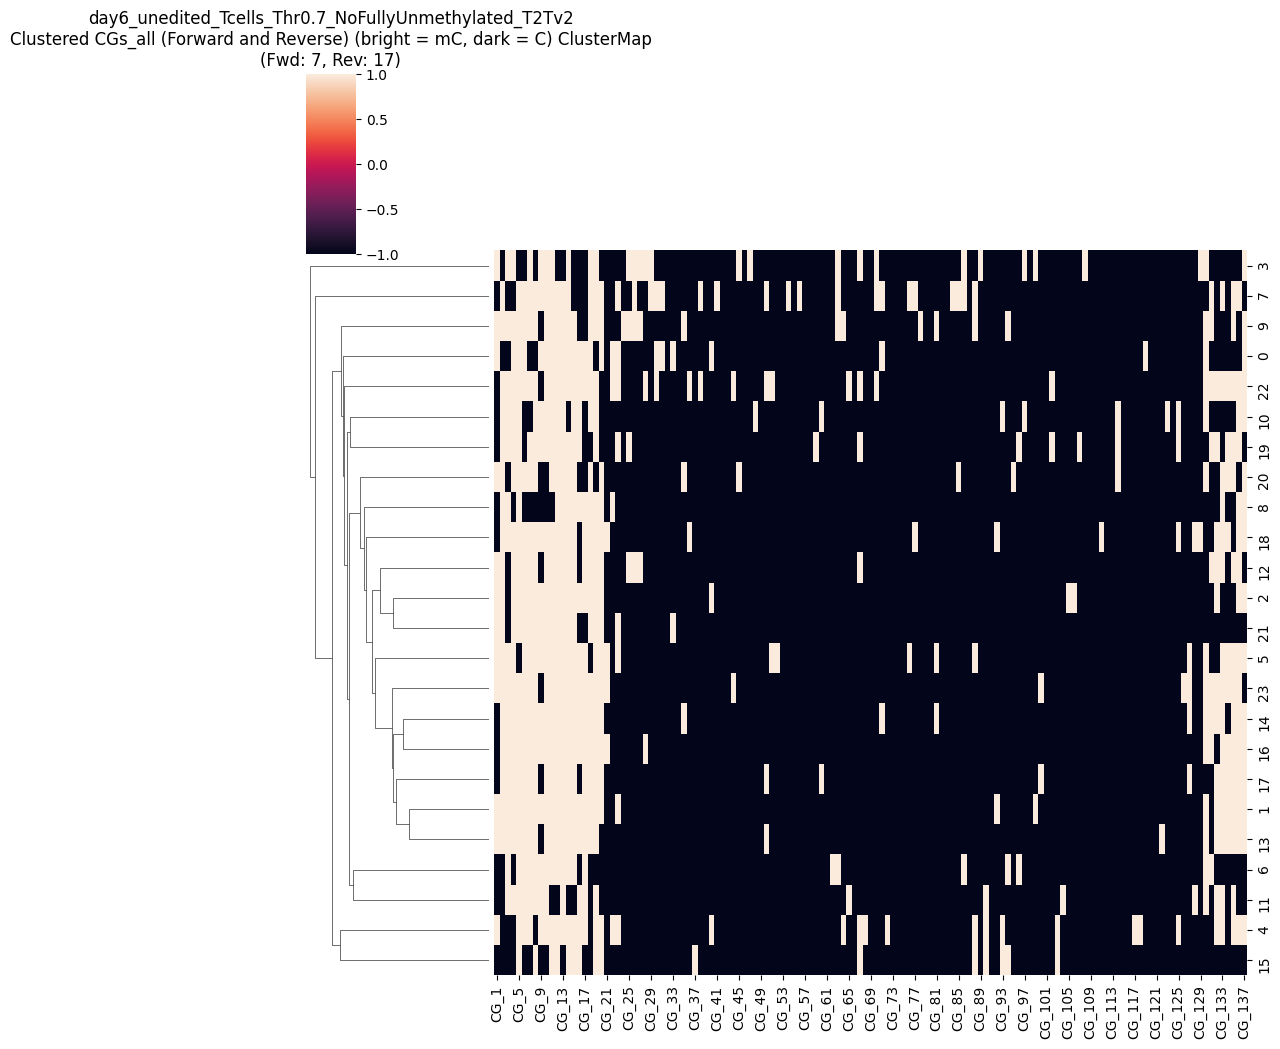

CGs_all saved as CG_137_removed_low50_methylated_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD7_numRVS17.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [14]:

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [15]:
CGs_all

CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  CG_128  \
0    1.0   NaN   NaN   1.0   1.0   1.0   NaN   NaN   1.0    1.0  ...     NaN   
1    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...     NaN   
2    1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...     NaN   
3    1.0   NaN   1.0   1.0   NaN   NaN   1.0   NaN   1.0    1.0  ...     NaN   
4    1.0   NaN   NaN   NaN   1.0   1.0   1.0   NaN   1.0    1.0  ...     NaN   
5    1.0   1.0   1.0   1.0   NaN   1.0   1.0   1.0   1.0    1.0  ...     NaN   
6    NaN   NaN   1.0   NaN   1.0   1.0   1.0   1.0   1.0    1.0  ...     NaN   
7    NaN   1.0   NaN   NaN   1.0   1.0   1.0   1.0   1.0    1.0  ...     NaN   
8    NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN    NaN  ...     NaN   
9    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...     NaN   
10   NaN   1.0   1.0   1.0   1.0   NaN   NaN   1.0   1.0    1.0  ...     NaN   
11   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...     1.0   
12   1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...     NaN   
13   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...     NaN   
14   NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...     NaN   
15   NaN   NaN   NaN   NaN   1.0   NaN   NaN   1.0   NaN    NaN  ...     NaN   
16   NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...     NaN   
17   NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...     NaN   
18   NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...     1.0   
19   NaN   1.0   1.0   1.0   1.0   NaN   1.0   1.0   1.0    1.0  ...     NaN   
20   1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   NaN    NaN  ...     NaN   
21   1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...     NaN   
22   NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...     NaN   
23   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...     NaN   

    CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  CG_137  
0      NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN     1.0  
1      NaN     1.0     NaN     1.0     1.0     1.0     1.0     1.0     1.0  
2      NaN     NaN     NaN     1.0     NaN     NaN     NaN     1.0     1.0  
3      1.0     1.0     NaN     NaN     NaN     NaN     NaN     NaN     1.0  
4      NaN     NaN     NaN     1.0     1.0     NaN     1.0     1.0     1.0  
5      NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0     1.0  
6      NaN     1.0     1.0     NaN     NaN     NaN     NaN     NaN     NaN  
7      NaN     NaN     1.0     NaN     1.0     NaN     1.0     1.0     NaN  
8      NaN     NaN     NaN     NaN     1.0     NaN     NaN     1.0     1.0  
9      NaN     1.0     1.0     NaN     NaN     NaN     1.0     NaN     1.0  
10     NaN     1.0     NaN     NaN     NaN     NaN     NaN     1.0     1.0  
11     NaN     1.0     NaN     1.0     1.0     NaN     1.0     NaN     NaN  
12     NaN     NaN     1.0     1.0     1.0     NaN     1.0     1.0     NaN  
13     NaN     1.0     NaN     1.0     1.0     1.0     1.0     1.0     1.0  
14     NaN     1.0     1.0     1.0     1.0     NaN     1.0     1.0     1.0  
15     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
16     NaN     1.0     1.0     NaN     1.0     1.0     1.0     1.0     1.0  
17     NaN     NaN     NaN     1.0     1.0     1.0     1.0     1.0     1.0  
18     1.0     NaN     NaN     1.0     1.0     1.0     NaN     1.0     1.0  
19     NaN     NaN     1.0     1.0     NaN     1.0     1.0     1.0     NaN  
20     NaN     1.0     NaN     NaN     1.0     1.0     1.0     NaN     1.0  
21     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
22     NaN     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0  
23     NaN     1.0     1.0     1.0     1.0     1.0     1.0     1.0     NaN  

[24 rows x 137 columns]

In [16]:
# 70% * (mean)
# CGs_all

In [17]:
# CGs_all

# Look at the bigger Day 6 T cells data:

In [19]:
unedit_bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# day 28: "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# day 6:  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
unedit_bam_path

'/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

experiment_name =  day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.995 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.…

          |    0%

          | Transferring 3539 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3539   0% | 00:00<…

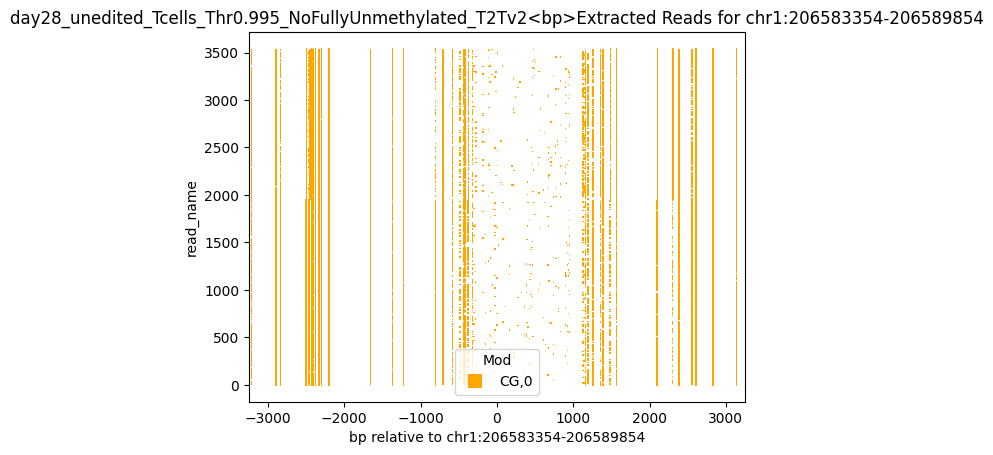

Found read coordinates: 3539 reads
Unique read names with methylation: 3484
Found 1601 reads with full coverage
Reads with methylation data: 3484
Overlap between full coverage and methylation: 1582
After full coverage filtering: 21042 reads with methylation data
Final result: 21042 reads with methylation information out of 3539 total reads


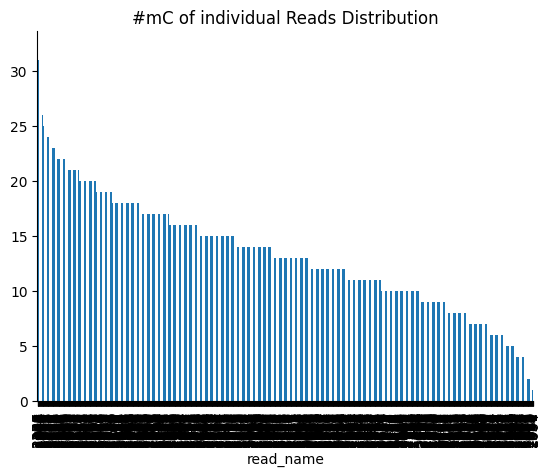

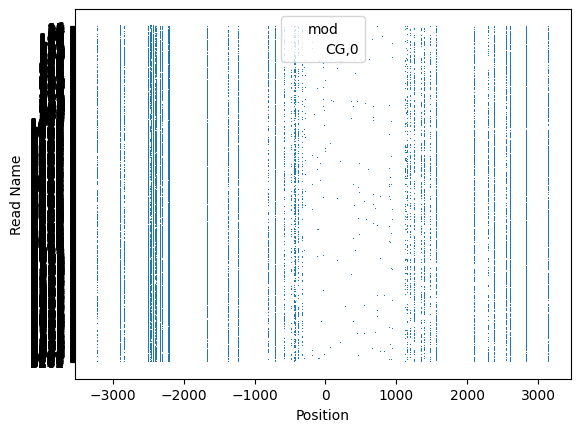

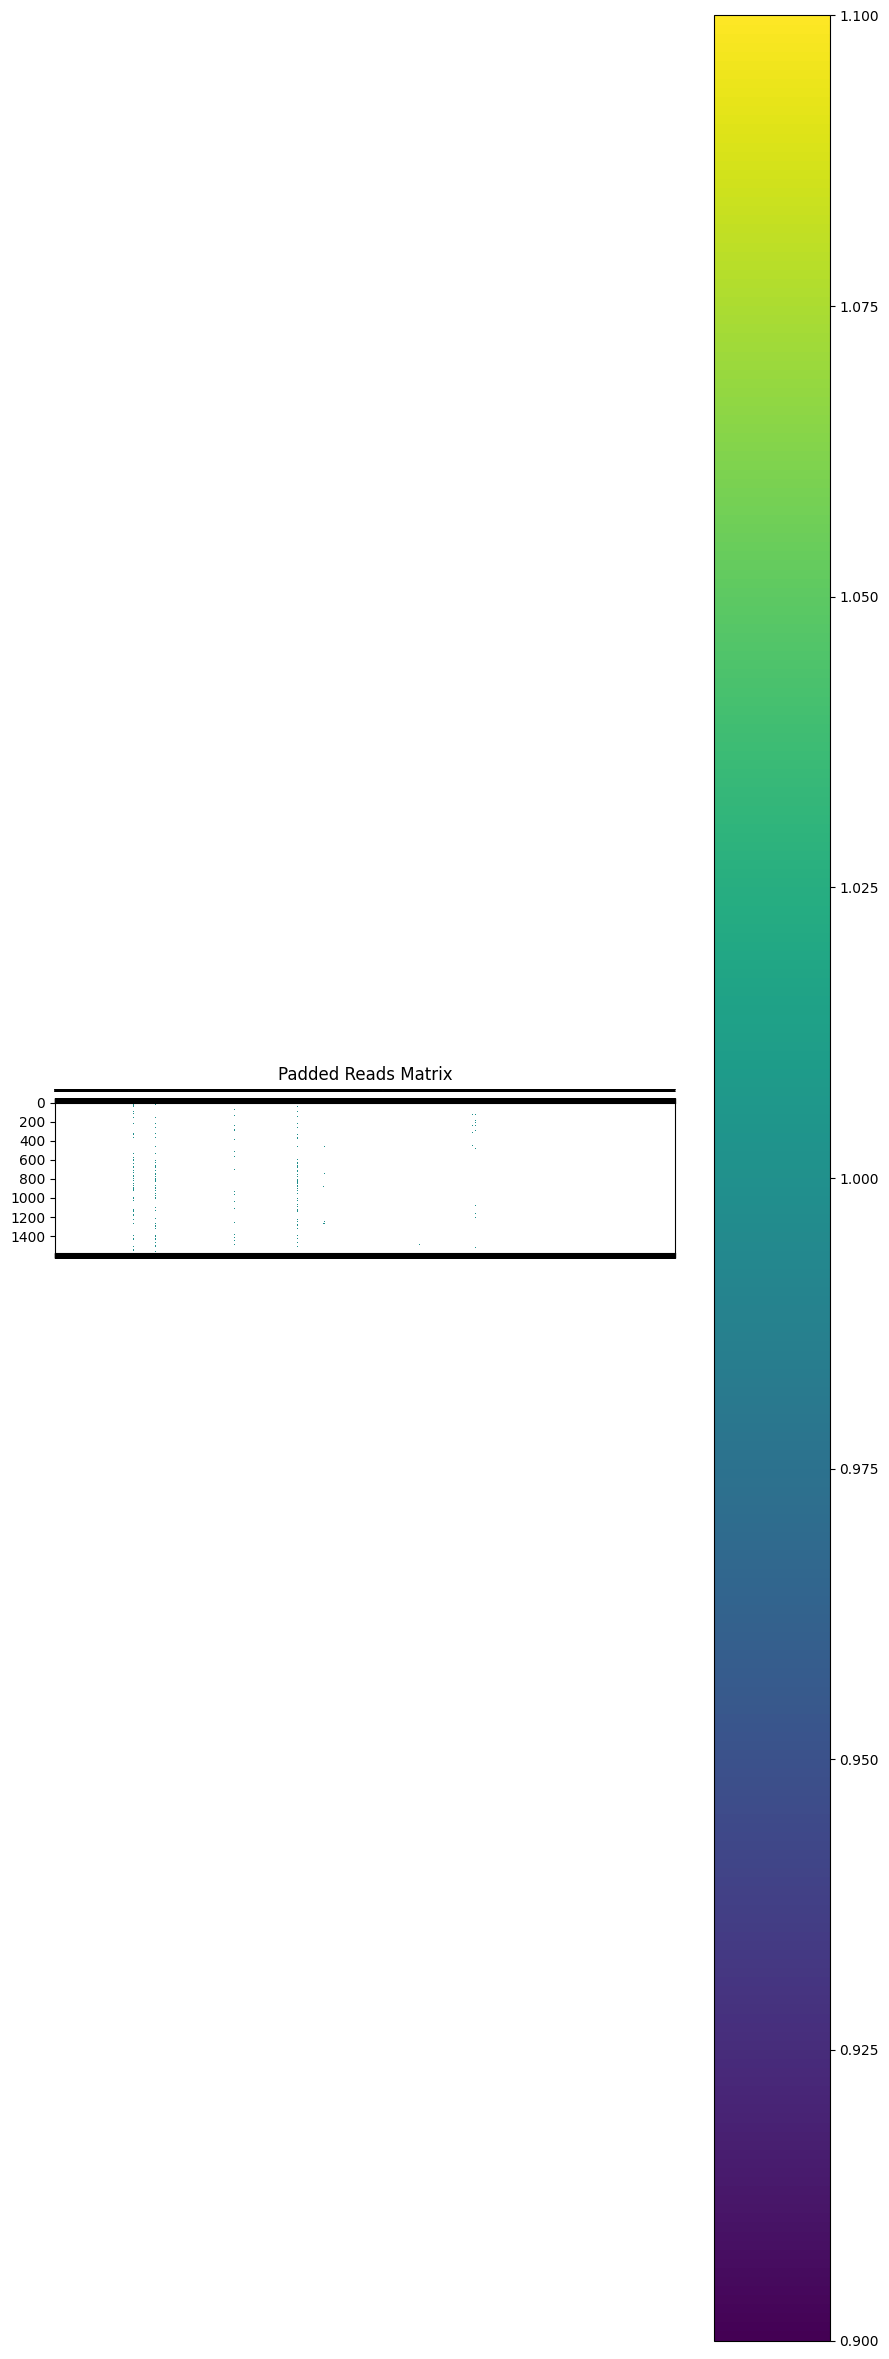

Padded reads saved to padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


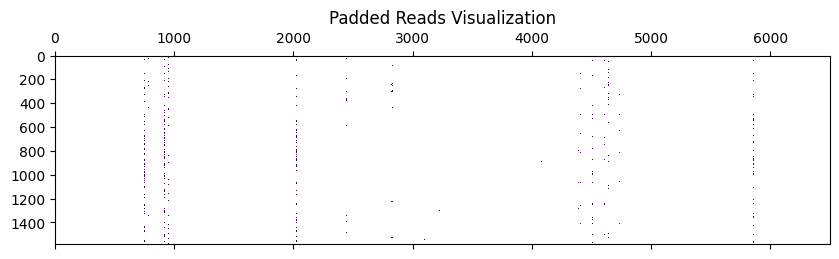

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

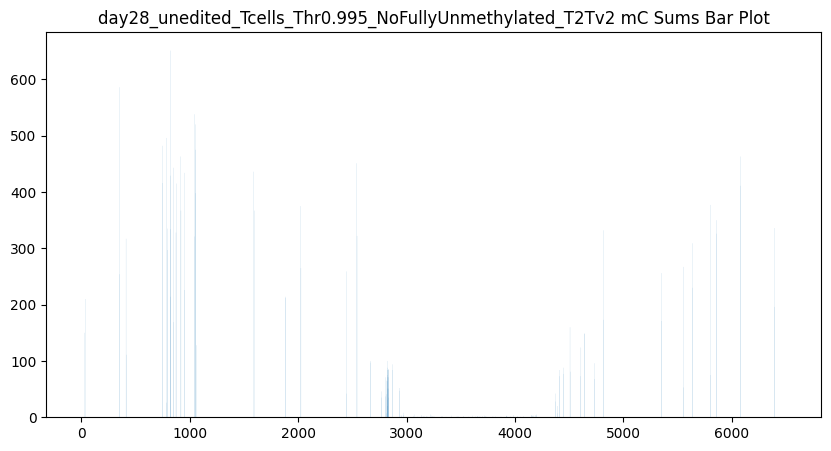

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


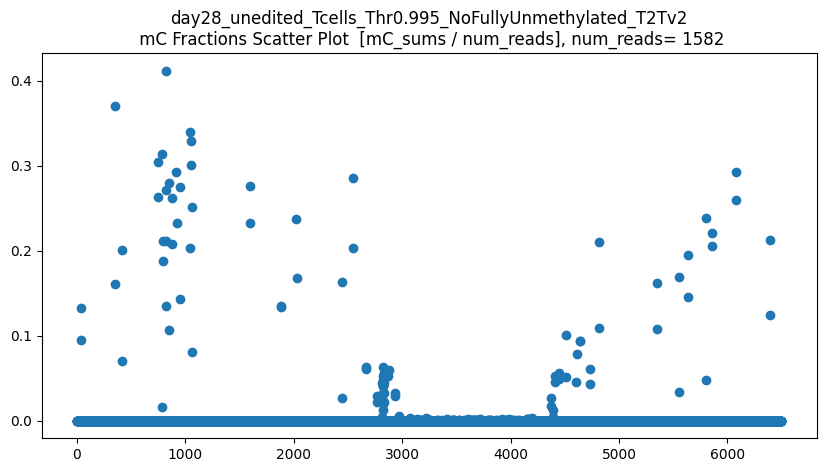

len(CGs_all) = 1582
CGs_all.shape = (1582, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


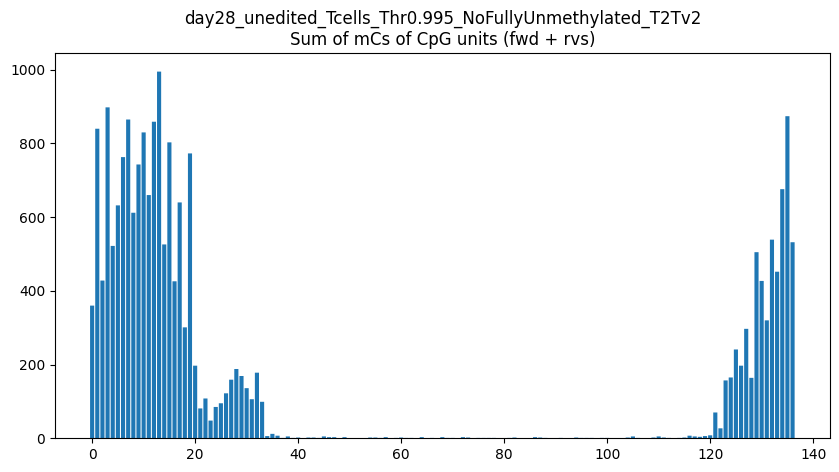

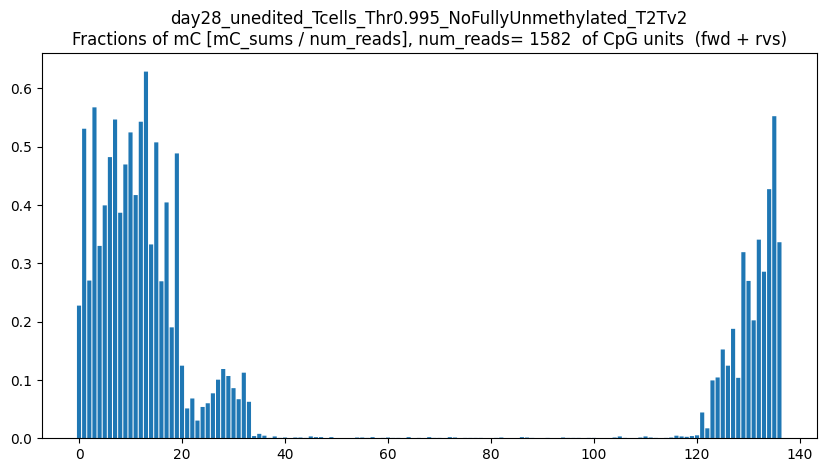

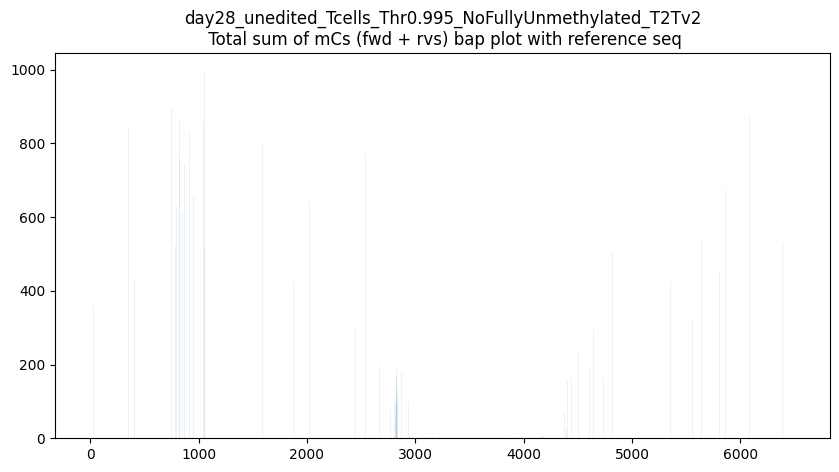

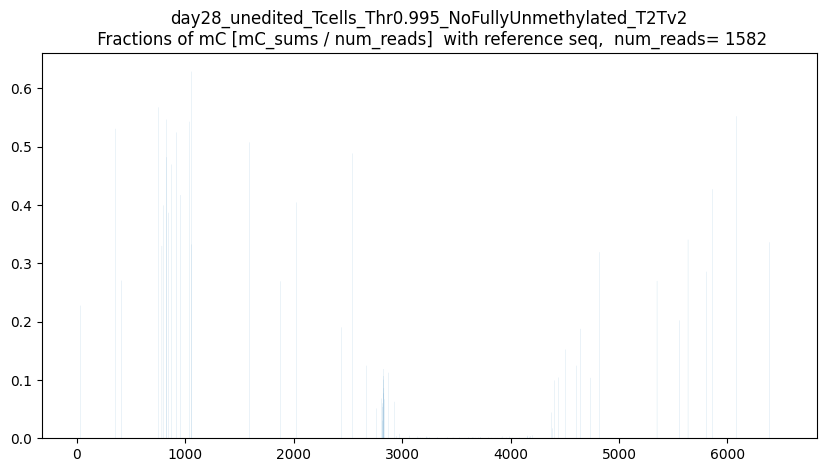

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



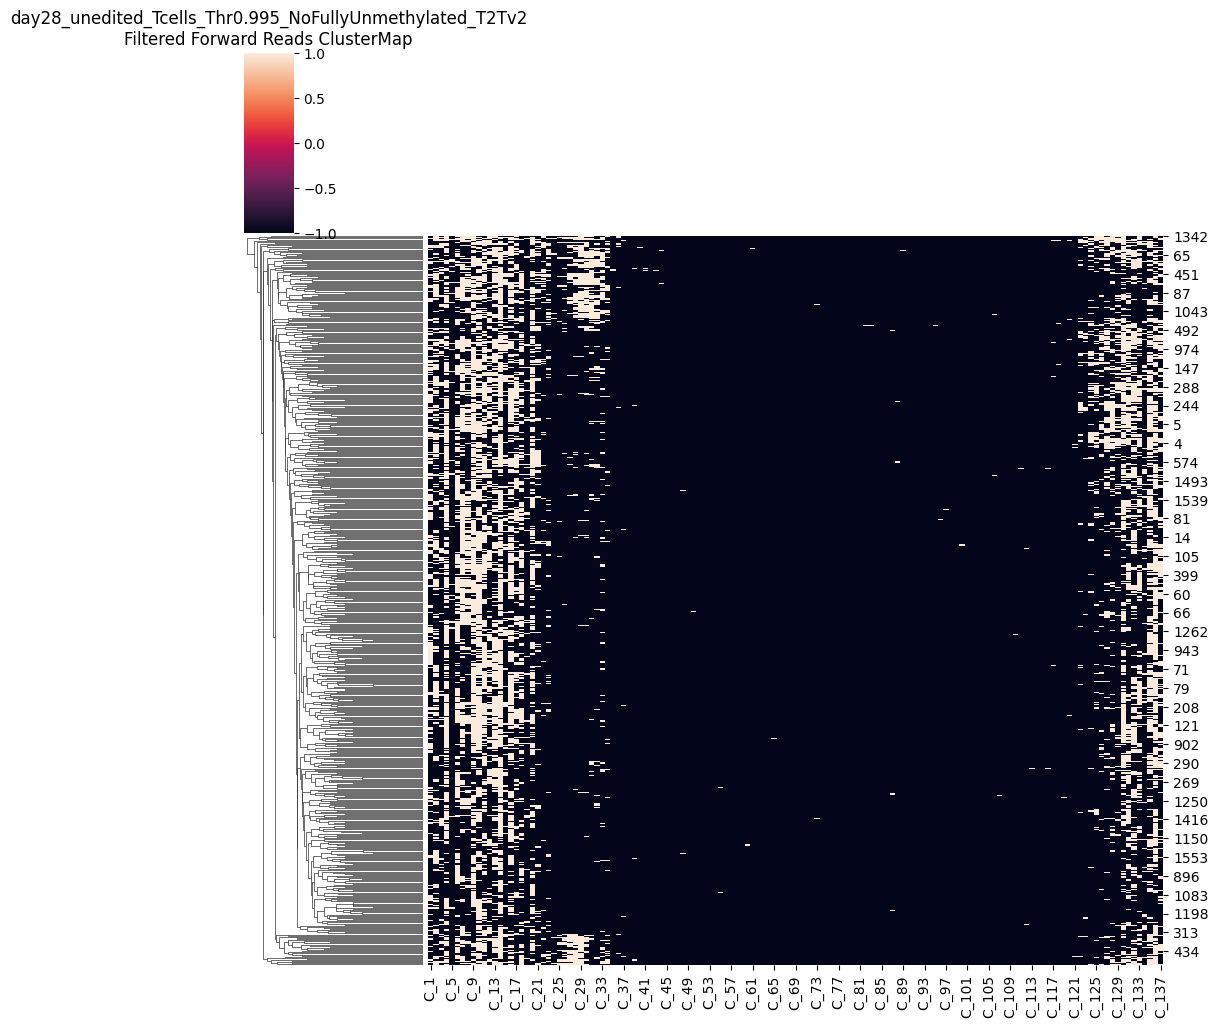

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



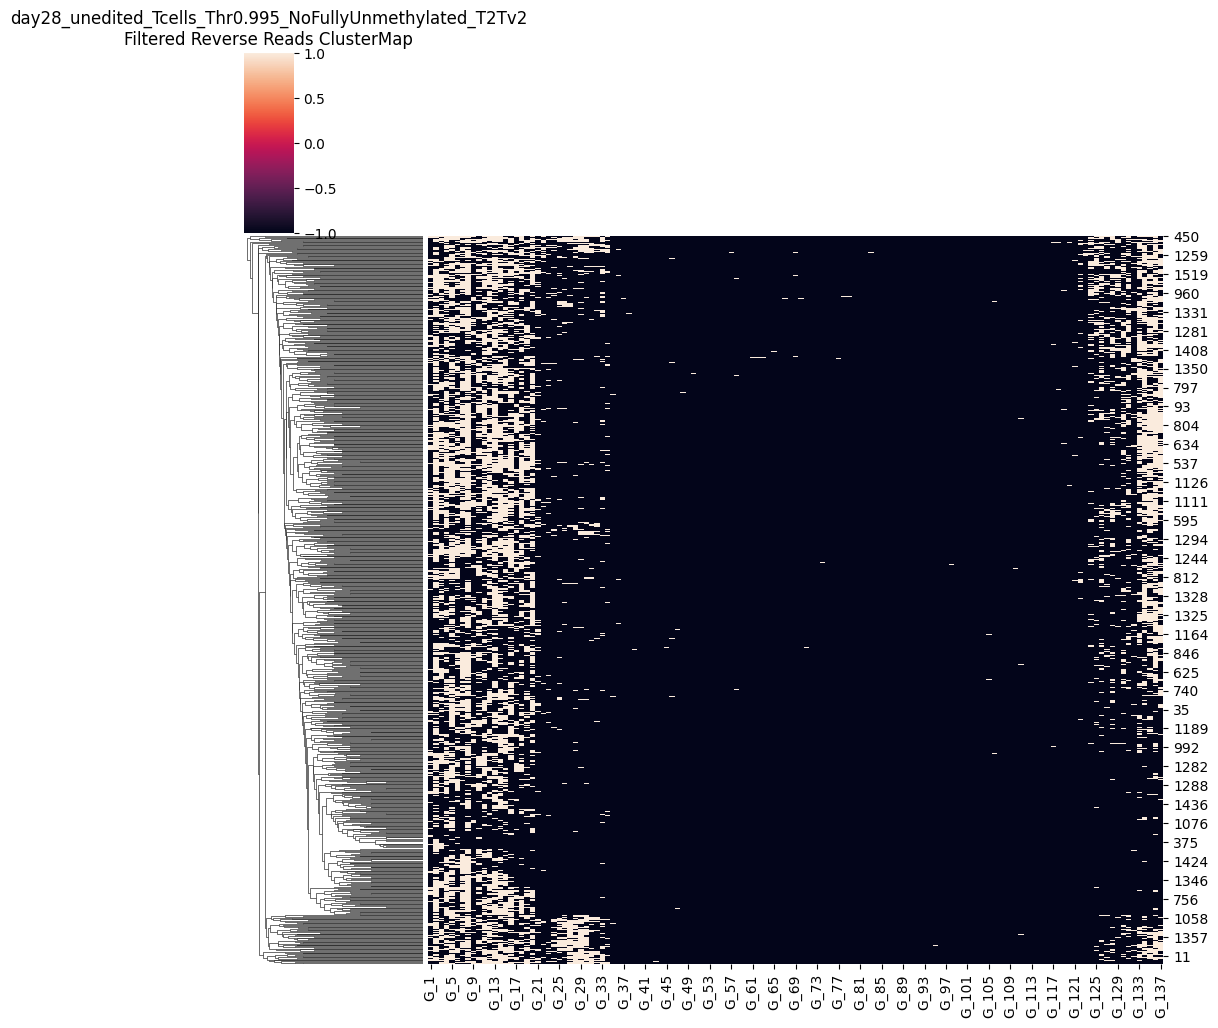

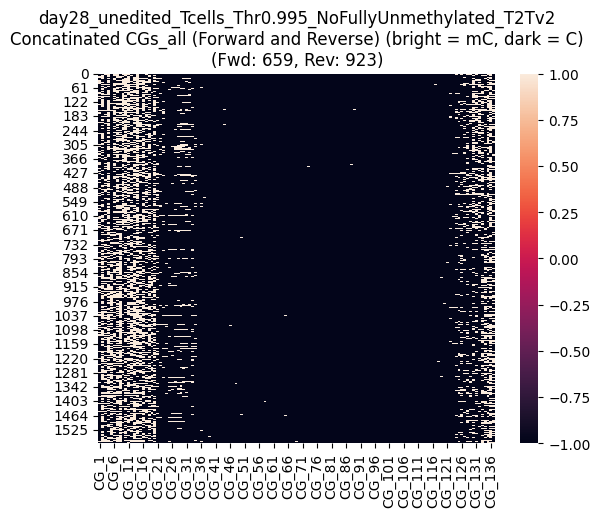

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



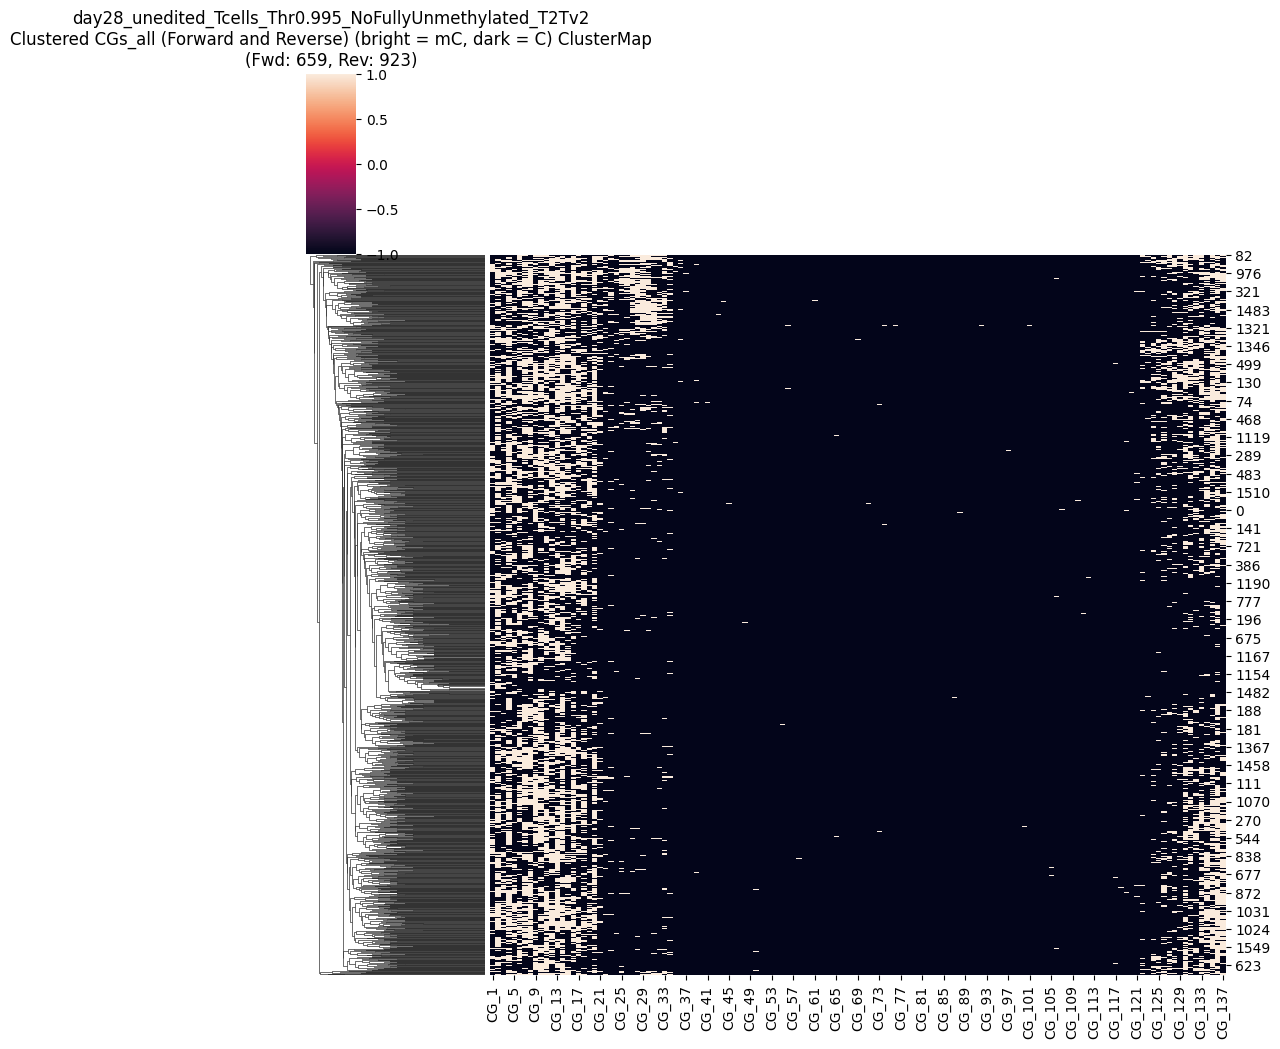

CGs_all saved as CG_137_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD659_numRVS923.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [48]:
threshold_mC = 0.995 #0.7 #  0.9 #0.99
experiment_name = "day28_unedited_Tcells_Thr"+str(threshold_mC)+"_NoFullyUnmethylated_T2Tv2"
bam_path = unedit_bam_path

print('experiment_name = ', experiment_name)

save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [49]:

CGs_all_unedited_original = CGs_all
CGs_all_unedited_original

CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   1.0   1.0   1.0   NaN   NaN   1.0   NaN   NaN    NaN  ...   
2      NaN   1.0   NaN   1.0   NaN   1.0   1.0   1.0   1.0    1.0  ...   
3      NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN    1.0  ...   
4      NaN   NaN   1.0   1.0   NaN   1.0   1.0   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1577   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN    NaN  ...   
1578   NaN   NaN   1.0   NaN   1.0   NaN   1.0   1.0   NaN    1.0  ...   
1579   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
1580   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN    NaN  ...   
1581   NaN   NaN   NaN   NaN   1.0   1.0   NaN   NaN   NaN    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     NaN     NaN     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
2        NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
3        1.0     1.0     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
4        1.0     1.0     NaN     1.0     NaN     NaN     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1577     NaN     NaN     NaN     NaN     NaN     1.0     1.0     NaN     NaN   
1578     NaN     NaN     1.0     NaN     NaN     NaN     1.0     1.0     1.0   
1579     NaN     NaN     NaN     NaN     NaN     1.0     NaN     1.0     1.0   
1580     NaN     NaN     NaN     NaN     1.0     NaN     1.0     1.0     1.0   
1581     NaN     NaN     NaN     NaN     NaN     1.0     NaN     1.0     NaN   

      CG_137  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
1577     NaN  
1578     1.0  
1579     1.0  
1580     NaN  
1581     NaN  

[1582 rows x 137 columns]

In [50]:
threshold_percent = 50
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 13.0
Maximum methylated CGs per read: 32.0
Threshold (50% of max): 6.50
Original number of reads: 1582
Number of reads after filtering: 1441
Removed 141 reads


read_name_str read_name read_id_number   mod  \
65     7d30168d-6731-4643-ab9a-46eaa22bfb24         7              7  CG,0   
66     7d30168d-6731-4643-ab9a-46eaa22bfb24         7              7  CG,0   
67     7d30168d-6731-4643-ab9a-46eaa22bfb24         7              7  CG,0   
68     7d30168d-6731-4643-ab9a-46eaa22bfb24         7              7  CG,0   
69     7d30168d-6731-4643-ab9a-46eaa22bfb24         7              7  CG,0   
...                                     ...       ...            ...   ...   
41670  33604bfb-7745-4a6e-beba-43acf1893e4a      3175           3175  CG,0   
41671  33604bfb-7745-4a6e-beba-43acf1893e4a      3175           3175  CG,0   
41672  33604bfb-7745-4a6e-beba-43acf1893e4a      3175           3175  CG,0   
41673  33604bfb-7745-4a6e-beba-43acf1893e4a      3175           3175  CG,0   
41674  33604bfb-7745-4a6e-beba-43acf1893e4a      3175           3175  CG,0   

        pos  pos_shifted  num_CG_methylated  
65    -2897          353                1.0  
66    -2453          797                1.0  
67    -2428          822                1.0  
68    -2426          824                1.0  
69    -2209         1041                1.0  
...     ...          ...                ...  
41670 -1224         2026                1.0  
41671  1359         4609                1.0  
41672  1485         4735                1.0  
41673  2387         5637                1.0  
41674  2833         6083                1.0  

[20405 rows x 7 columns]

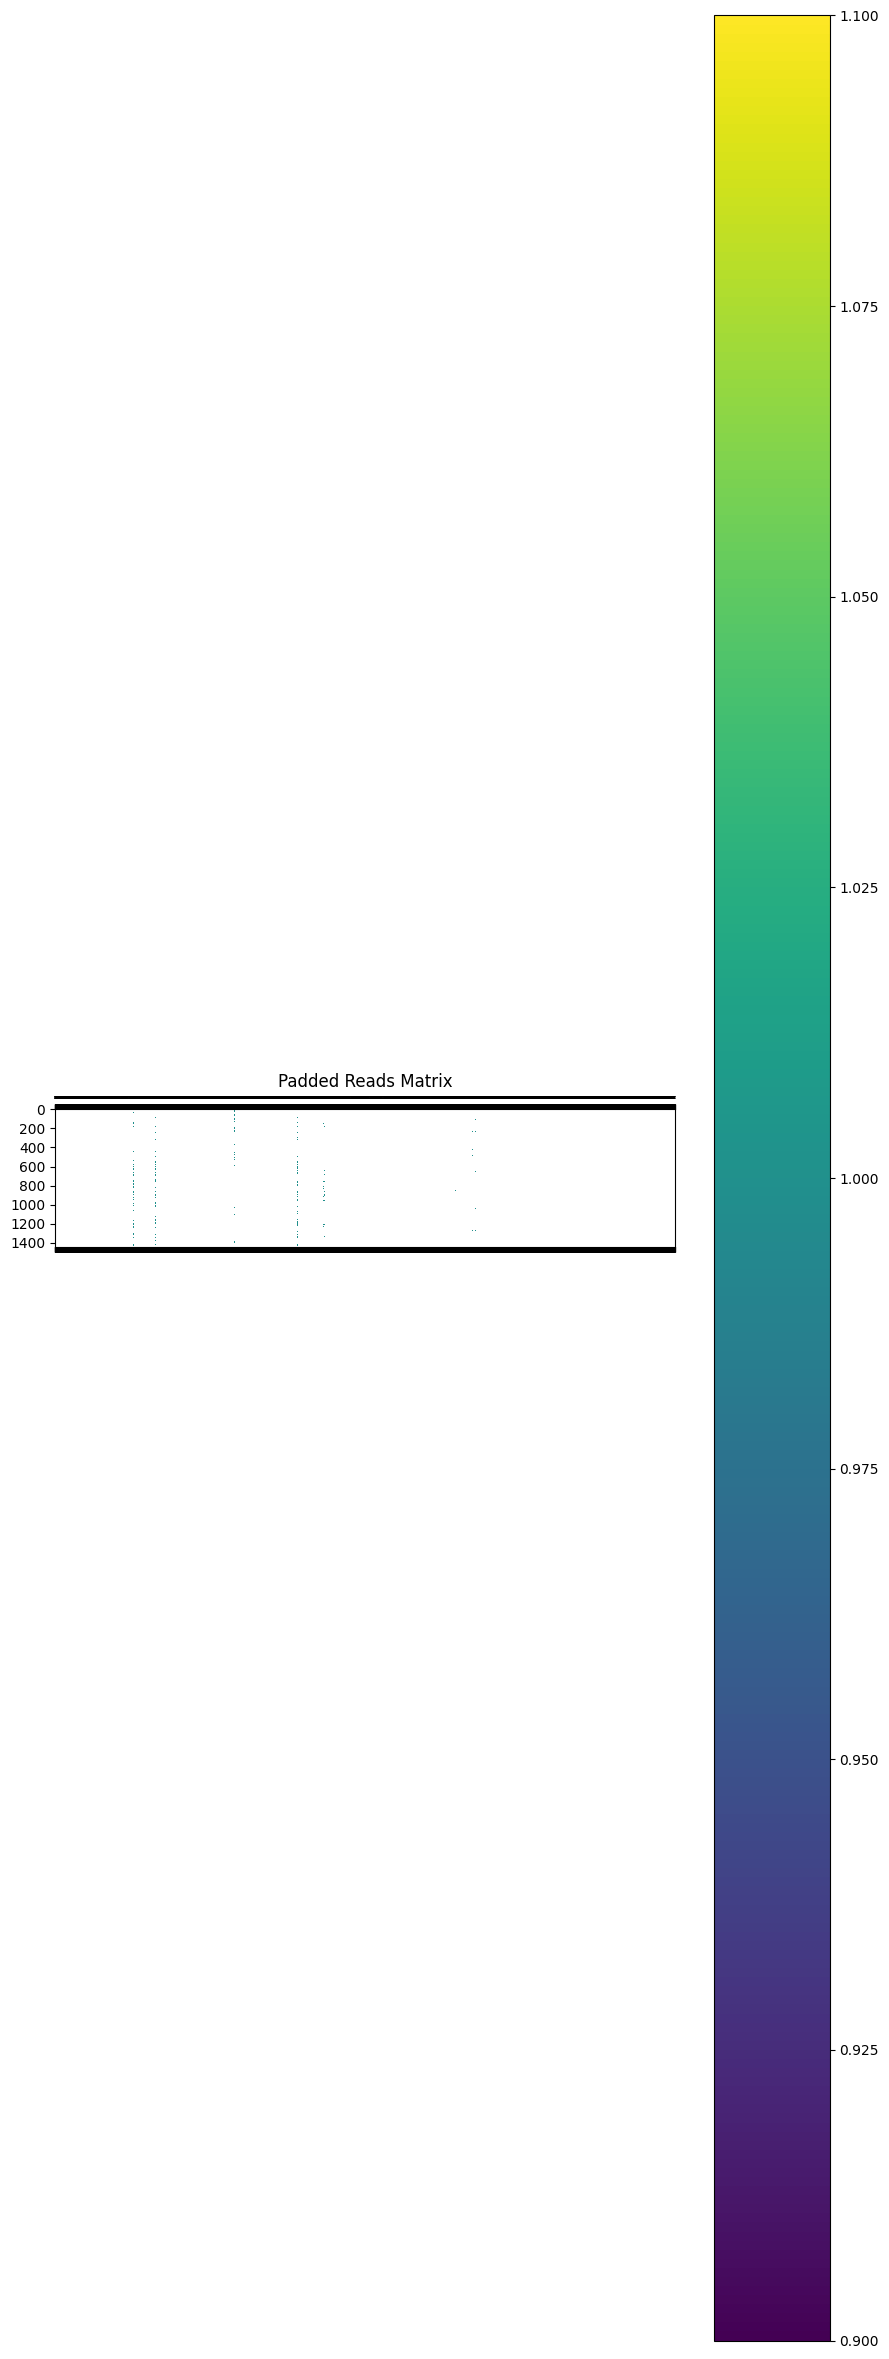

Padded reads saved to removed_low50_methylated_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


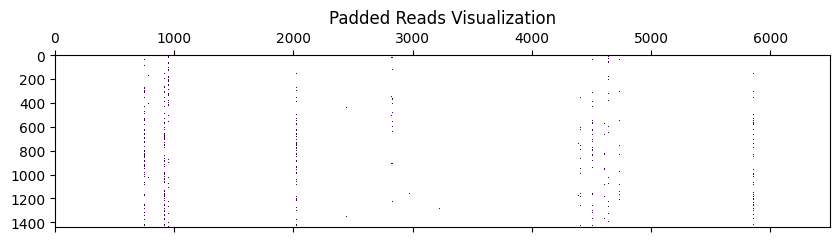

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

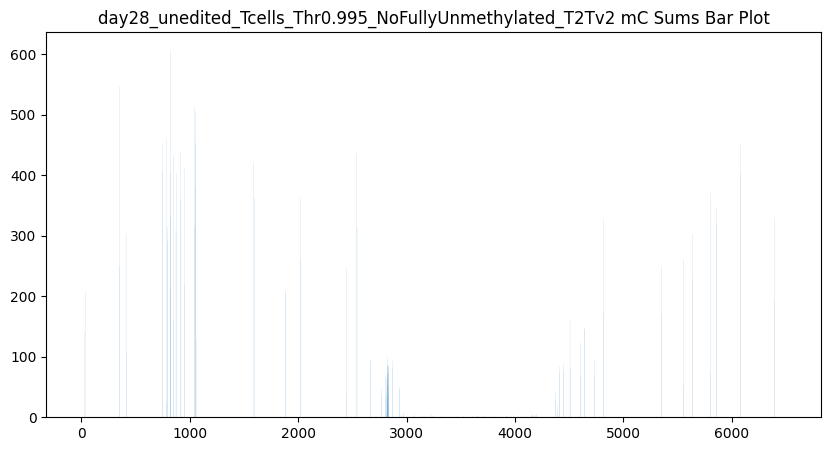

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


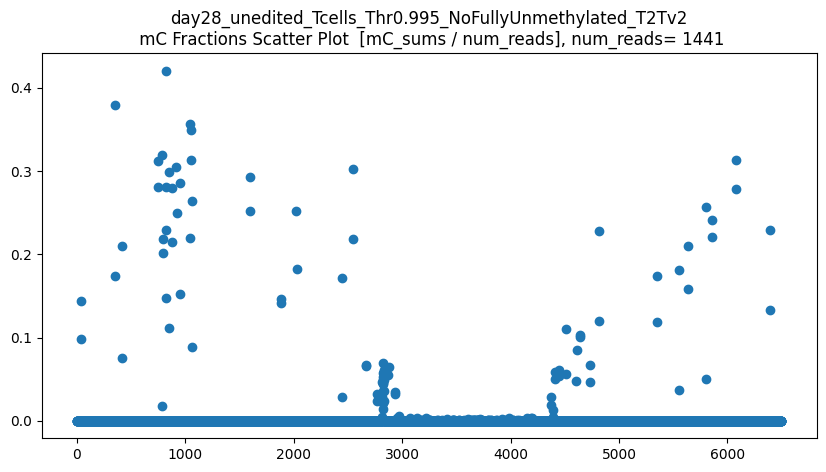

len(CGs_all) = 1441
CGs_all.shape = (1441, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


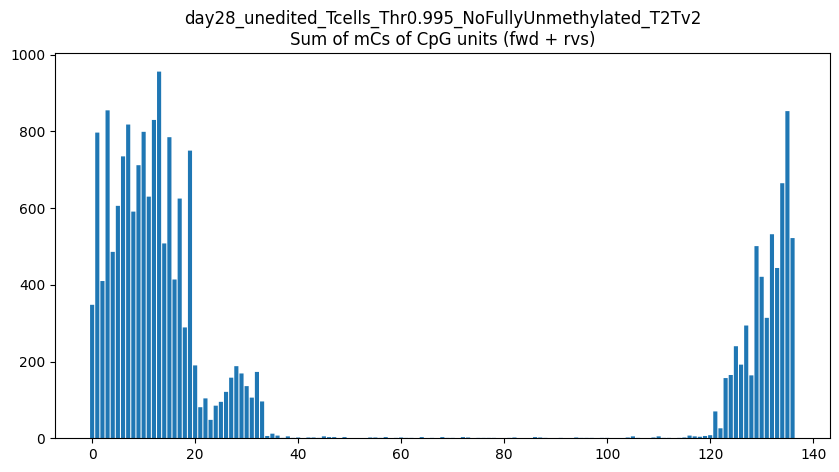

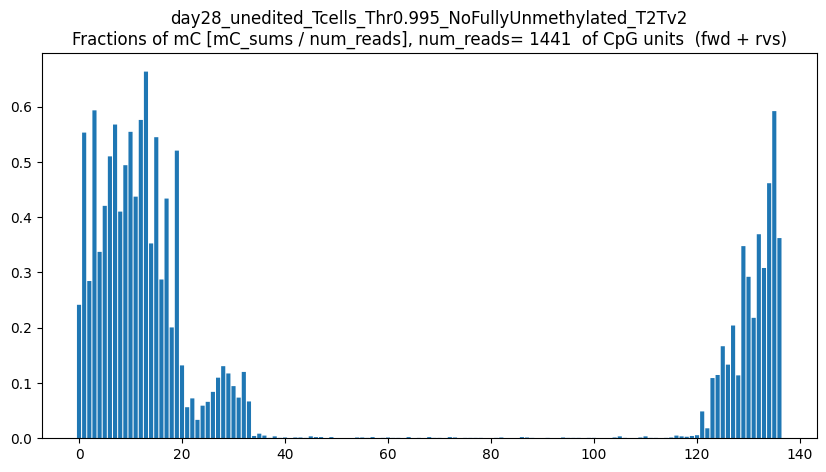

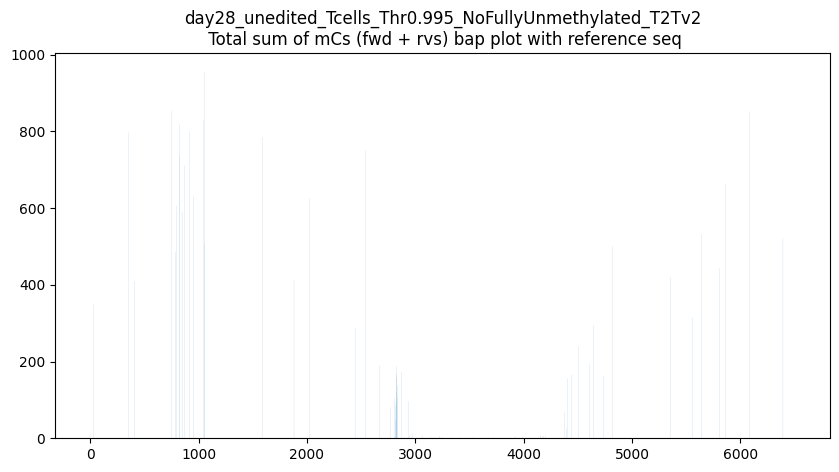

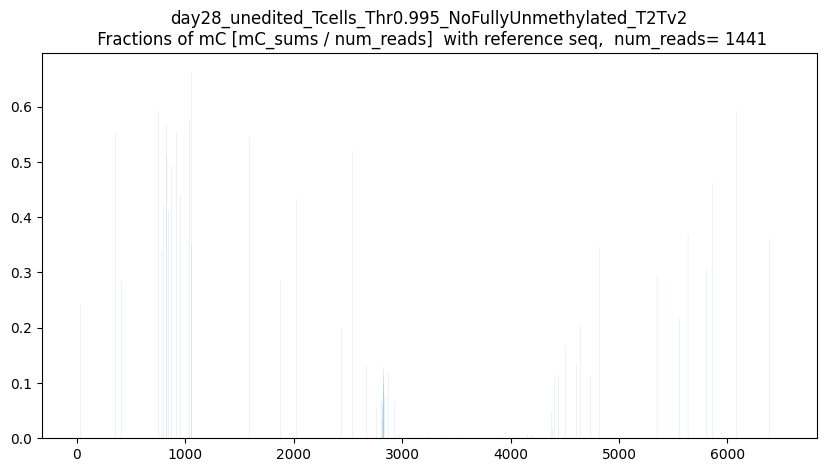

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



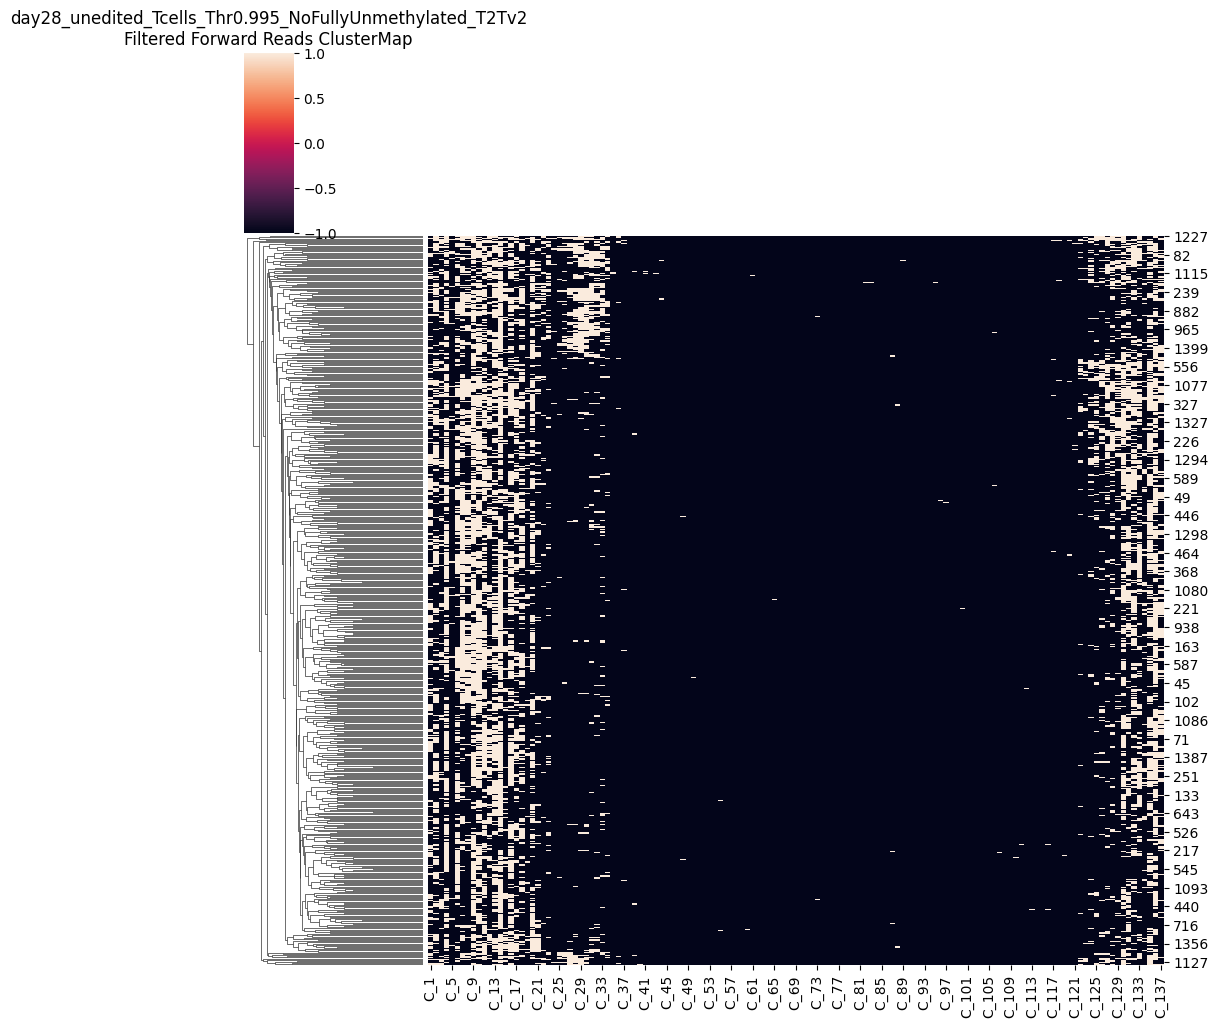

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



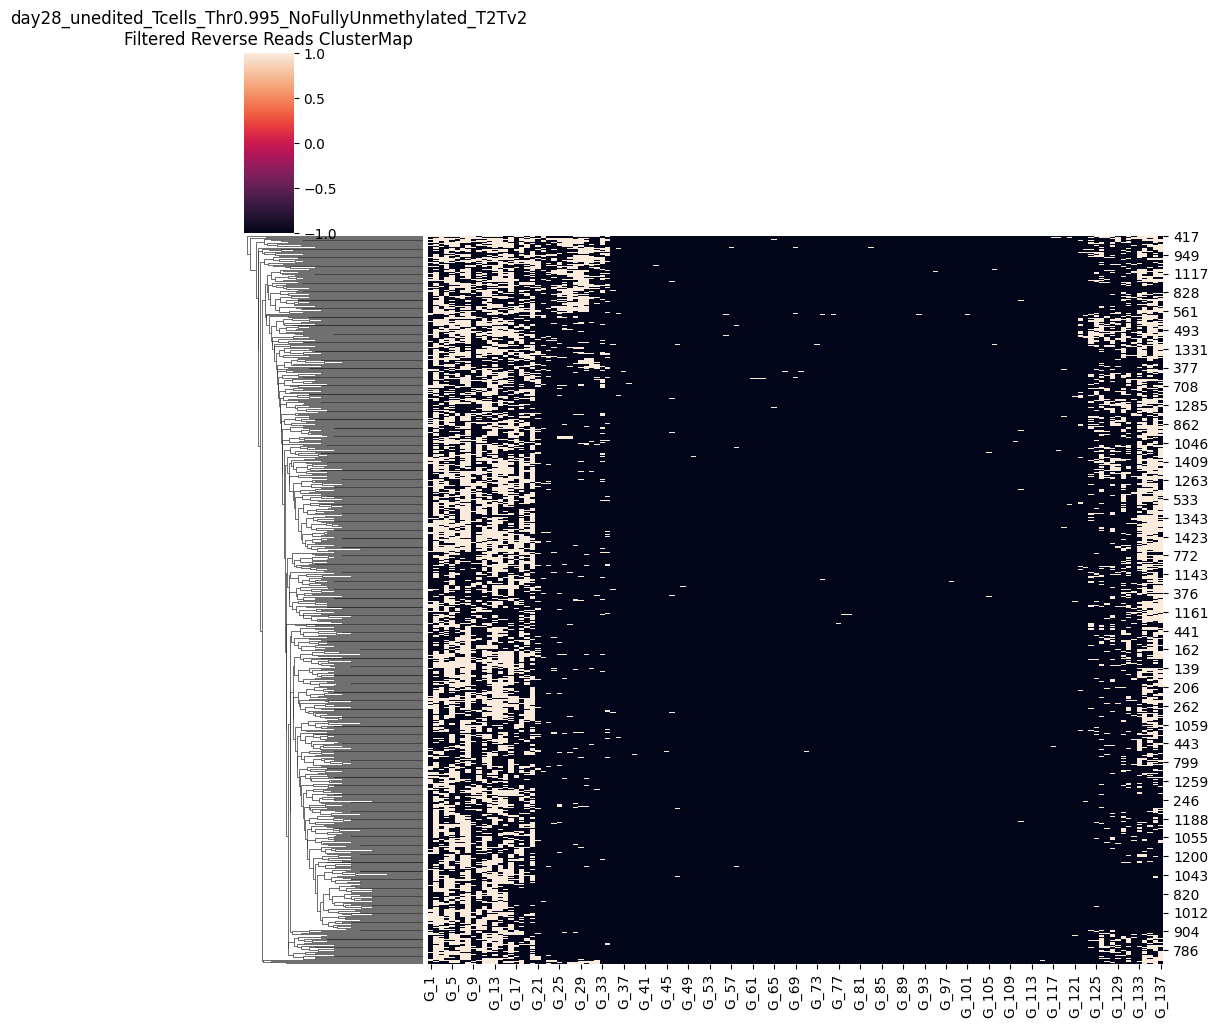

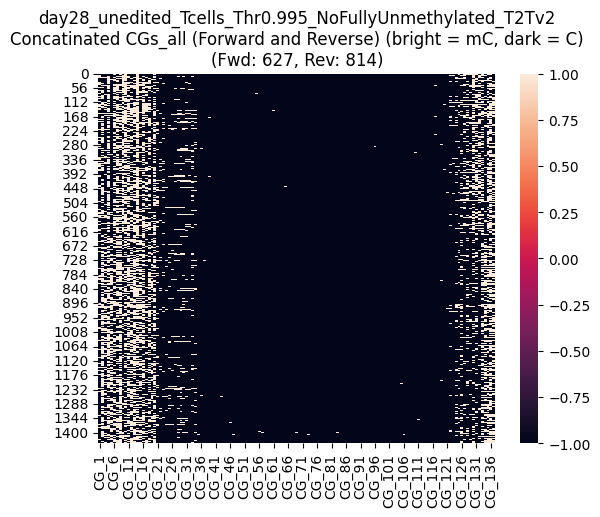

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



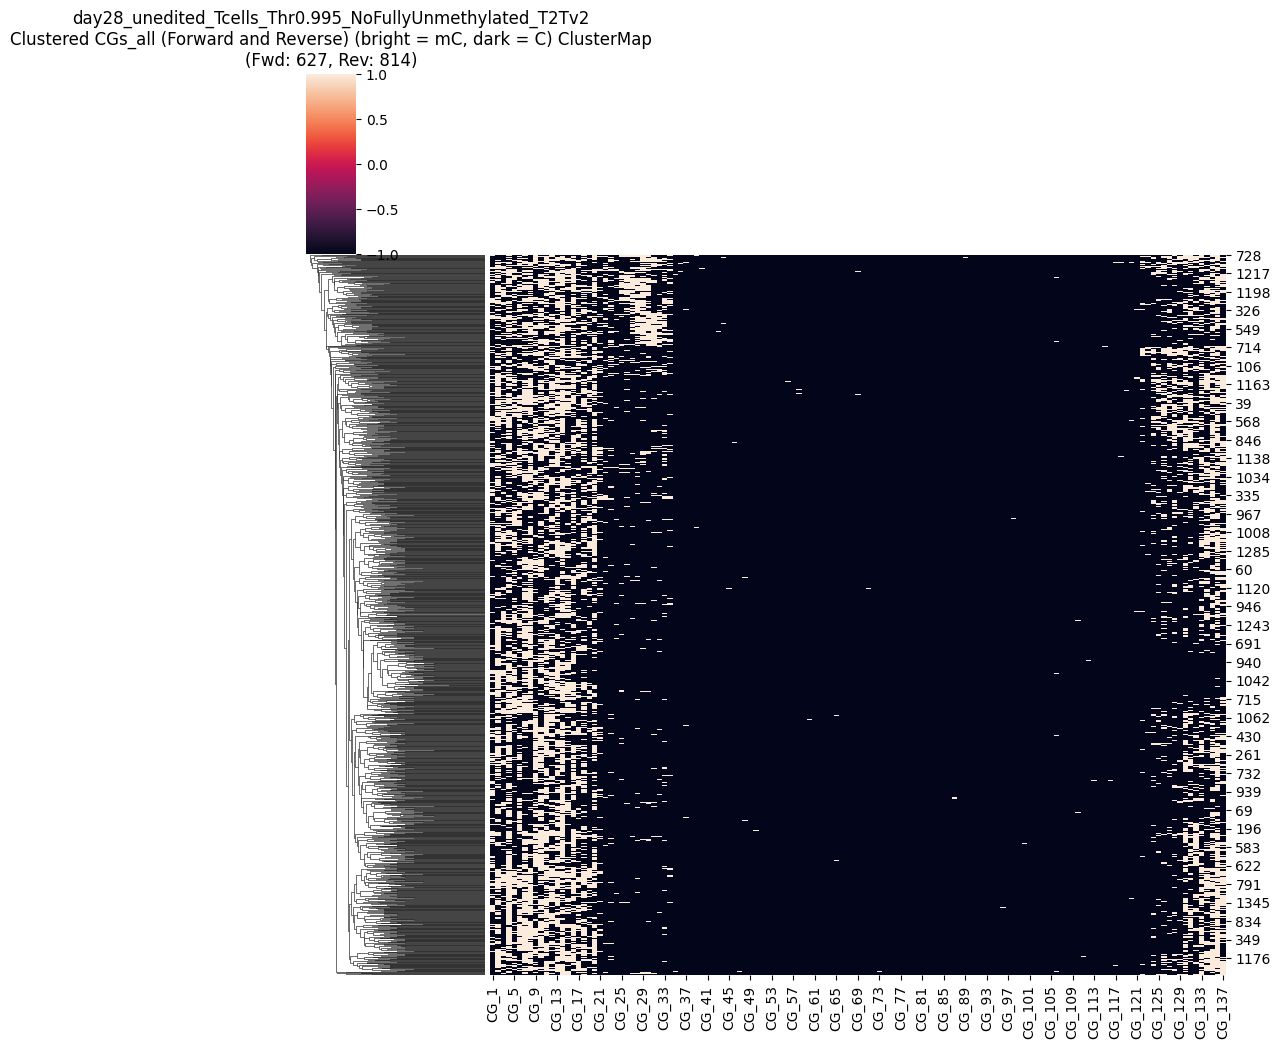

CGs_all saved as CG_137_removed_low50_methylated_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD627_numRVS814.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [51]:
save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [52]:
CGs_all_unedited_remove_low50 = CGs_all
CGs_all_unedited_remove_low50

CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   1.0   1.0   1.0   NaN   NaN   1.0   NaN   NaN    NaN  ...   
2      NaN   1.0   NaN   1.0   NaN   1.0   1.0   1.0   1.0    1.0  ...   
3      NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN    1.0  ...   
4      NaN   NaN   1.0   1.0   NaN   1.0   1.0   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1436   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN    NaN  ...   
1437   NaN   1.0   NaN   1.0   1.0   1.0   NaN   NaN   NaN    NaN  ...   
1438   NaN   NaN   1.0   NaN   1.0   NaN   1.0   1.0   NaN    1.0  ...   
1439   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN    NaN  ...   
1440   NaN   NaN   NaN   NaN   1.0   1.0   NaN   NaN   NaN    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     NaN     NaN     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
2        NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
3        1.0     1.0     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
4        1.0     1.0     NaN     1.0     NaN     NaN     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1436     1.0     1.0     NaN     1.0     NaN     1.0     NaN     1.0     NaN   
1437     1.0     NaN     NaN     1.0     NaN     1.0     NaN     NaN     NaN   
1438     NaN     NaN     1.0     NaN     NaN     NaN     1.0     1.0     1.0   
1439     NaN     NaN     NaN     NaN     1.0     NaN     1.0     1.0     1.0   
1440     NaN     NaN     NaN     NaN     NaN     1.0     NaN     1.0     NaN   

      CG_137  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
1436     NaN  
1437     NaN  
1438     1.0  
1439     NaN  
1440     NaN  

[1441 rows x 137 columns]

# remove <70% * mean

Mean methylated CGs per read: 13.0
Maximum methylated CGs per read: 32.0
Threshold (70% of max): 9.10
Original number of reads: 1582
Number of reads after filtering: 1219
Removed 363 reads


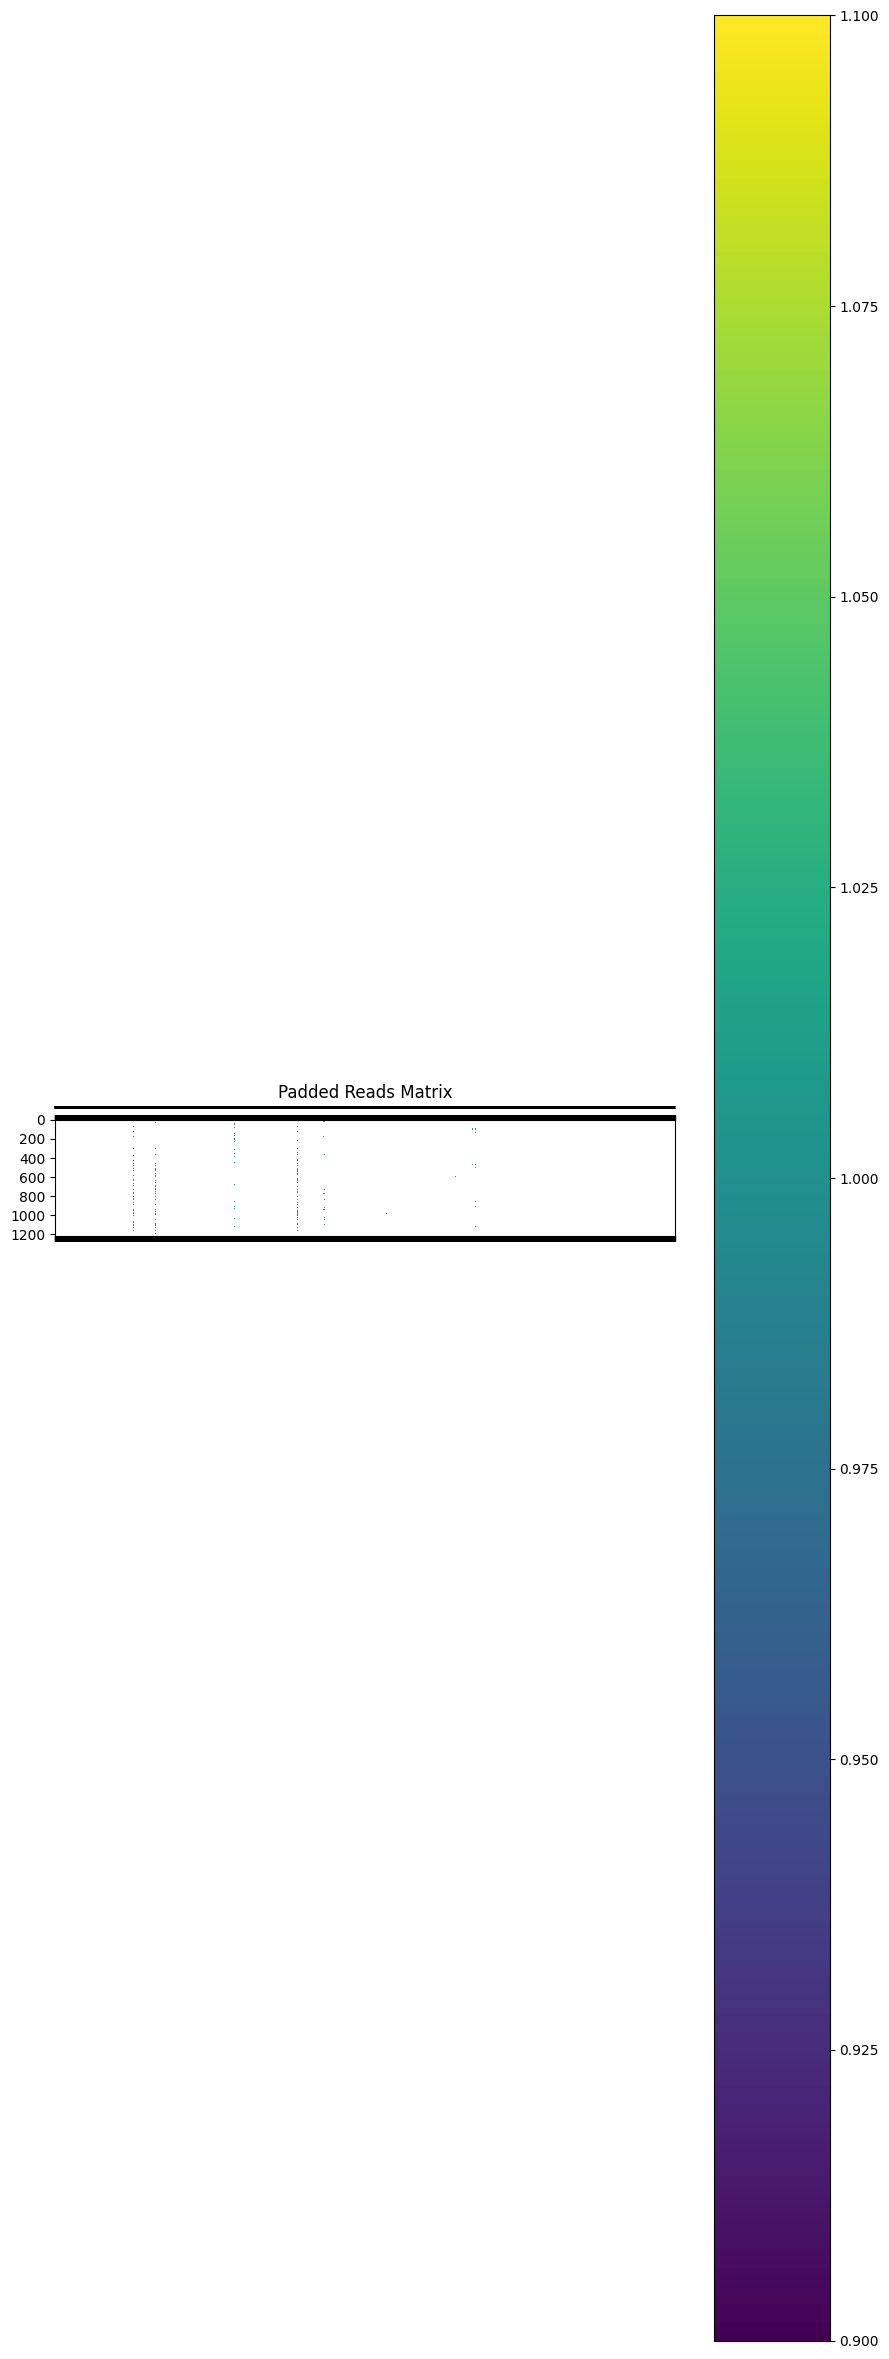

Padded reads saved to removed_low70_methylated_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


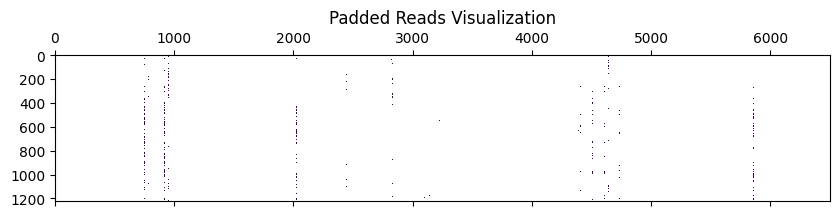

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

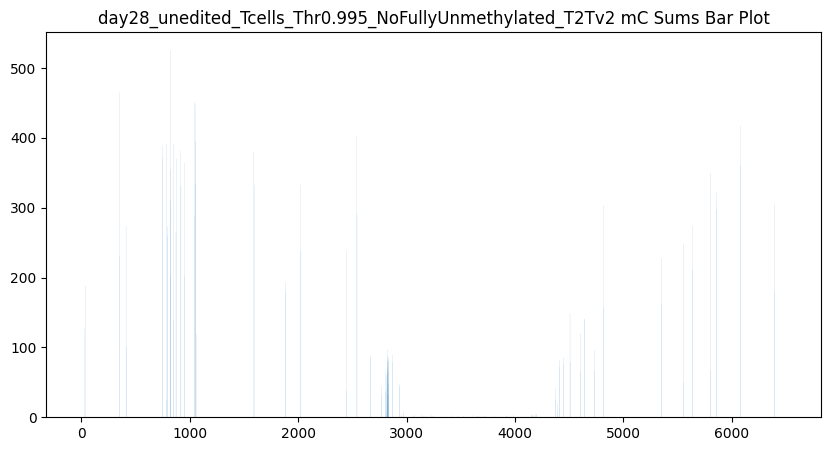

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


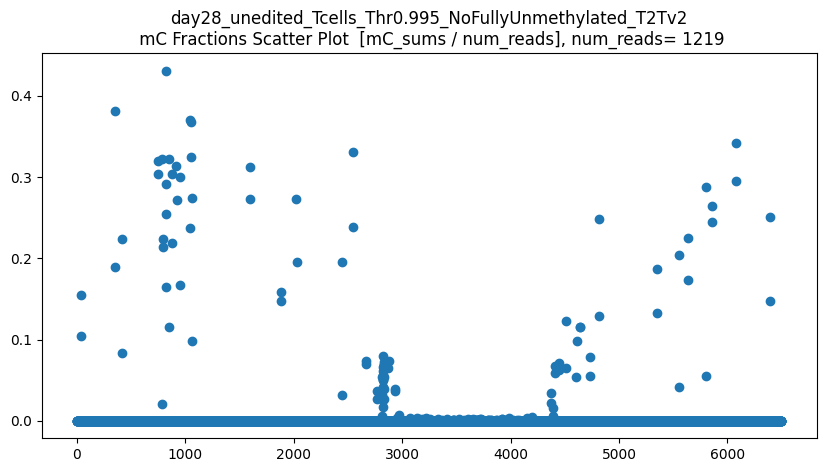

len(CGs_all) = 1219
CGs_all.shape = (1219, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


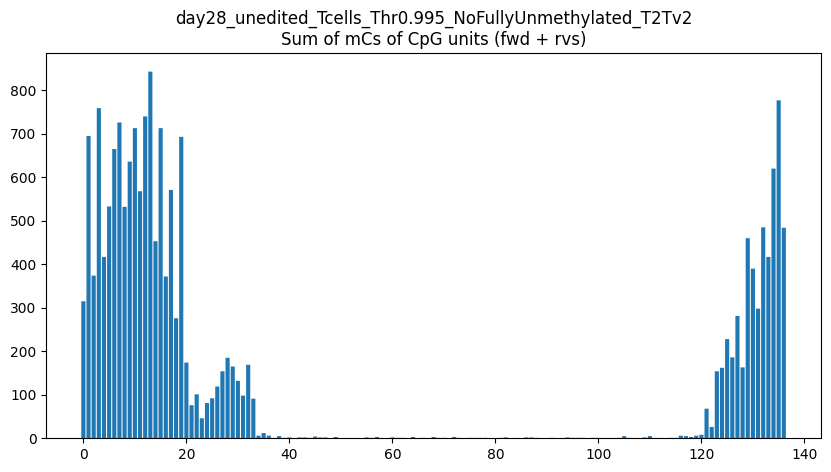

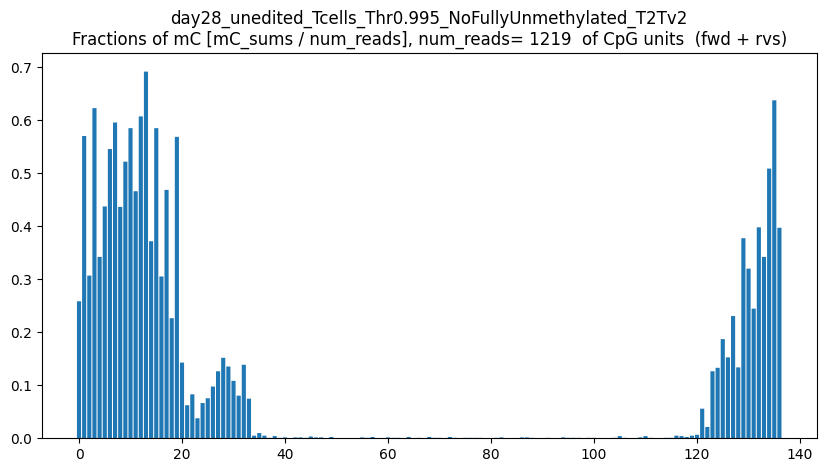

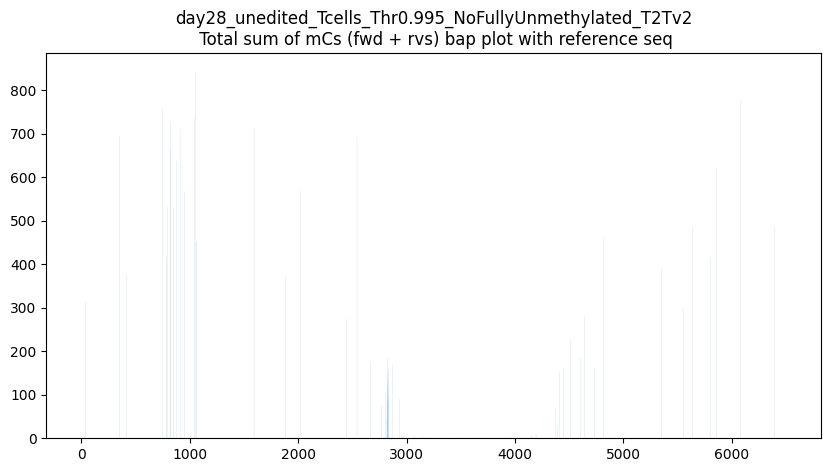

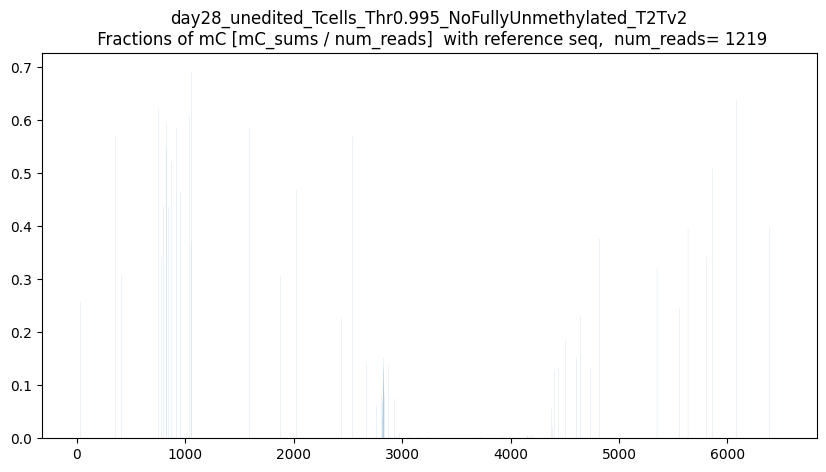

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



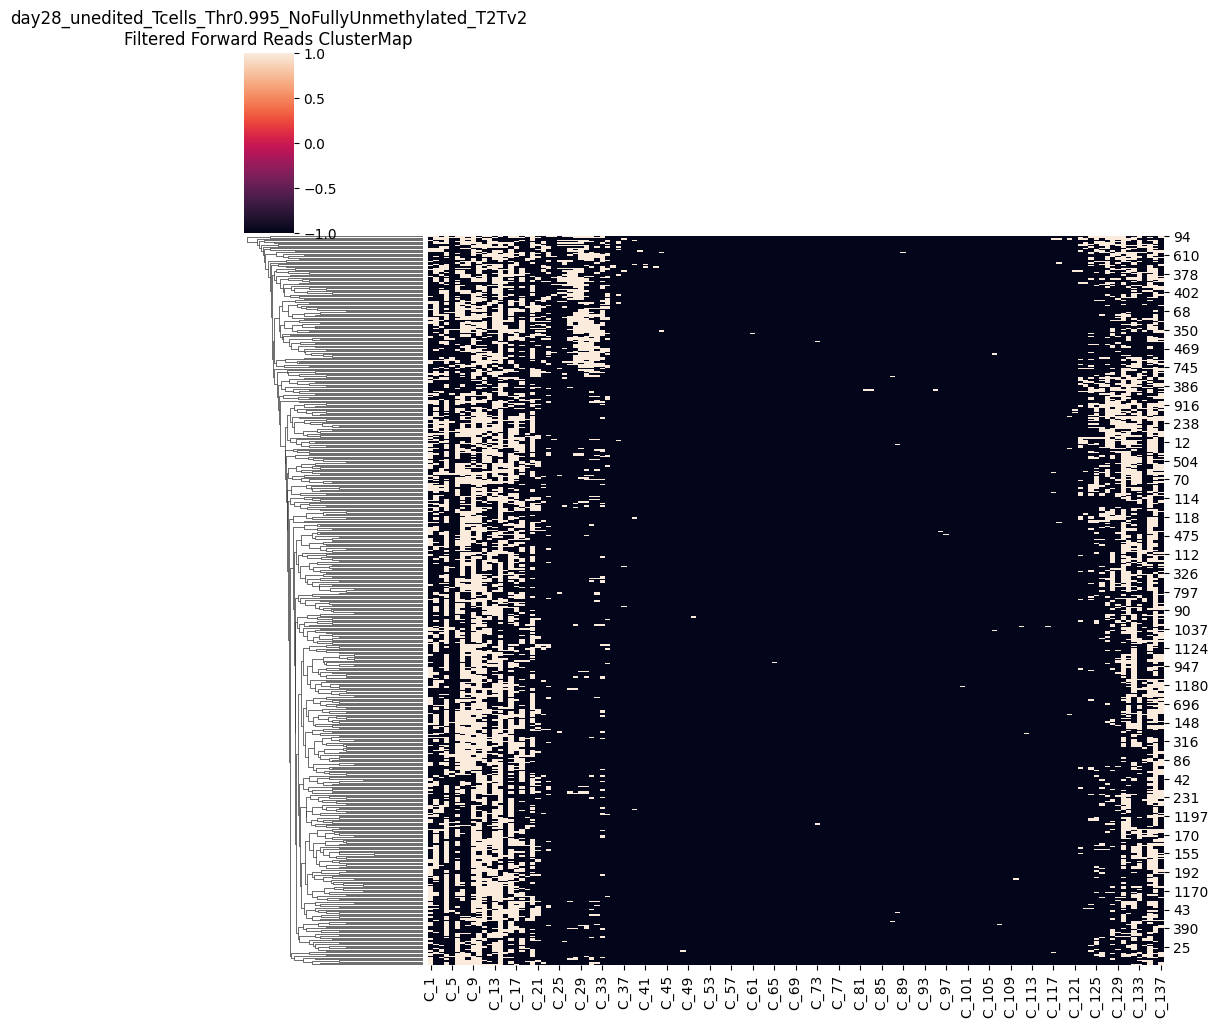

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



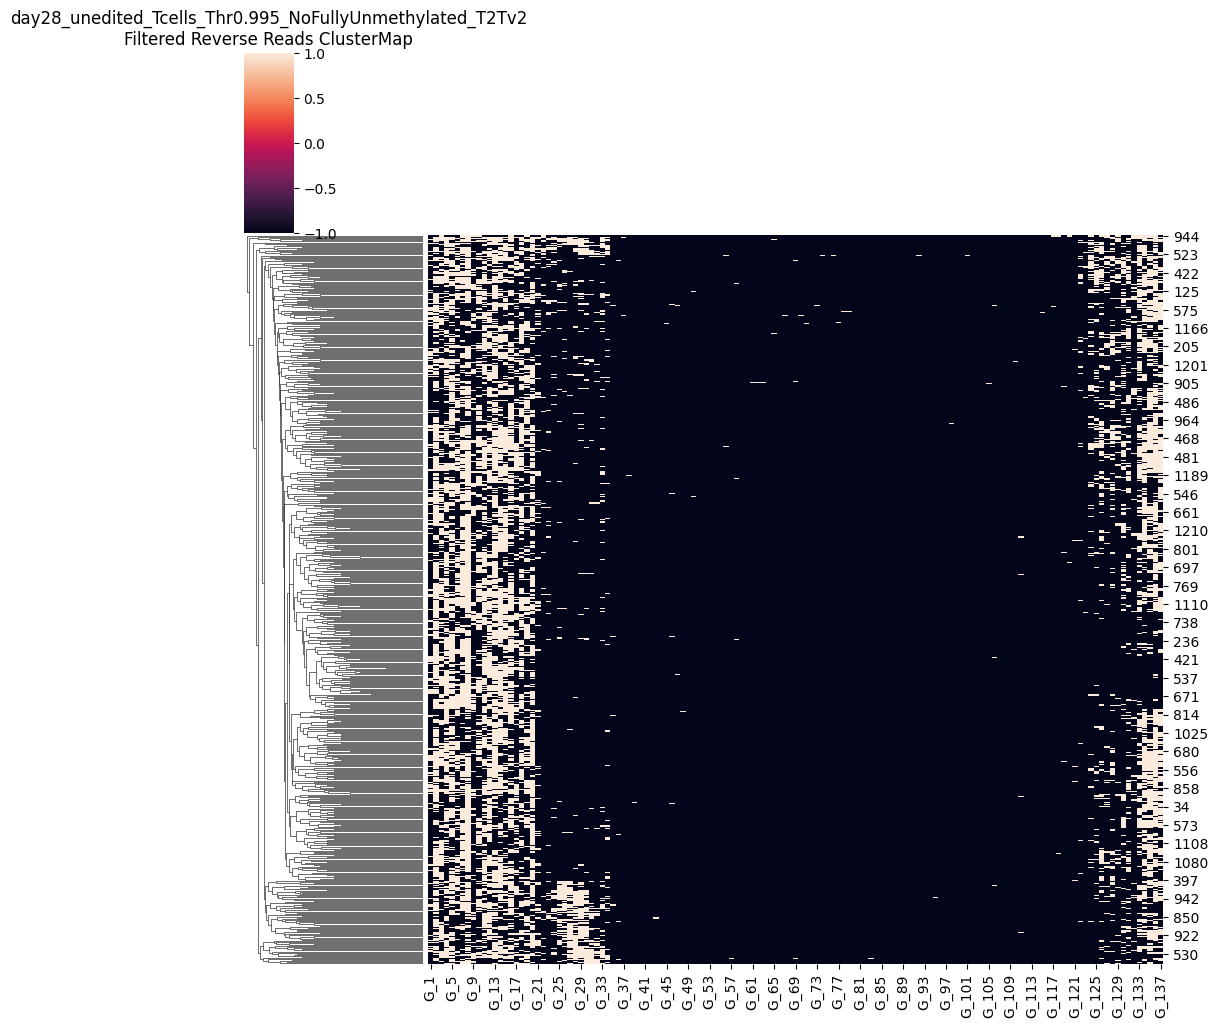

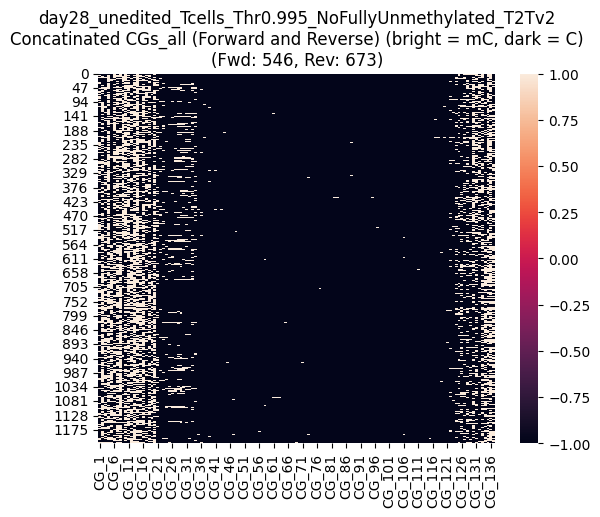

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



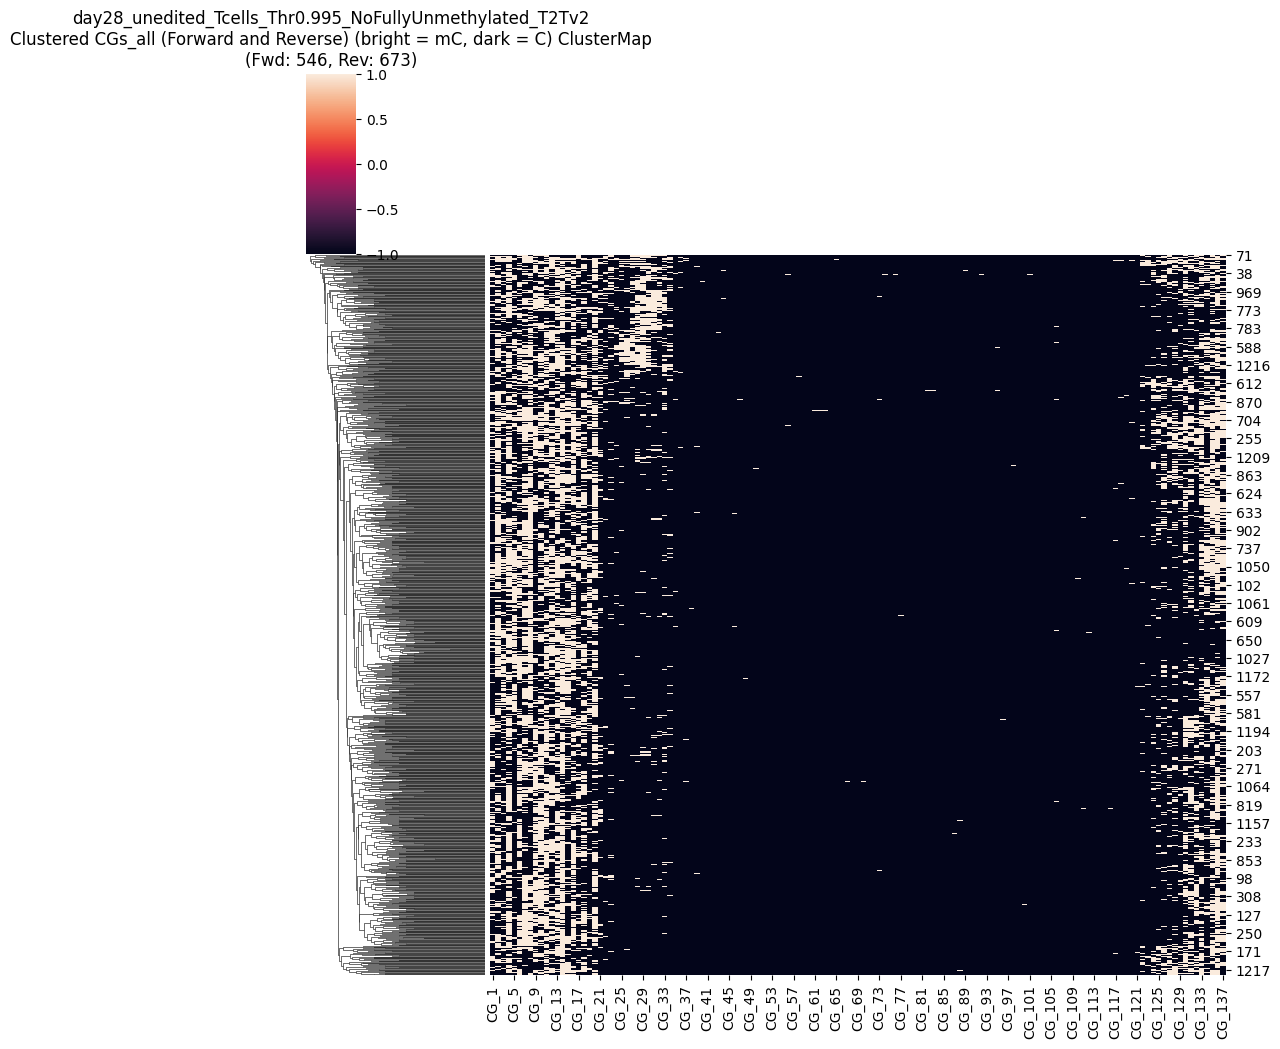

CGs_all saved as CG_137_removed_low70_methylated_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD546_numRVS673.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   1.0   1.0   1.0   NaN   NaN   1.0   NaN   NaN    NaN  ...   
2      NaN   1.0   NaN   1.0   NaN   1.0   1.0   1.0   1.0    1.0  ...   
3      NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN    1.0  ...   
4      NaN   NaN   1.0   1.0   NaN   1.0   1.0   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1214   NaN   1.0   NaN   NaN   NaN   1.0   1.0   1.0   NaN    NaN  ...   
1215   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
1216   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN    NaN  ...   
1217   NaN   1.0   NaN   1.0   1.0   1.0   NaN   NaN   NaN    NaN  ...   
1218   NaN   NaN   1.0   NaN   1.0   NaN   1.0   1.0   NaN    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     NaN     NaN     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
2        NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
3        1.0     1.0     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
4        1.0     1.0     NaN     1.0     NaN     NaN     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1214     NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
1215     NaN     NaN     NaN     NaN     NaN     NaN     1.0     1.0     1.0   
1216     1.0     1.0     NaN     1.0     NaN     1.0     NaN     1.0     NaN   
1217     1.0     NaN     NaN     1.0     NaN     1.0     NaN     NaN     NaN   
1218     NaN     NaN     1.0     NaN     NaN     NaN     1.0     1.0     1.0   

      CG_137  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
1214     1.0  
1215     NaN  
1216     NaN  
1217     NaN  
1218     1.0  

[1219 rows x 137 columns]

In [53]:
threshold_percent = 70
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_unedited_remove_low70 = CGs_all
CGs_all_unedited_remove_low70

Mean methylated CGs per read: 13.0
Maximum methylated CGs per read: 32.0
Threshold (80% of max): 10.40
Original number of reads: 1582
Number of reads after filtering: 1097
Removed 485 reads


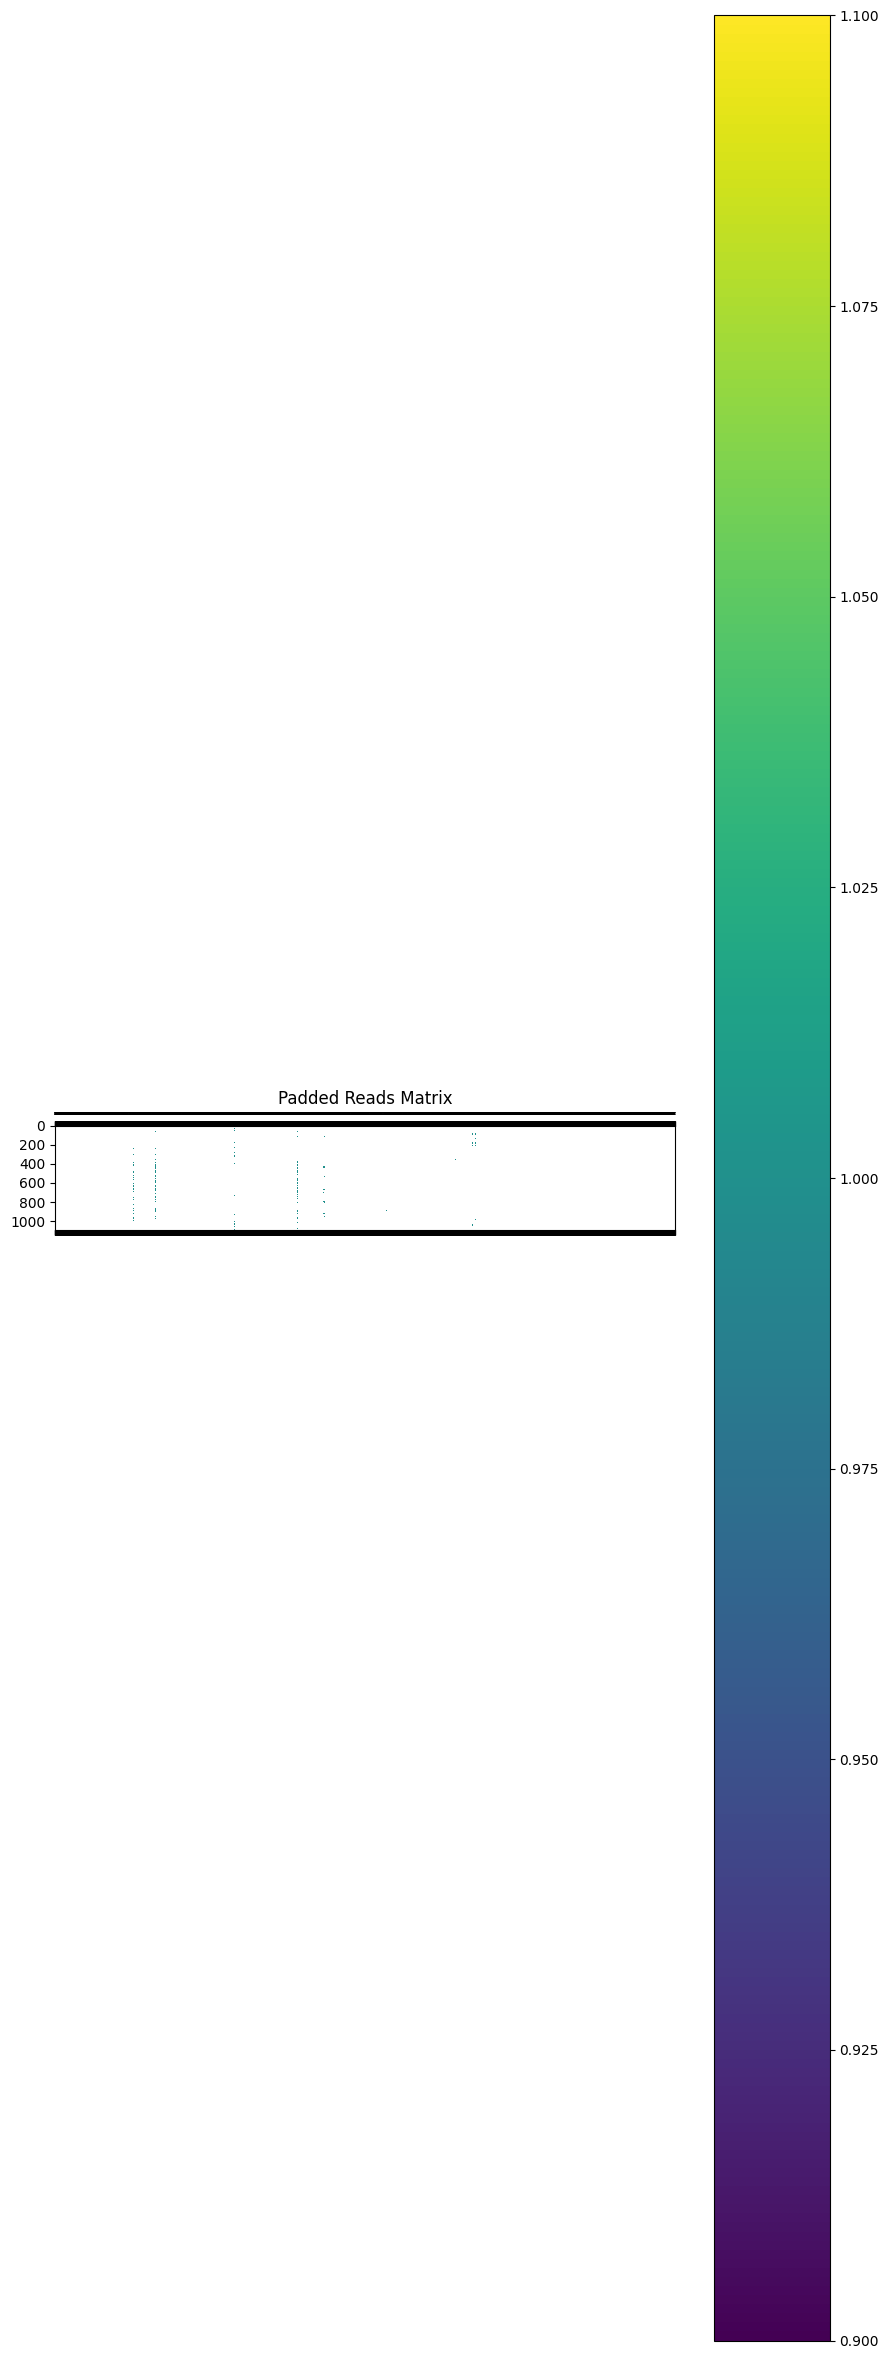

Padded reads saved to removed_low80_methylated_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


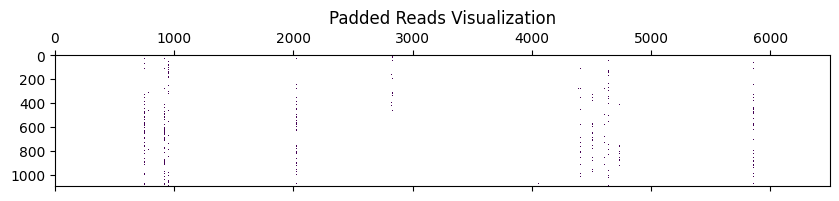

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

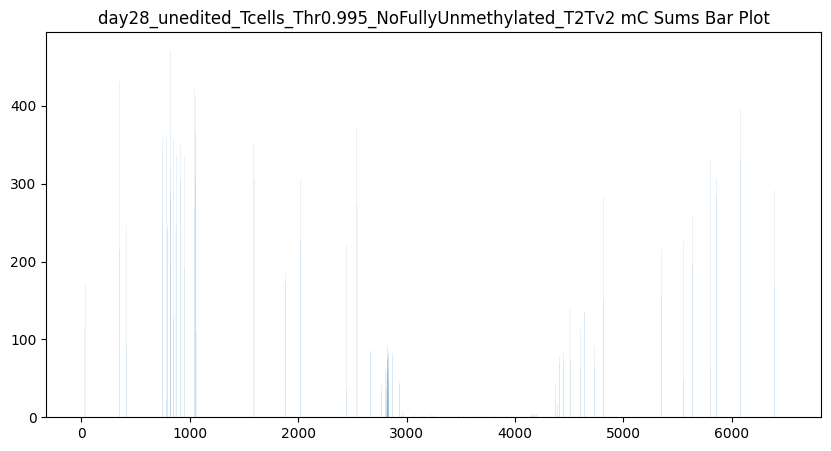

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


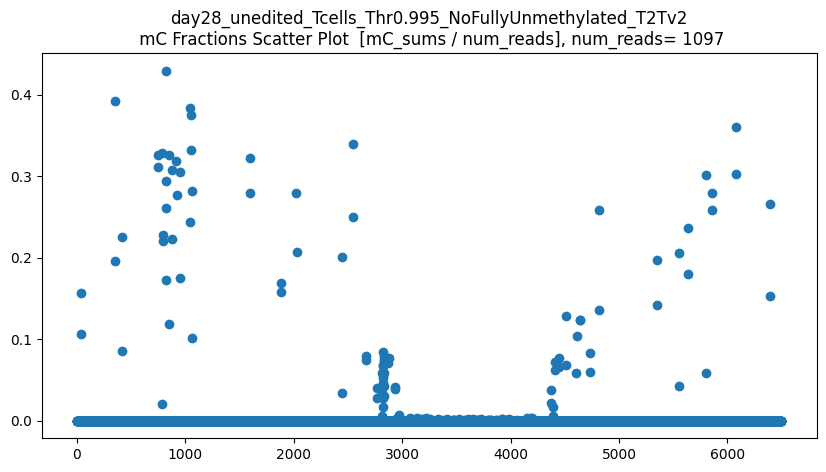

len(CGs_all) = 1097
CGs_all.shape = (1097, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


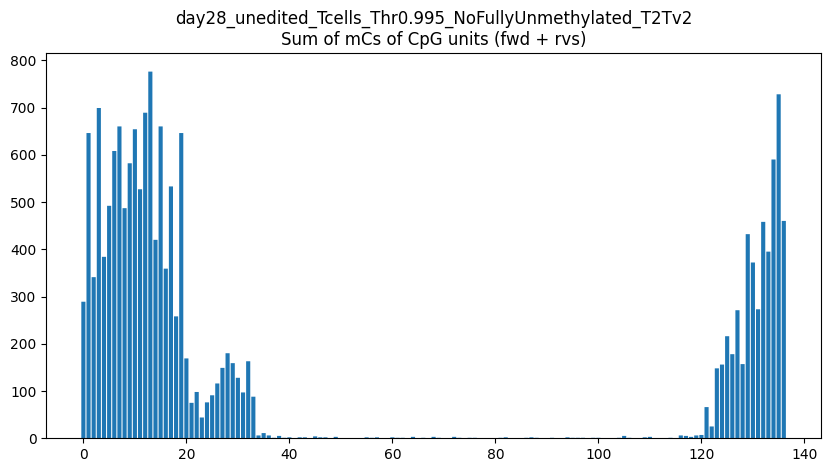

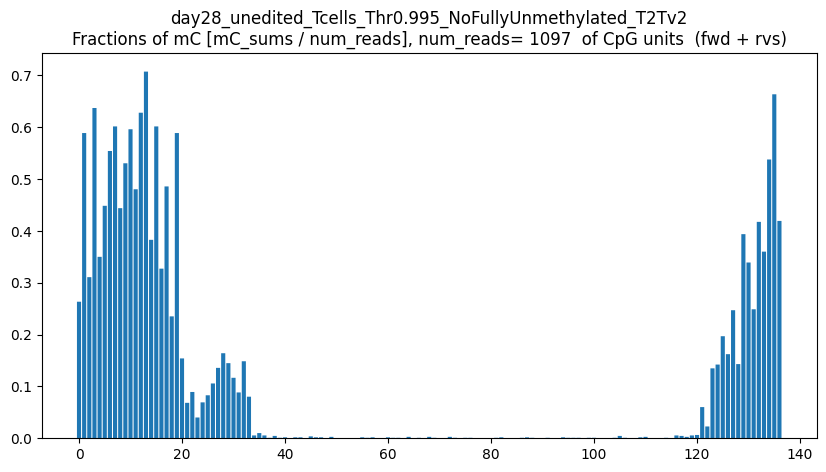

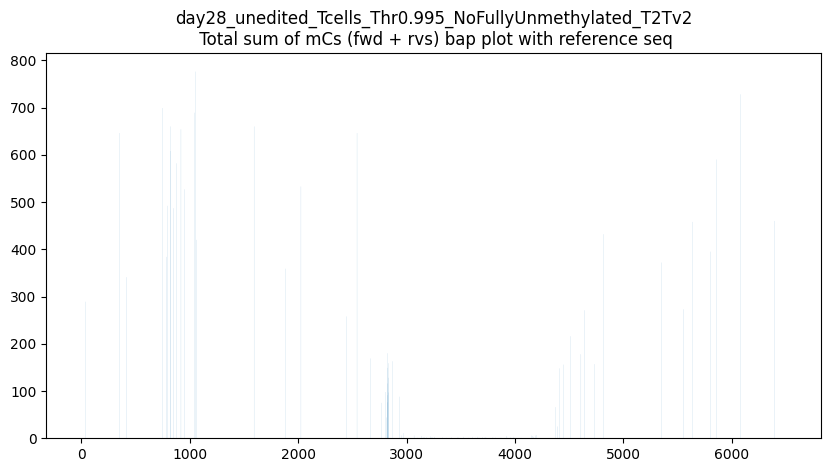

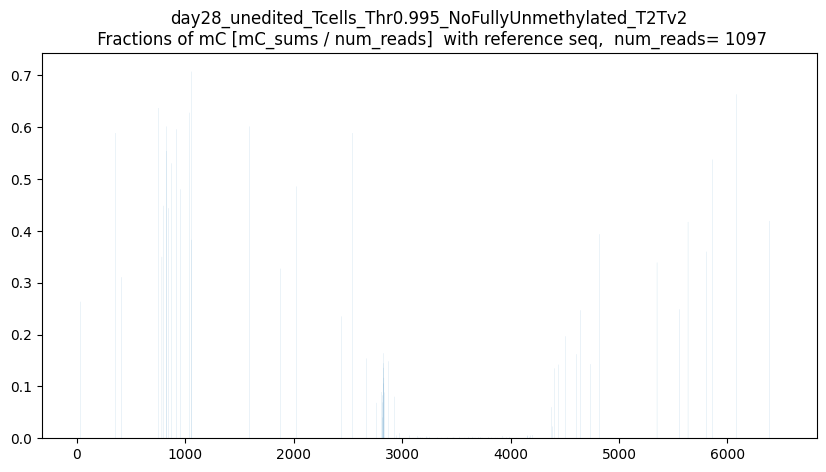

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



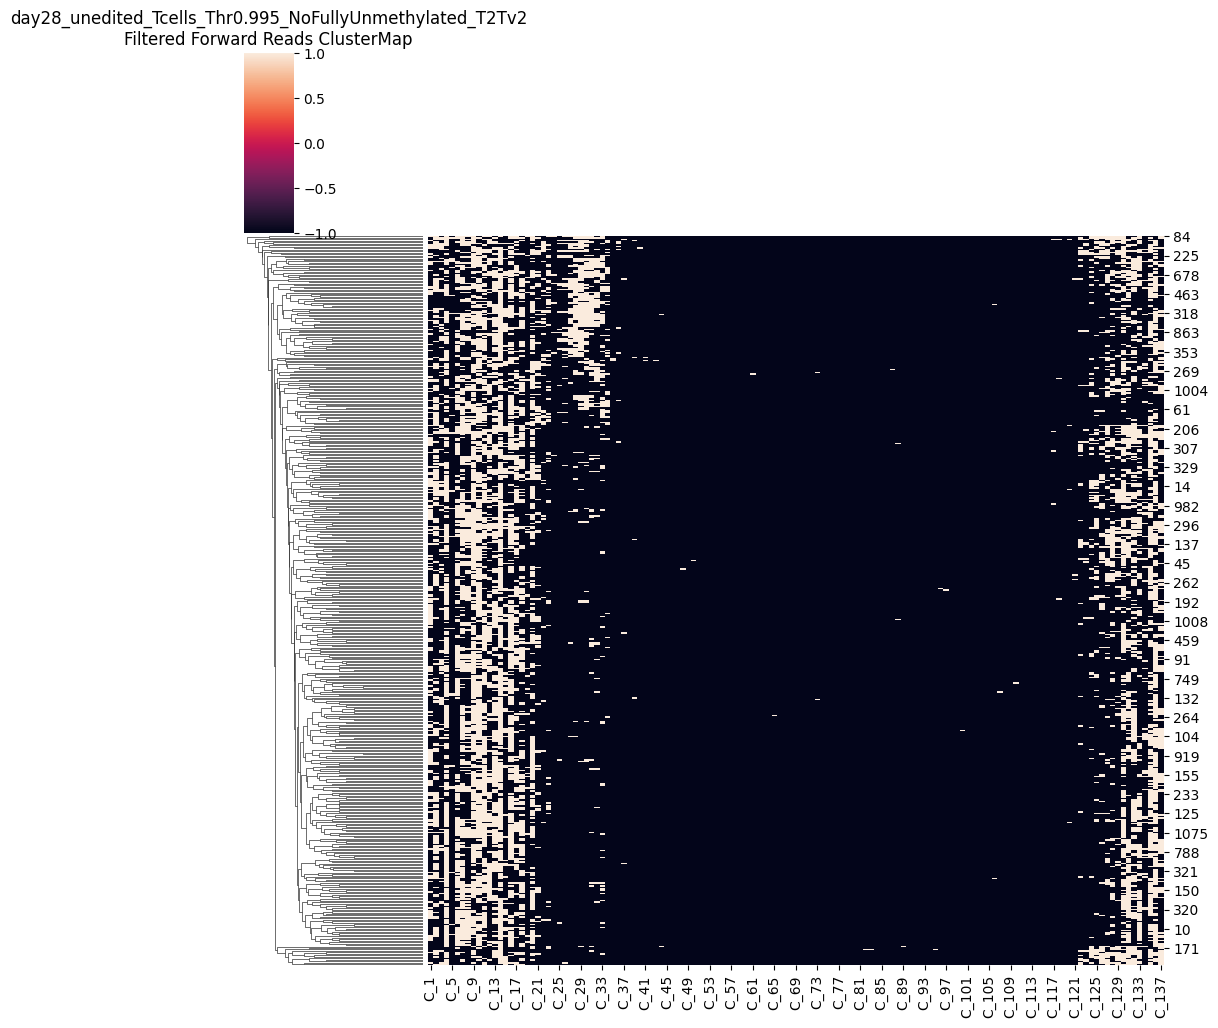

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



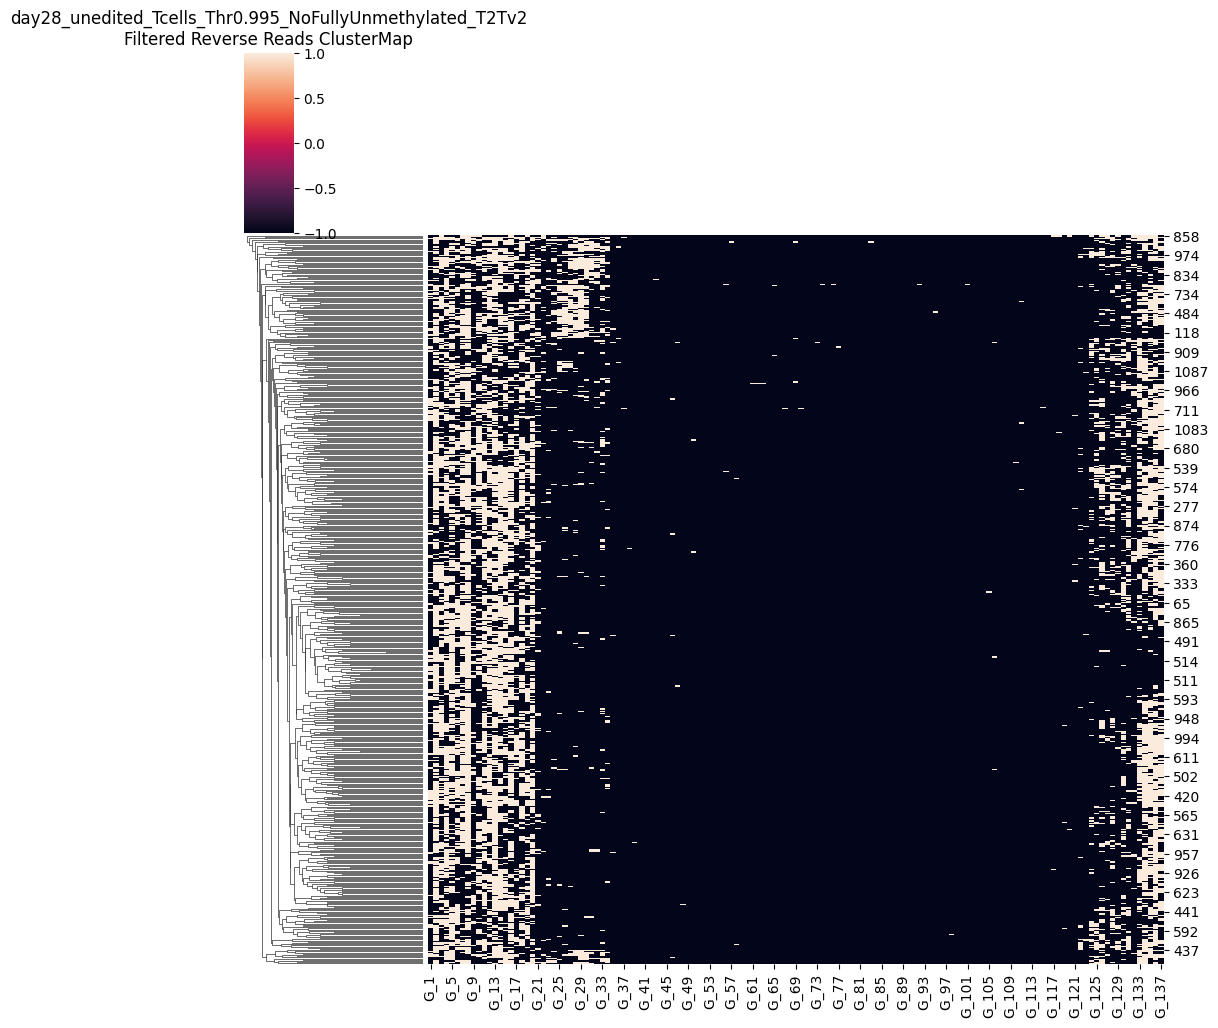

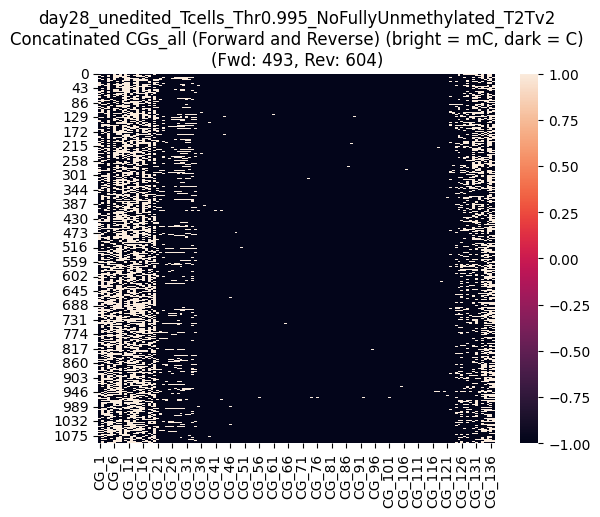

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



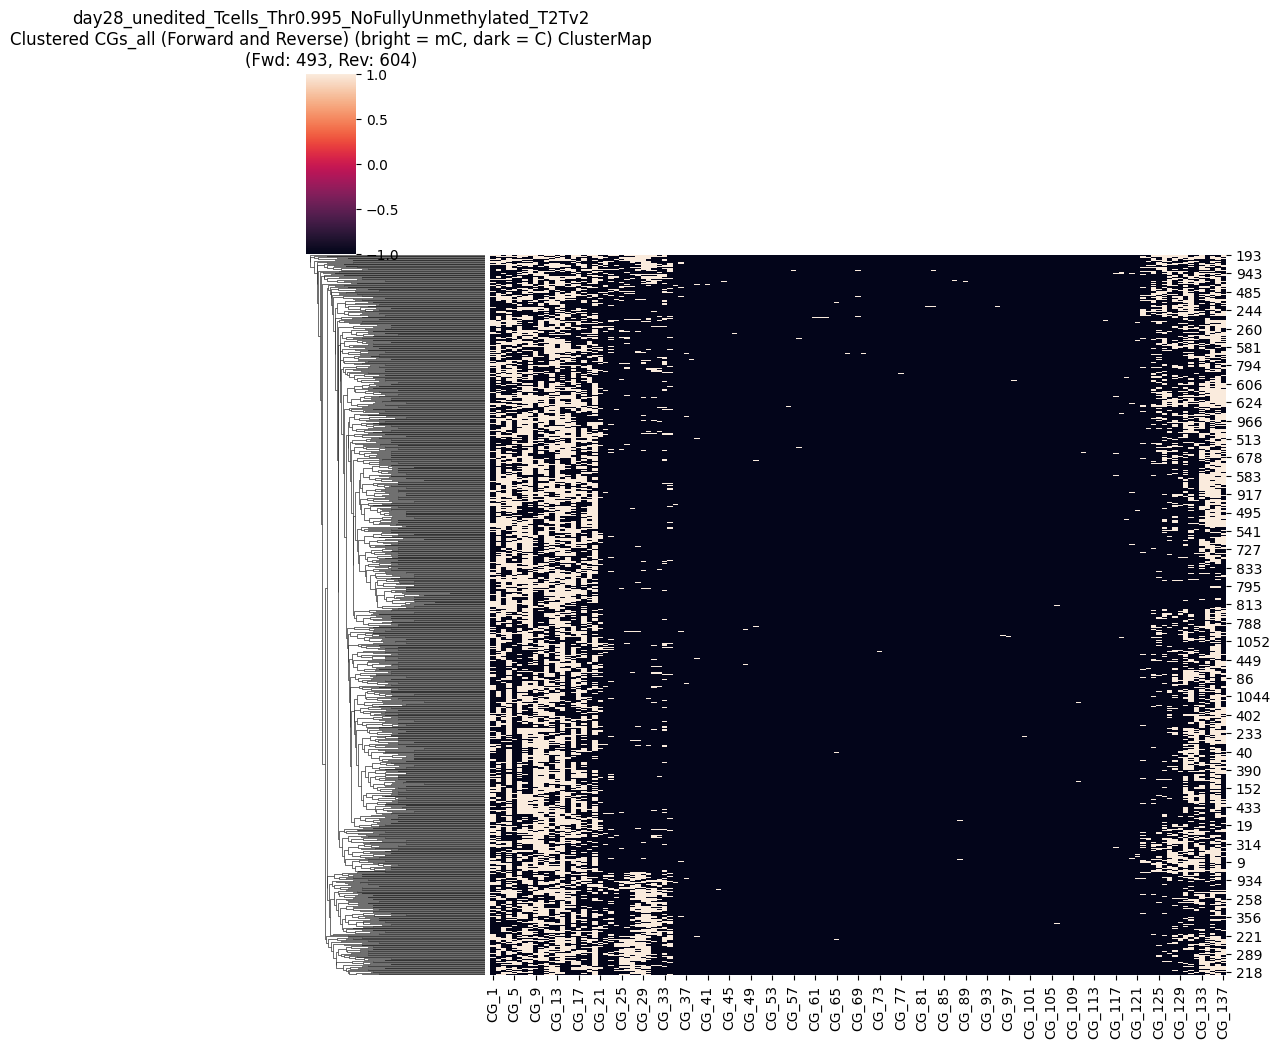

CGs_all saved as CG_137_removed_low80_methylated_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD493_numRVS604.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      NaN   1.0   1.0   1.0   NaN   NaN   1.0   NaN   NaN    NaN  ...   
1      NaN   1.0   NaN   1.0   NaN   1.0   1.0   1.0   1.0    1.0  ...   
2      NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN    1.0  ...   
3      NaN   NaN   1.0   1.0   NaN   1.0   1.0   NaN   1.0    1.0  ...   
4      NaN   1.0   NaN   NaN   NaN   NaN   1.0   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1092   NaN   1.0   NaN   NaN   NaN   1.0   1.0   1.0   NaN    NaN  ...   
1093   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
1094   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN    NaN  ...   
1095   NaN   1.0   NaN   1.0   1.0   1.0   NaN   NaN   NaN    NaN  ...   
1096   NaN   NaN   1.0   NaN   1.0   NaN   1.0   1.0   NaN    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
1        NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
2        1.0     1.0     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
3        1.0     1.0     NaN     1.0     NaN     NaN     NaN     1.0     1.0   
4        1.0     1.0     1.0     NaN     1.0     1.0     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1092     NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
1093     NaN     NaN     NaN     NaN     NaN     NaN     1.0     1.0     1.0   
1094     1.0     1.0     NaN     1.0     NaN     1.0     NaN     1.0     NaN   
1095     1.0     NaN     NaN     1.0     NaN     1.0     NaN     NaN     NaN   
1096     NaN     NaN     1.0     NaN     NaN     NaN     1.0     1.0     1.0   

      CG_137  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
1092     1.0  
1093     NaN  
1094     NaN  
1095     NaN  
1096     1.0  

[1097 rows x 137 columns]

In [54]:
threshold_percent = 80
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_unedited_remove_low80 = CGs_all
CGs_all_unedited_remove_low80

# Silenced data: Day 6 CRISPoff 

In [27]:
silenced_bam_path ="/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
silenced_bam_path

'/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [ ]:
threshold_mC = 0.995 # 0.7 # 0.9 #0.99

experiment_name = "day6_CROFF_Tcells_Thr"+str(threshold_mC)+"_NoFullyUnmethylated_T2Tv2" 
print('experiment_name = ', experiment_name)

bam_path = silenced_bam_path


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

Found read coordinates: 10130 reads
Unique read names with methylation: 9724
Found 3453 reads with full coverage
Reads with methylation data: 9724
Overlap between full coverage and methylation: 3367
After full coverage filtering: 93275 reads with methylation data
Final result: 93275 reads with methylation information out of 10130 total reads


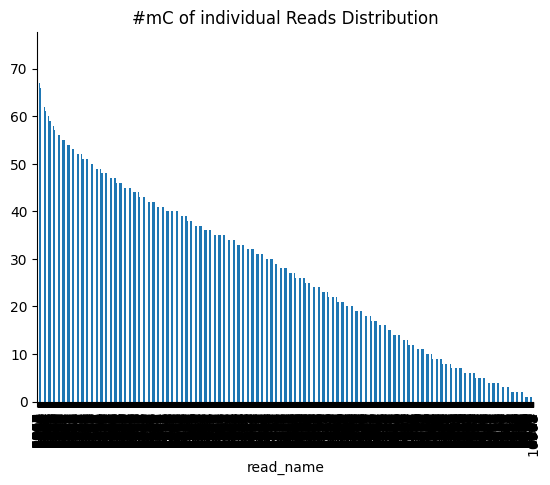

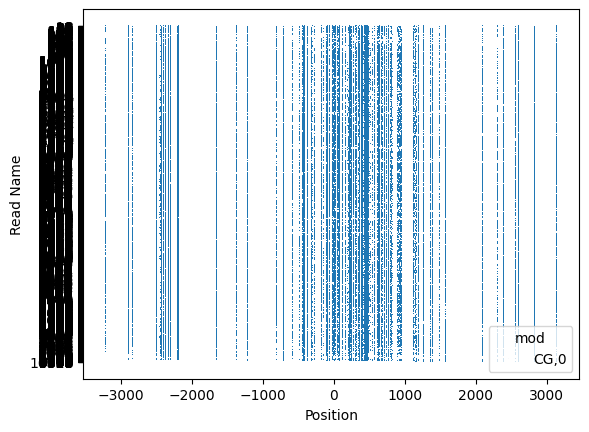

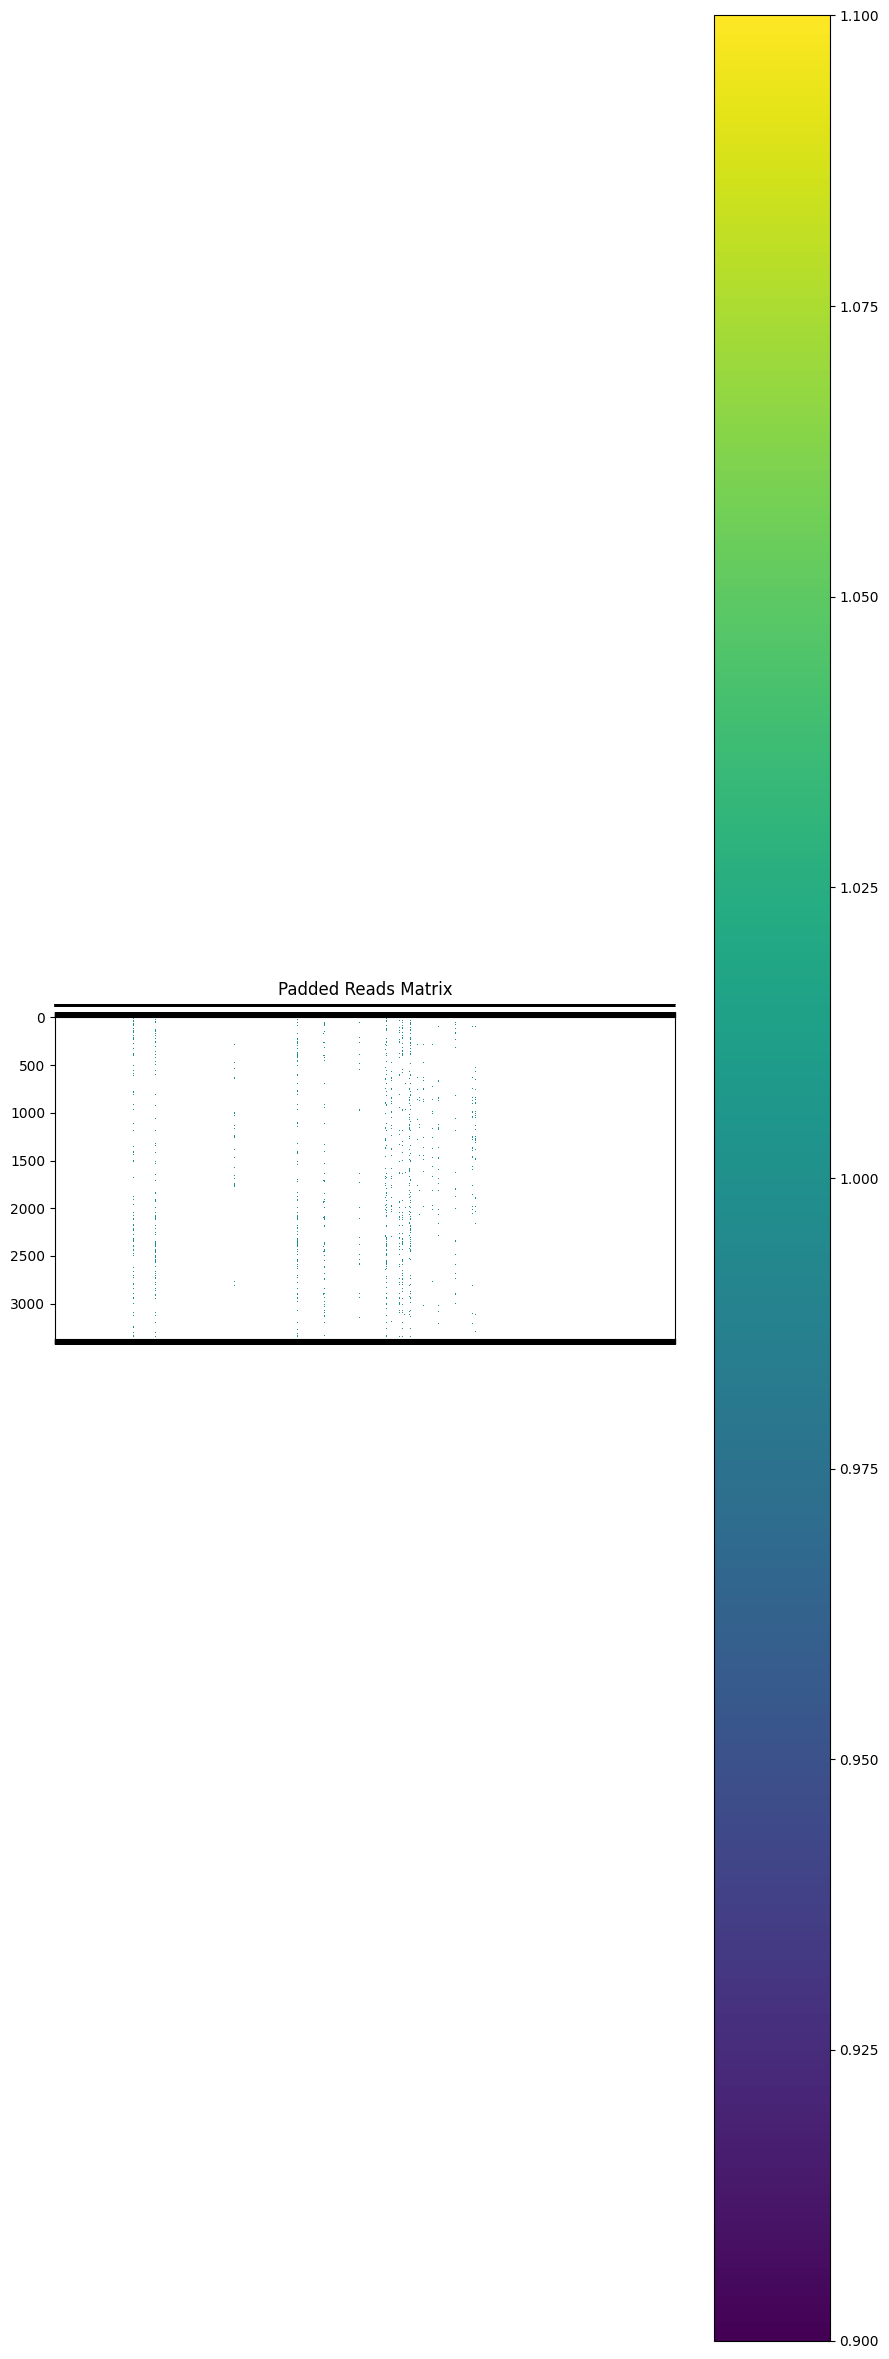

Padded reads saved to padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


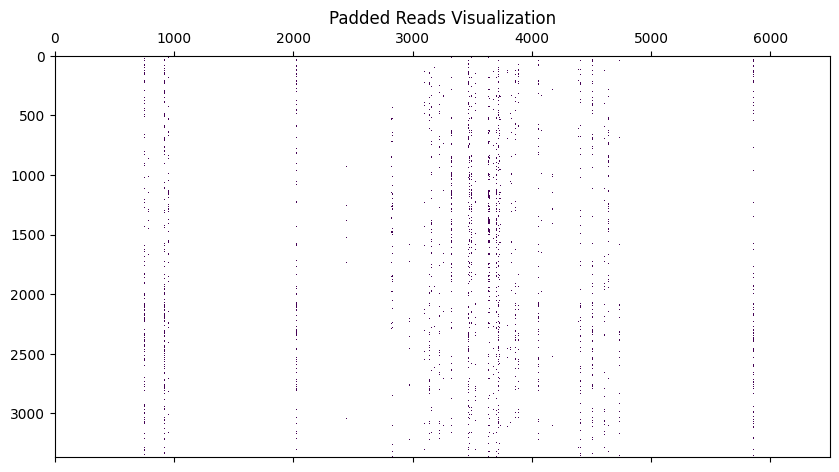

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

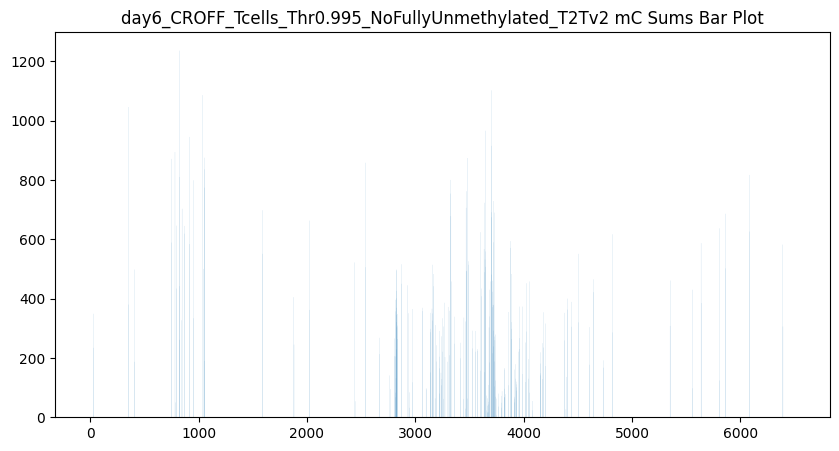

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


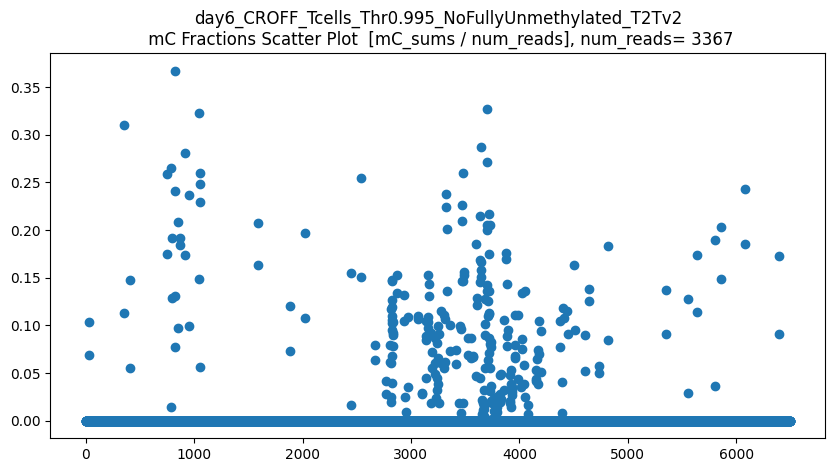

len(CGs_all) = 3367
CGs_all.shape = (3367, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


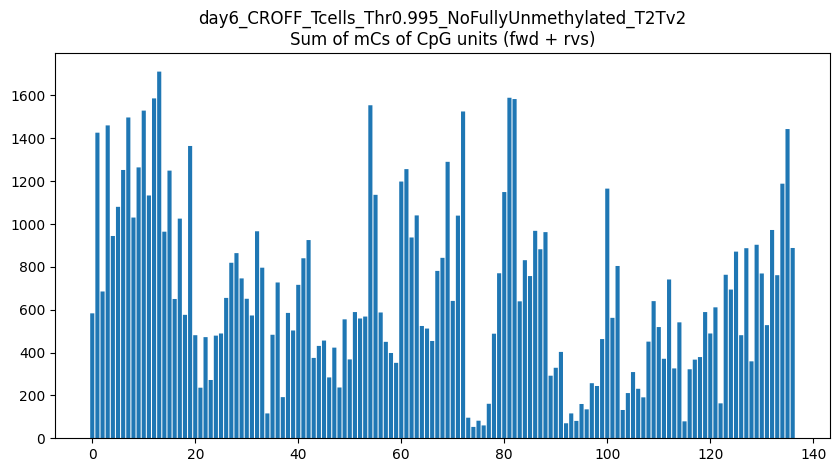

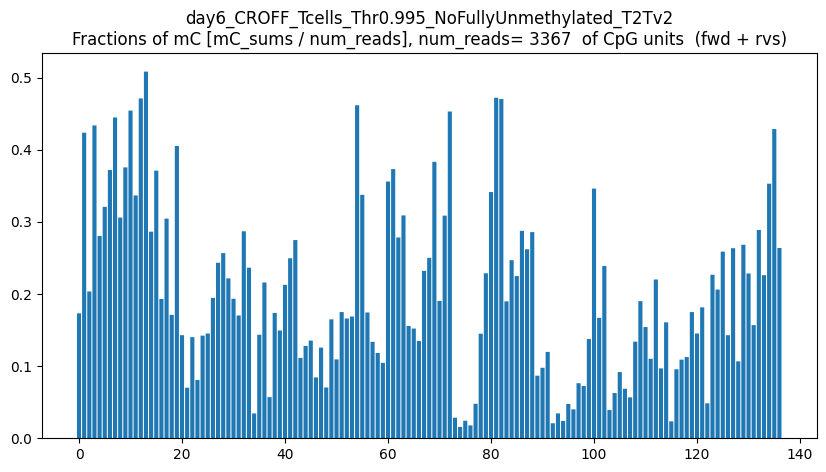

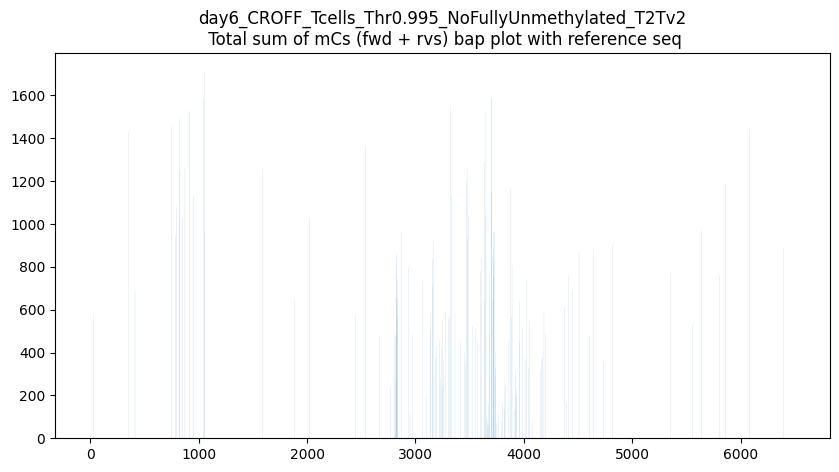

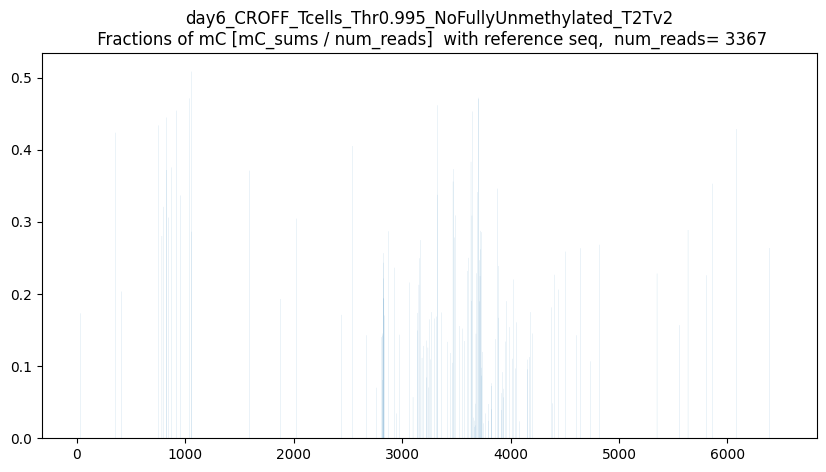

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



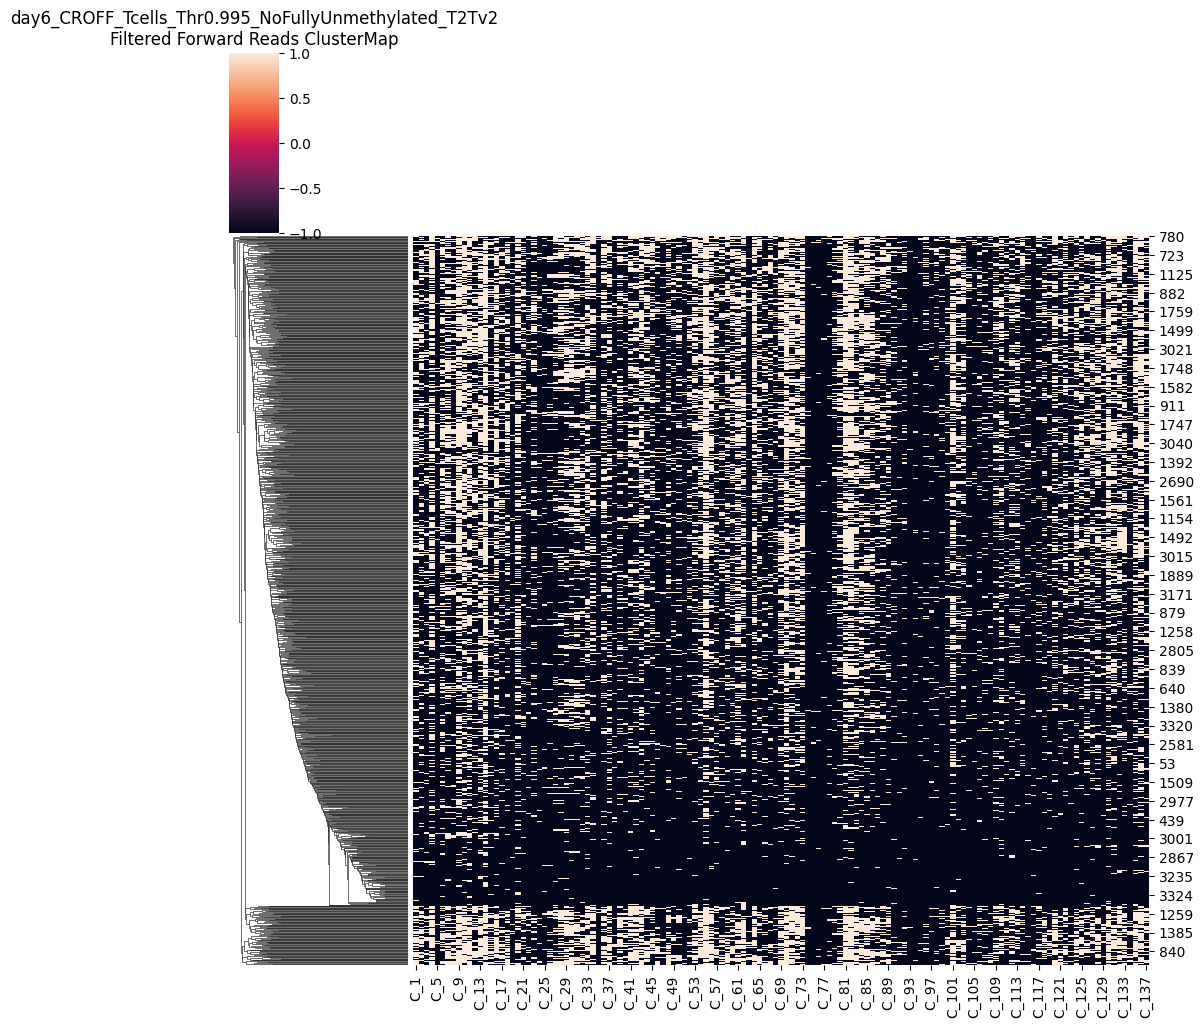

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



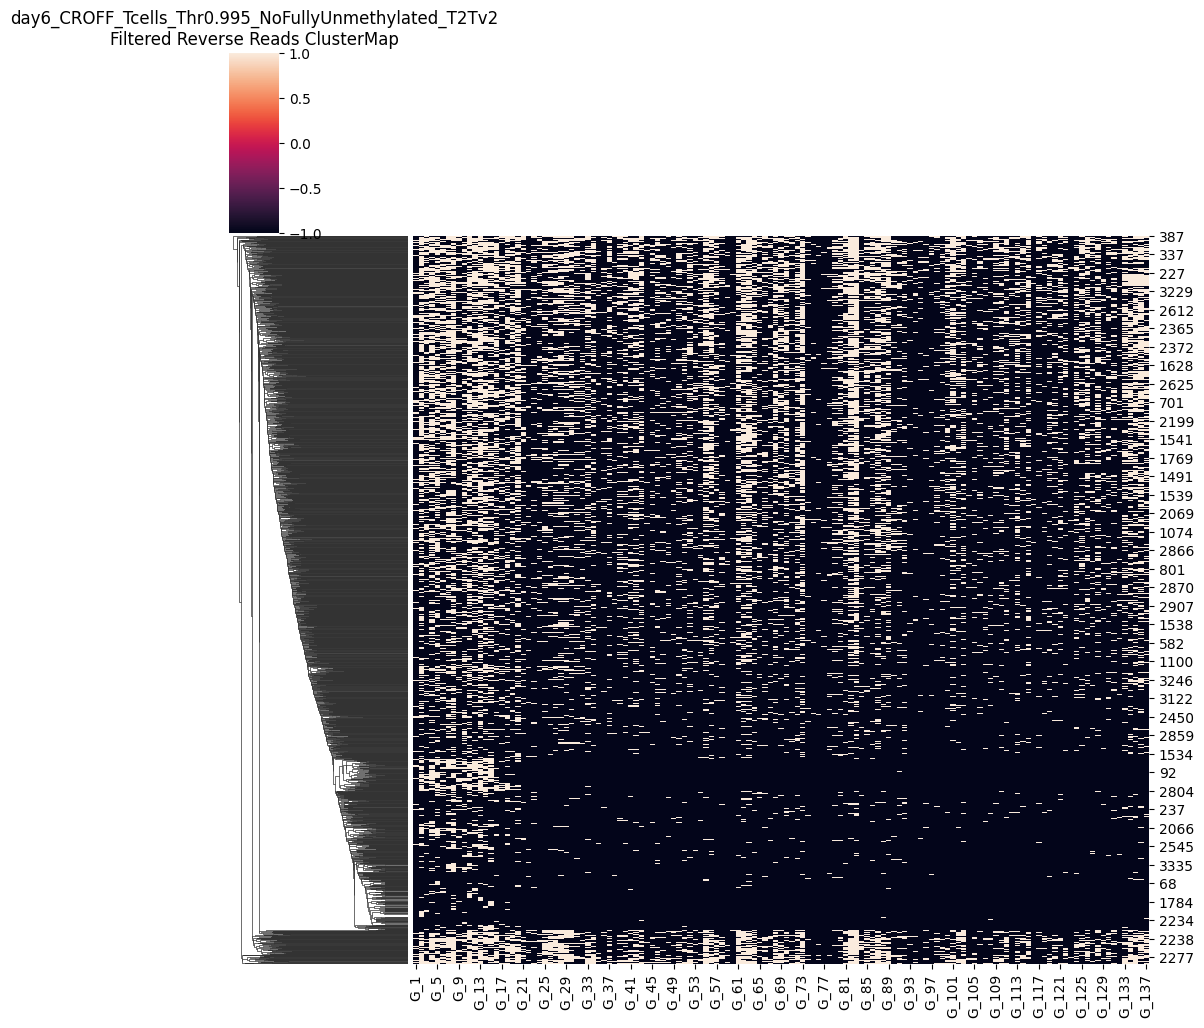

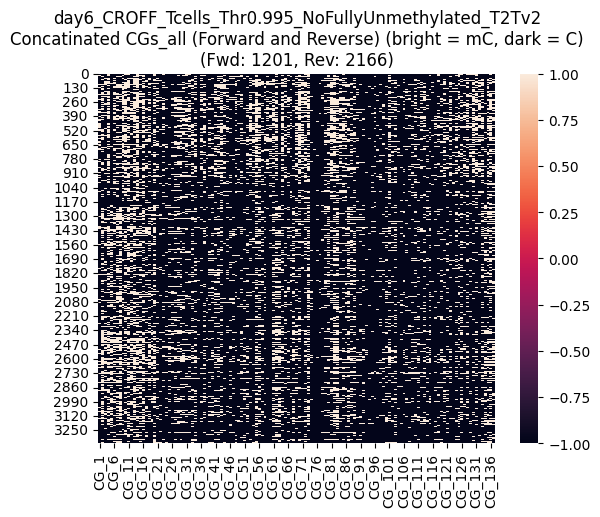

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



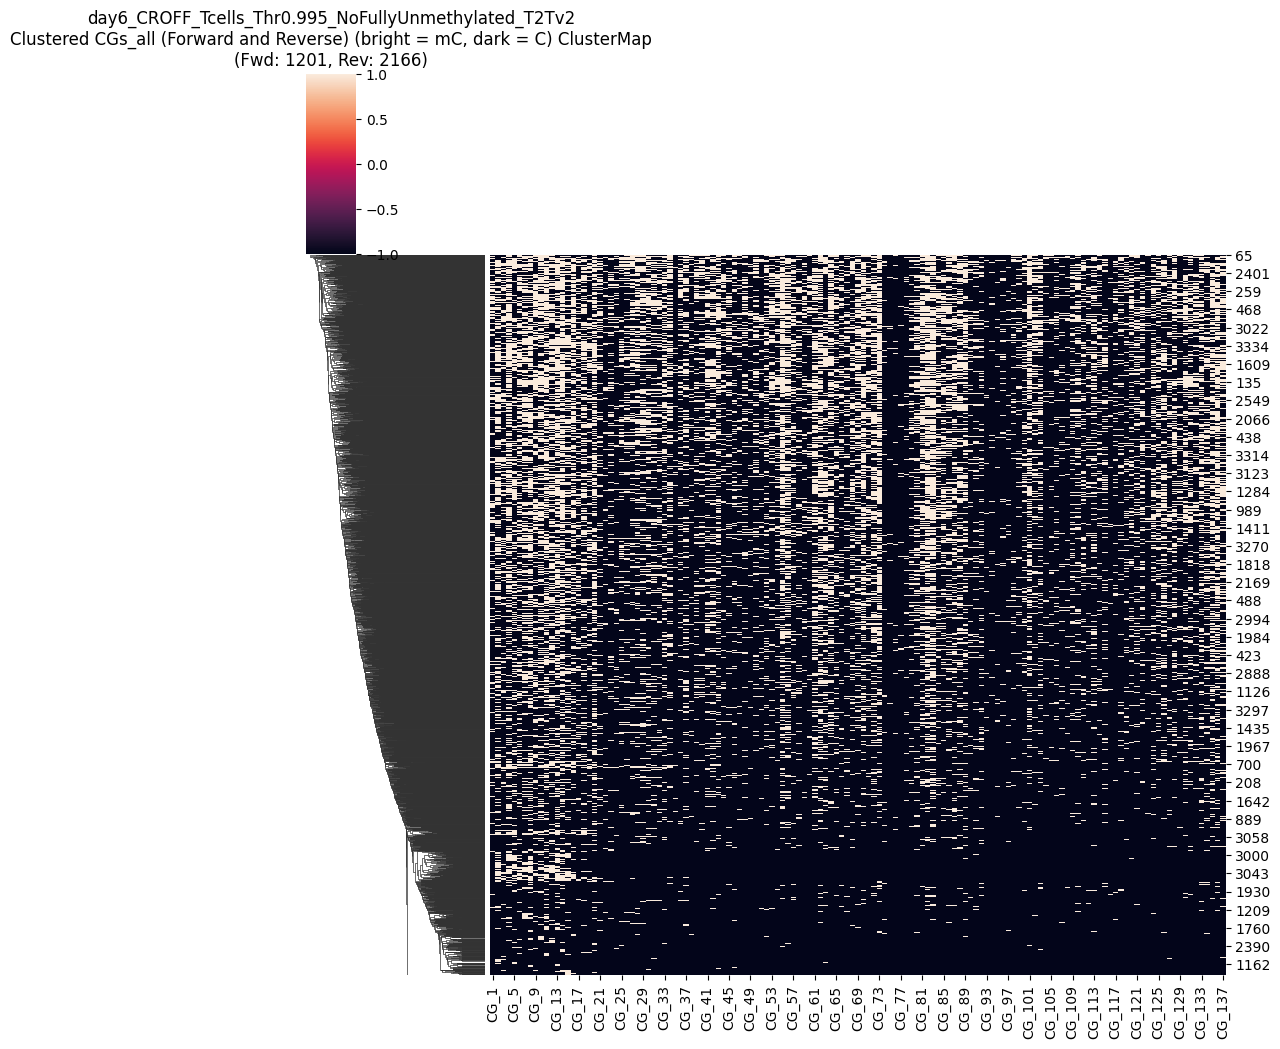

CGs_all saved as CG_137_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD1201_numRVS2166.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   NaN    NaN  ...   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
3      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN    NaN  ...   
4      NaN   1.0   NaN   1.0   NaN   NaN   1.0   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
3362   NaN   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
3363   1.0   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
3364   NaN   1.0   NaN   1.0   NaN   NaN   1.0   1.0   1.0    NaN  ...   
3365   NaN   1.0   1.0   NaN   1.0   1.0   NaN   1.0   NaN    NaN  ...   
3366   NaN   NaN   NaN   1.0   NaN   NaN   1.0   1.0   NaN    NaN  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
2        NaN     NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN   
3        NaN     NaN     1.0     NaN     1.0     1.0     NaN     NaN     NaN   
4        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3362     NaN     1.0     NaN     NaN     NaN     NaN     NaN     1.0     1.0   
3363     1.0     NaN     NaN     NaN     NaN     1.0     1.0     NaN     NaN   
3364     1.0     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
3365     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3366     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      CG_137  
0        1.0  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
3362     NaN  
3363     1.0  
3364     NaN  
3365     NaN  
3366     NaN  

[3367 rows x 137 columns]

In [42]:
keep_full_coverage_reads_only=True
if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
# Processing and visualizing CpG units on forward and reverse strands 
try:

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


CGs_all_silenced_original = CGs_all
CGs_all_silenced_original

# Remove lower than 80% * mean(#mC) methylated reads

Mean methylated CGs per read: 28.0
Maximum methylated CGs per read: 74.0
Threshold (80% of max): 22.40
Original number of reads: 3367
Number of reads after filtering: 1975
Removed 1392 reads


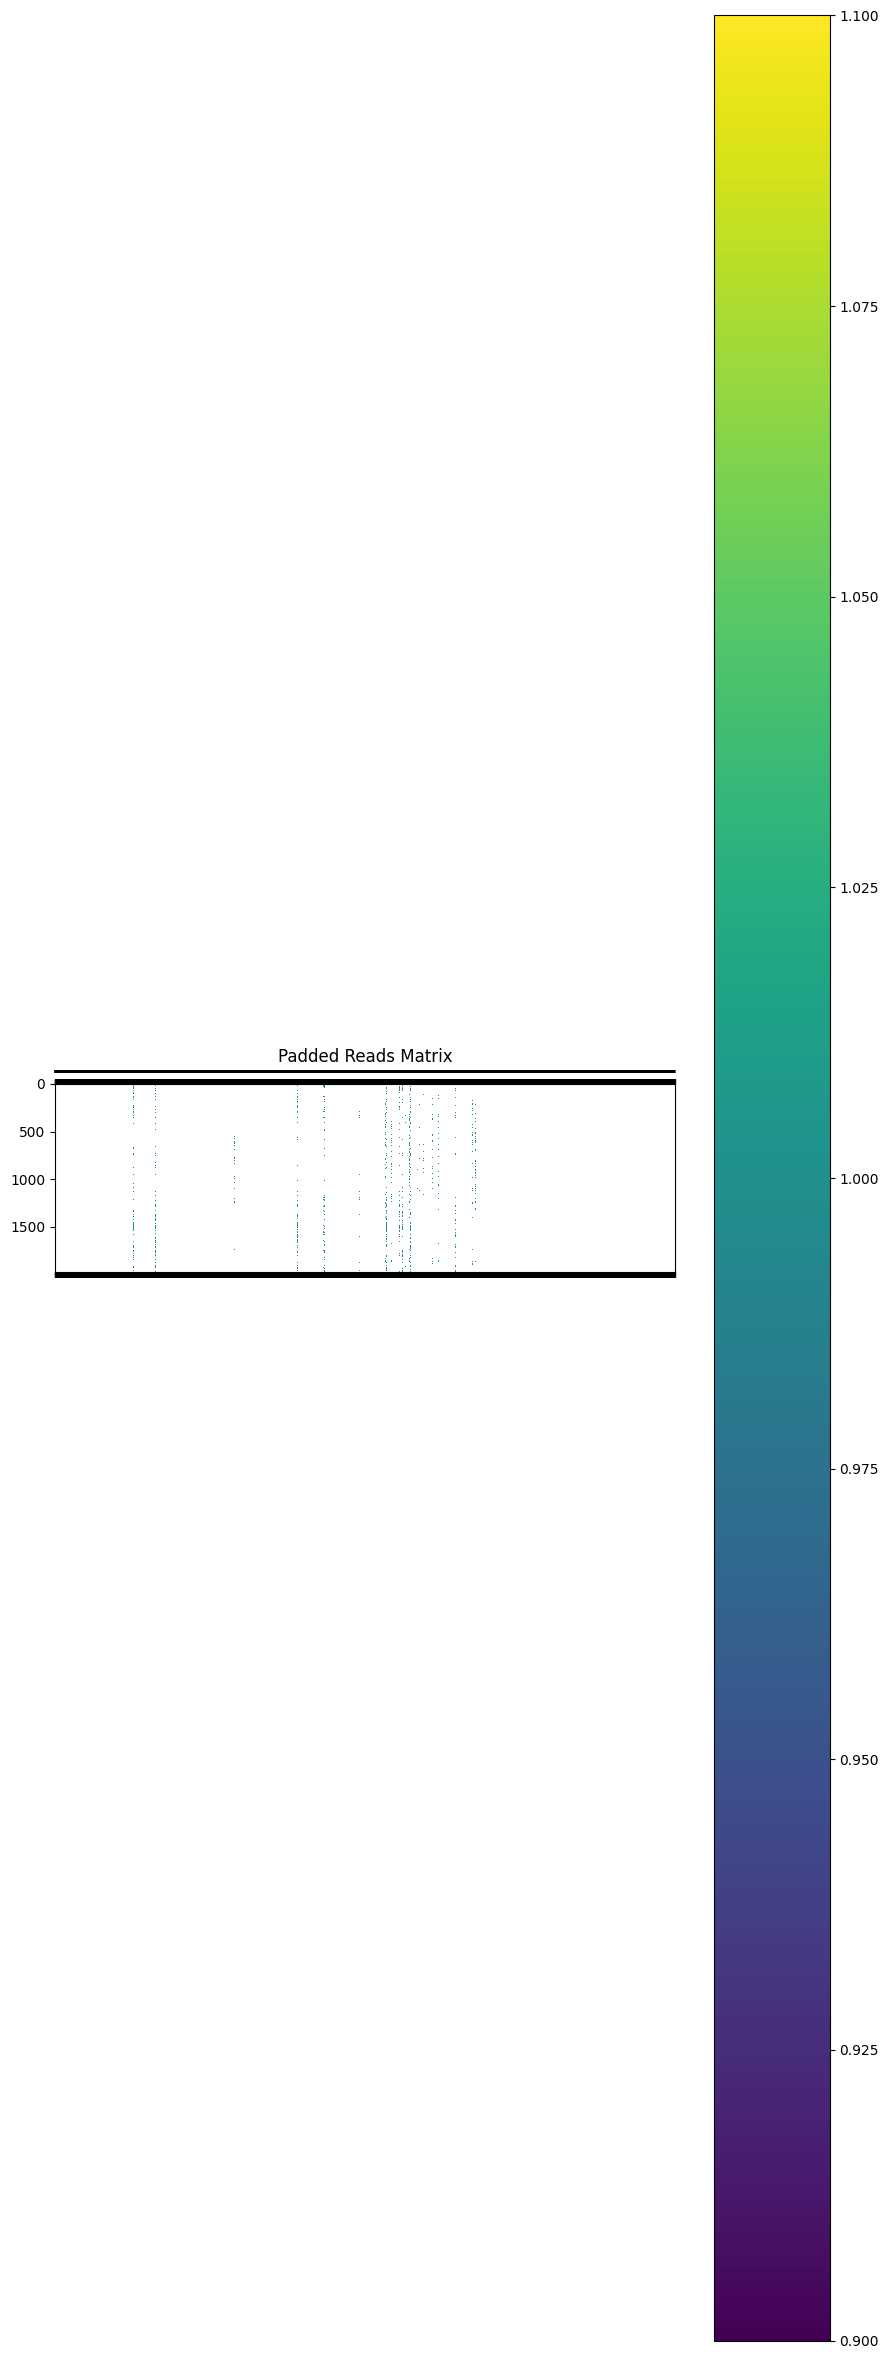

Padded reads saved to removed_low80_methylated_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


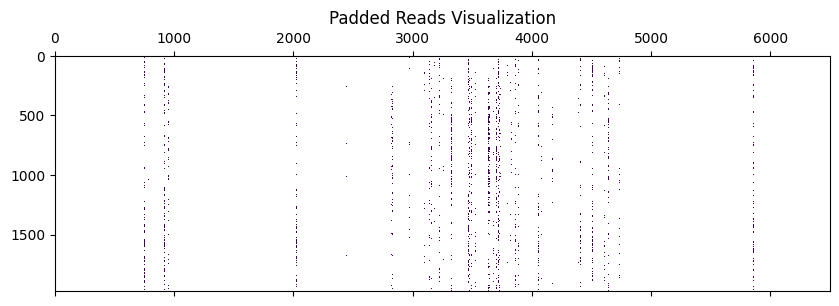

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

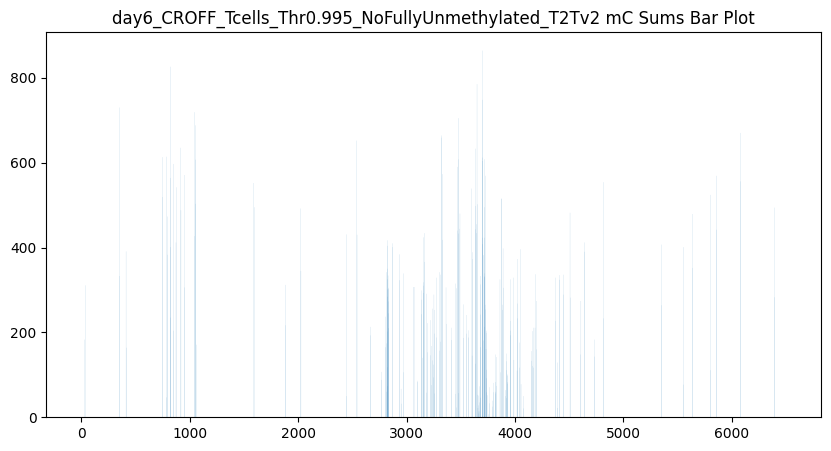

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


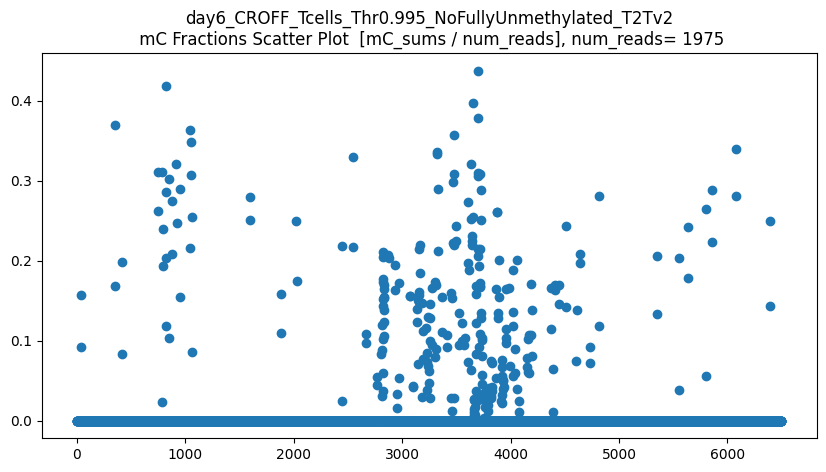

len(CGs_all) = 1975
CGs_all.shape = (1975, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


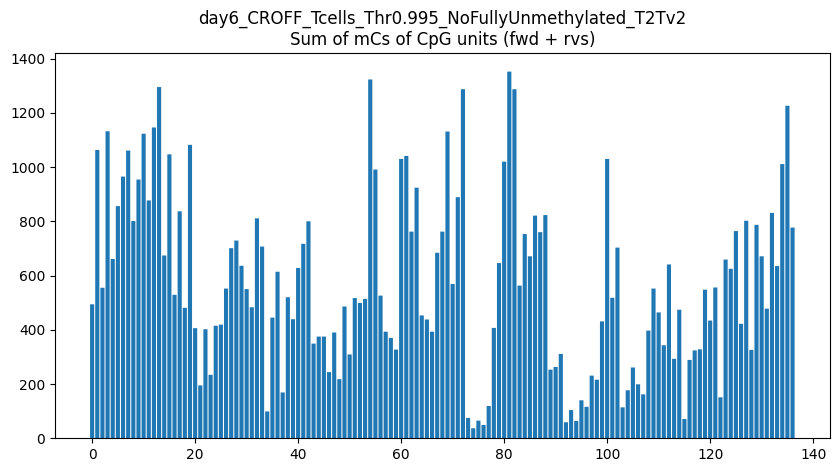

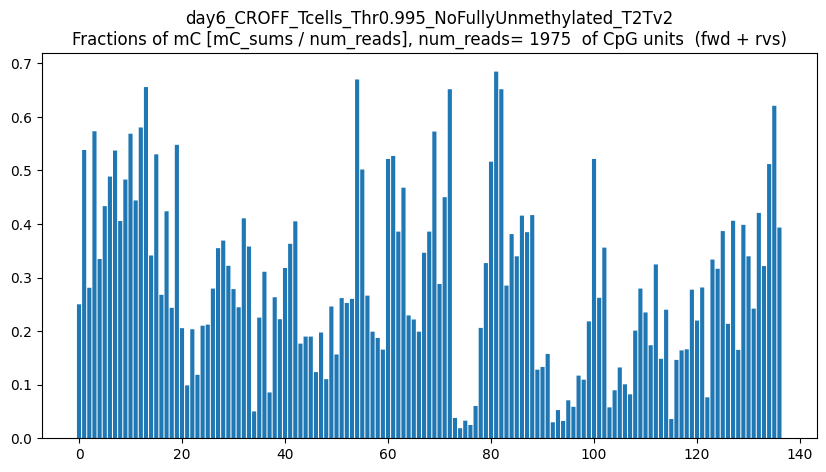

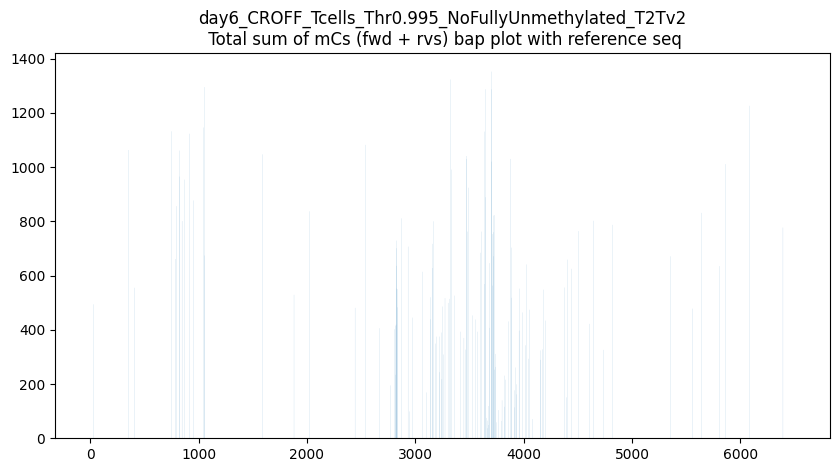

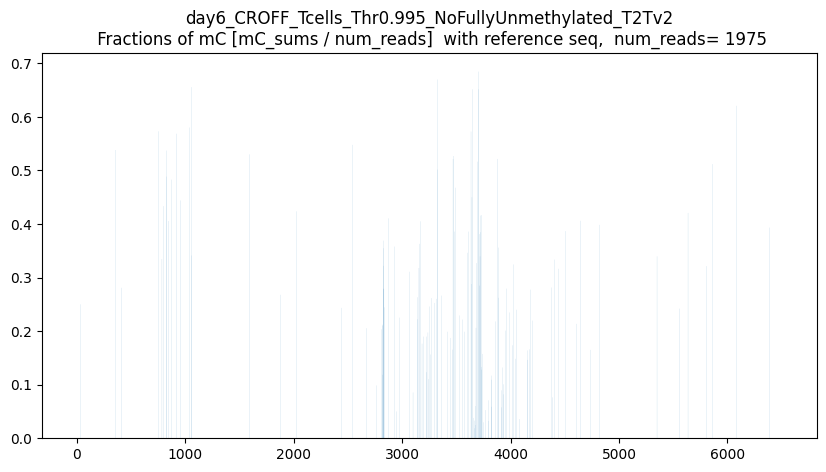

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



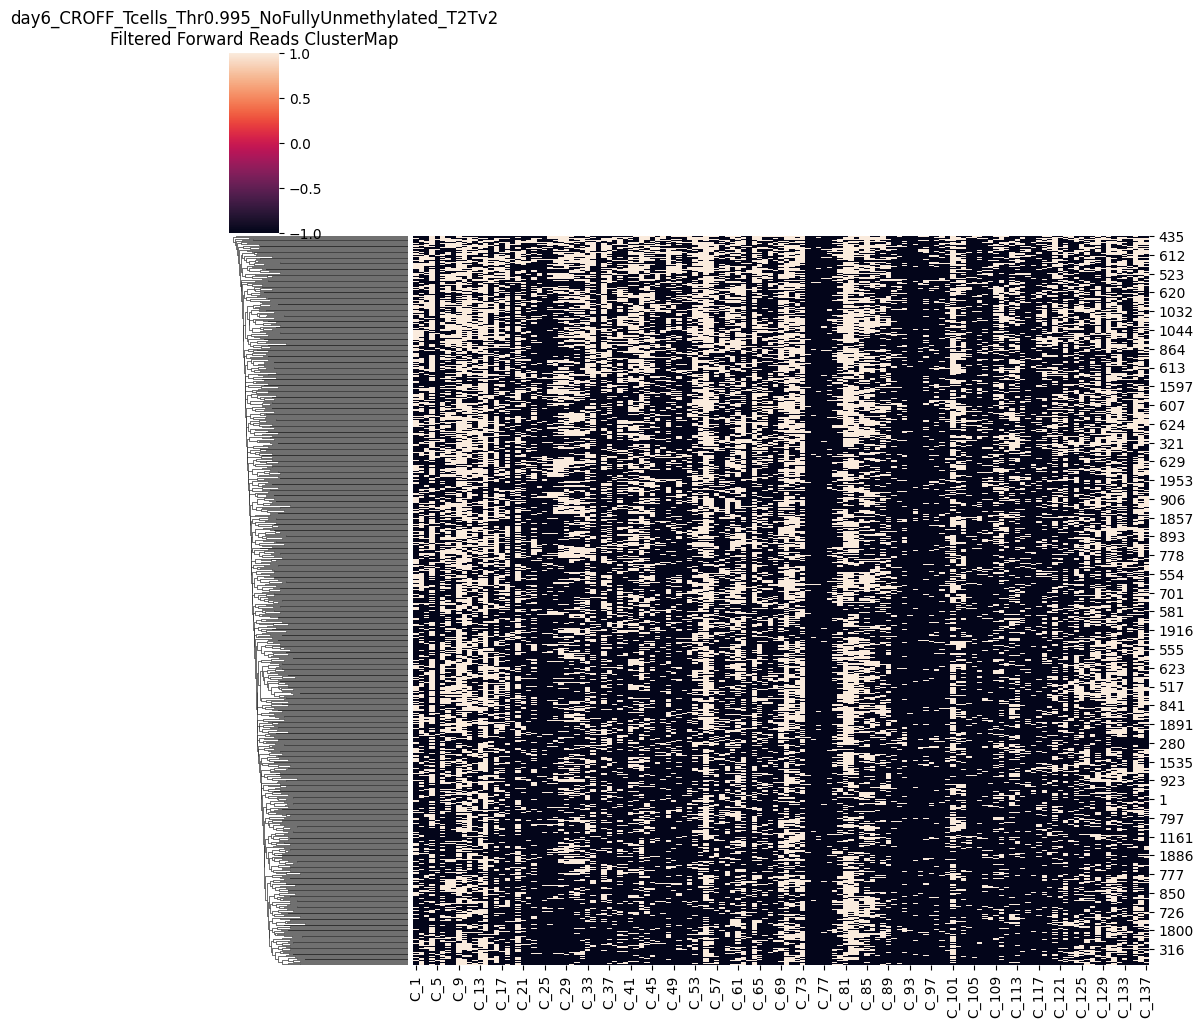

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



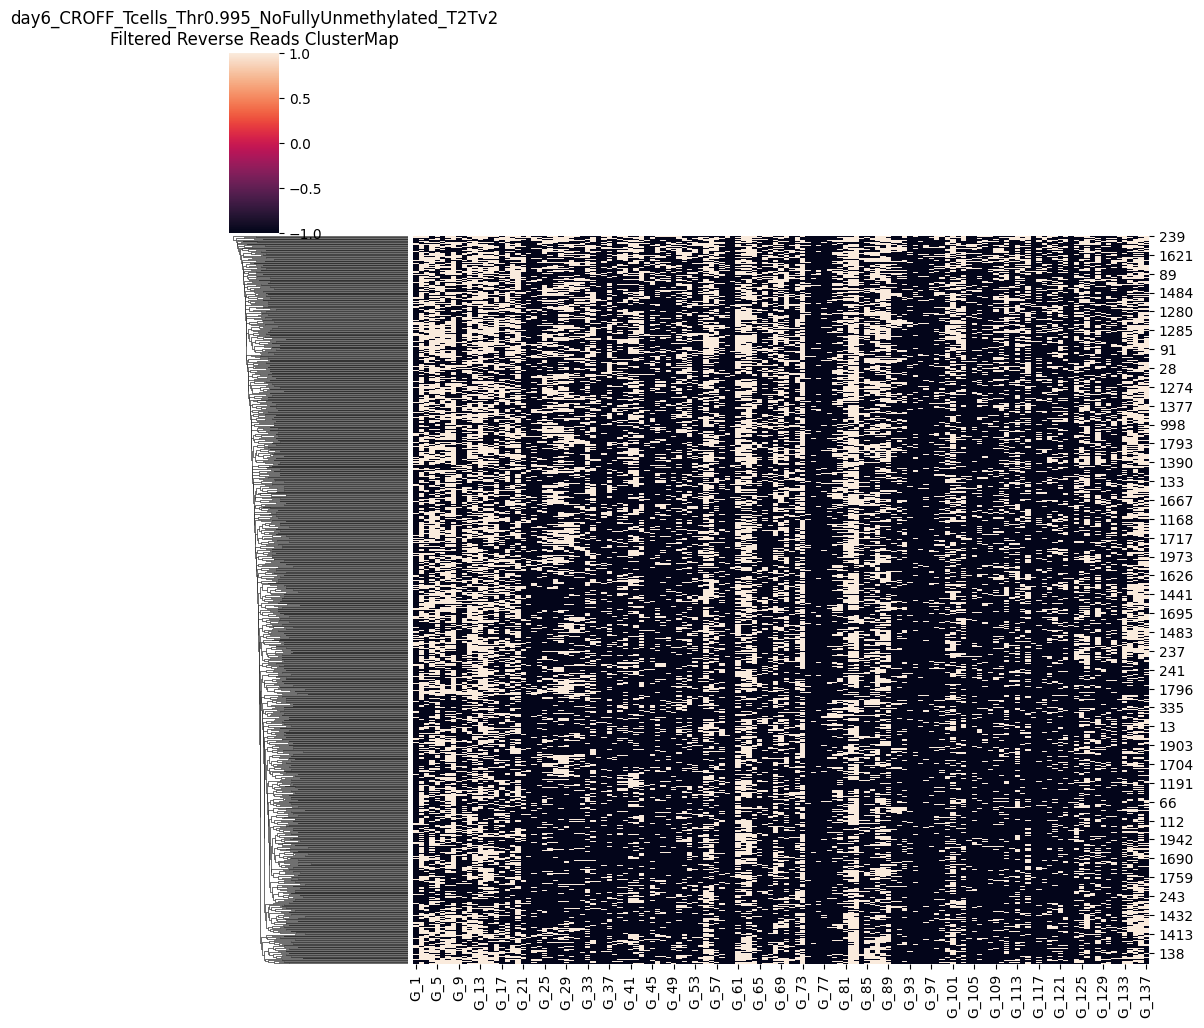

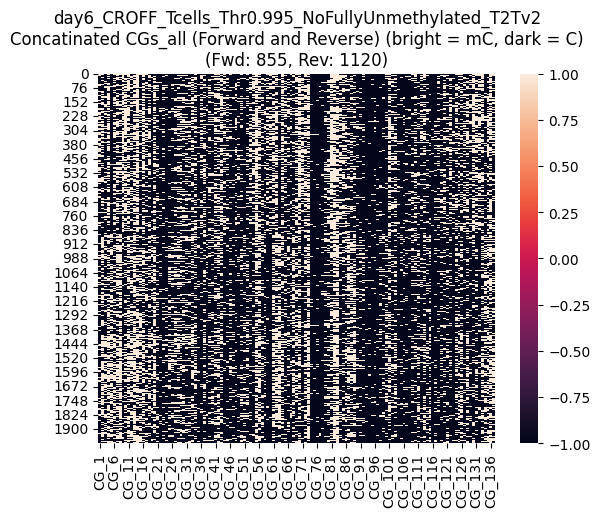

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



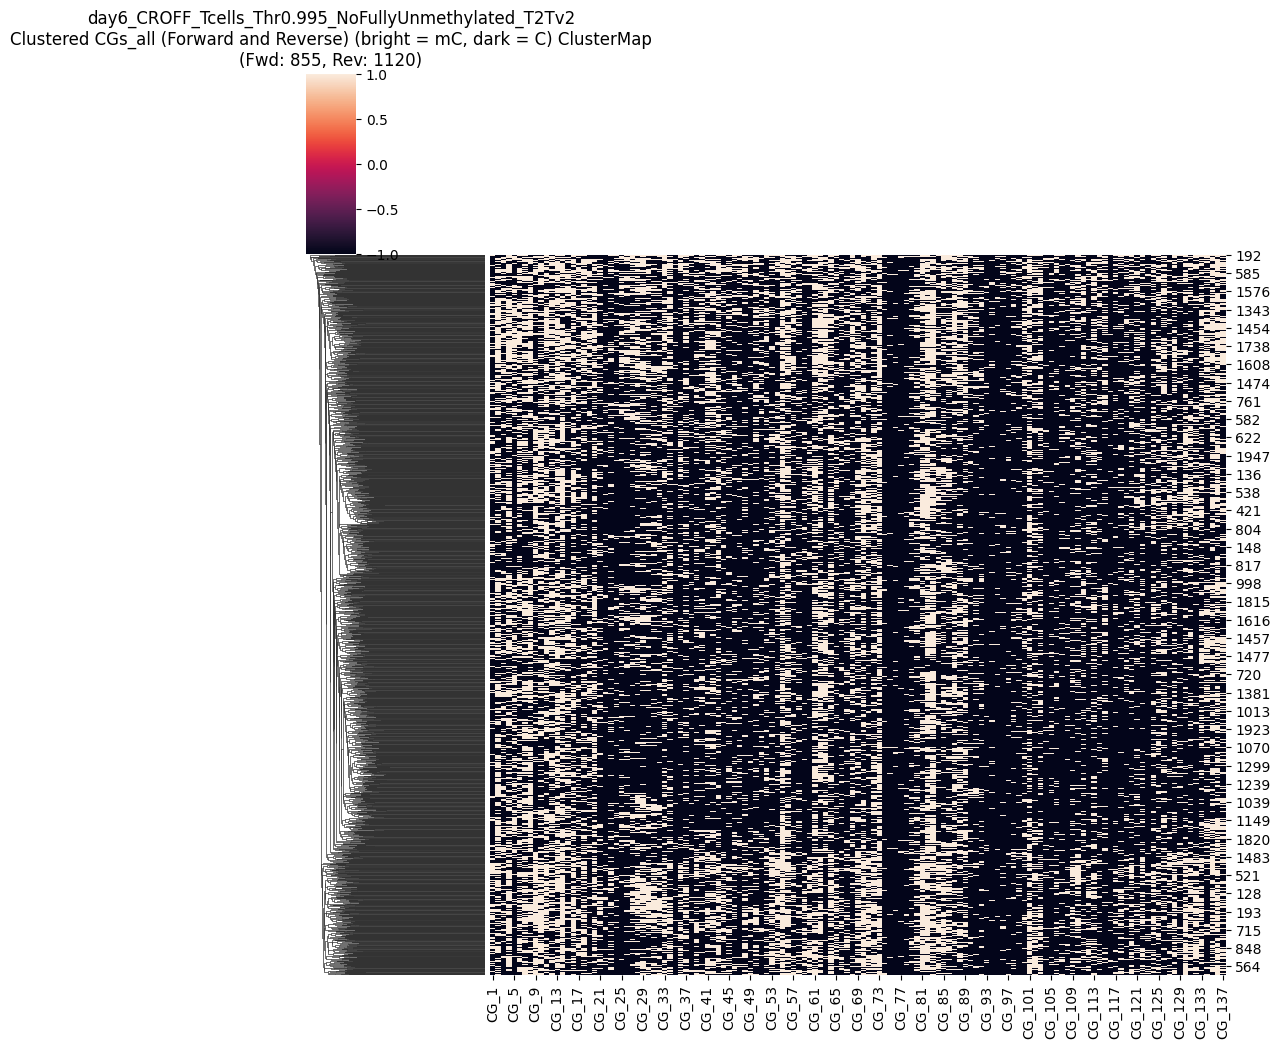

CGs_all saved as CG_137_removed_low80_methylated_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD855_numRVS1120.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [33]:
threshold_percent = 80
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_silenced_remove_low80 = CGs_all
CGs_all_silenced_remove_low80

# Remove lower than 70% * mean(#mC) methylated reads

Mean methylated CGs per read: 28.0
Maximum methylated CGs per read: 74.0
Threshold (70% of max): 19.60
Original number of reads: 3367
Number of reads after filtering: 2143
Removed 1224 reads


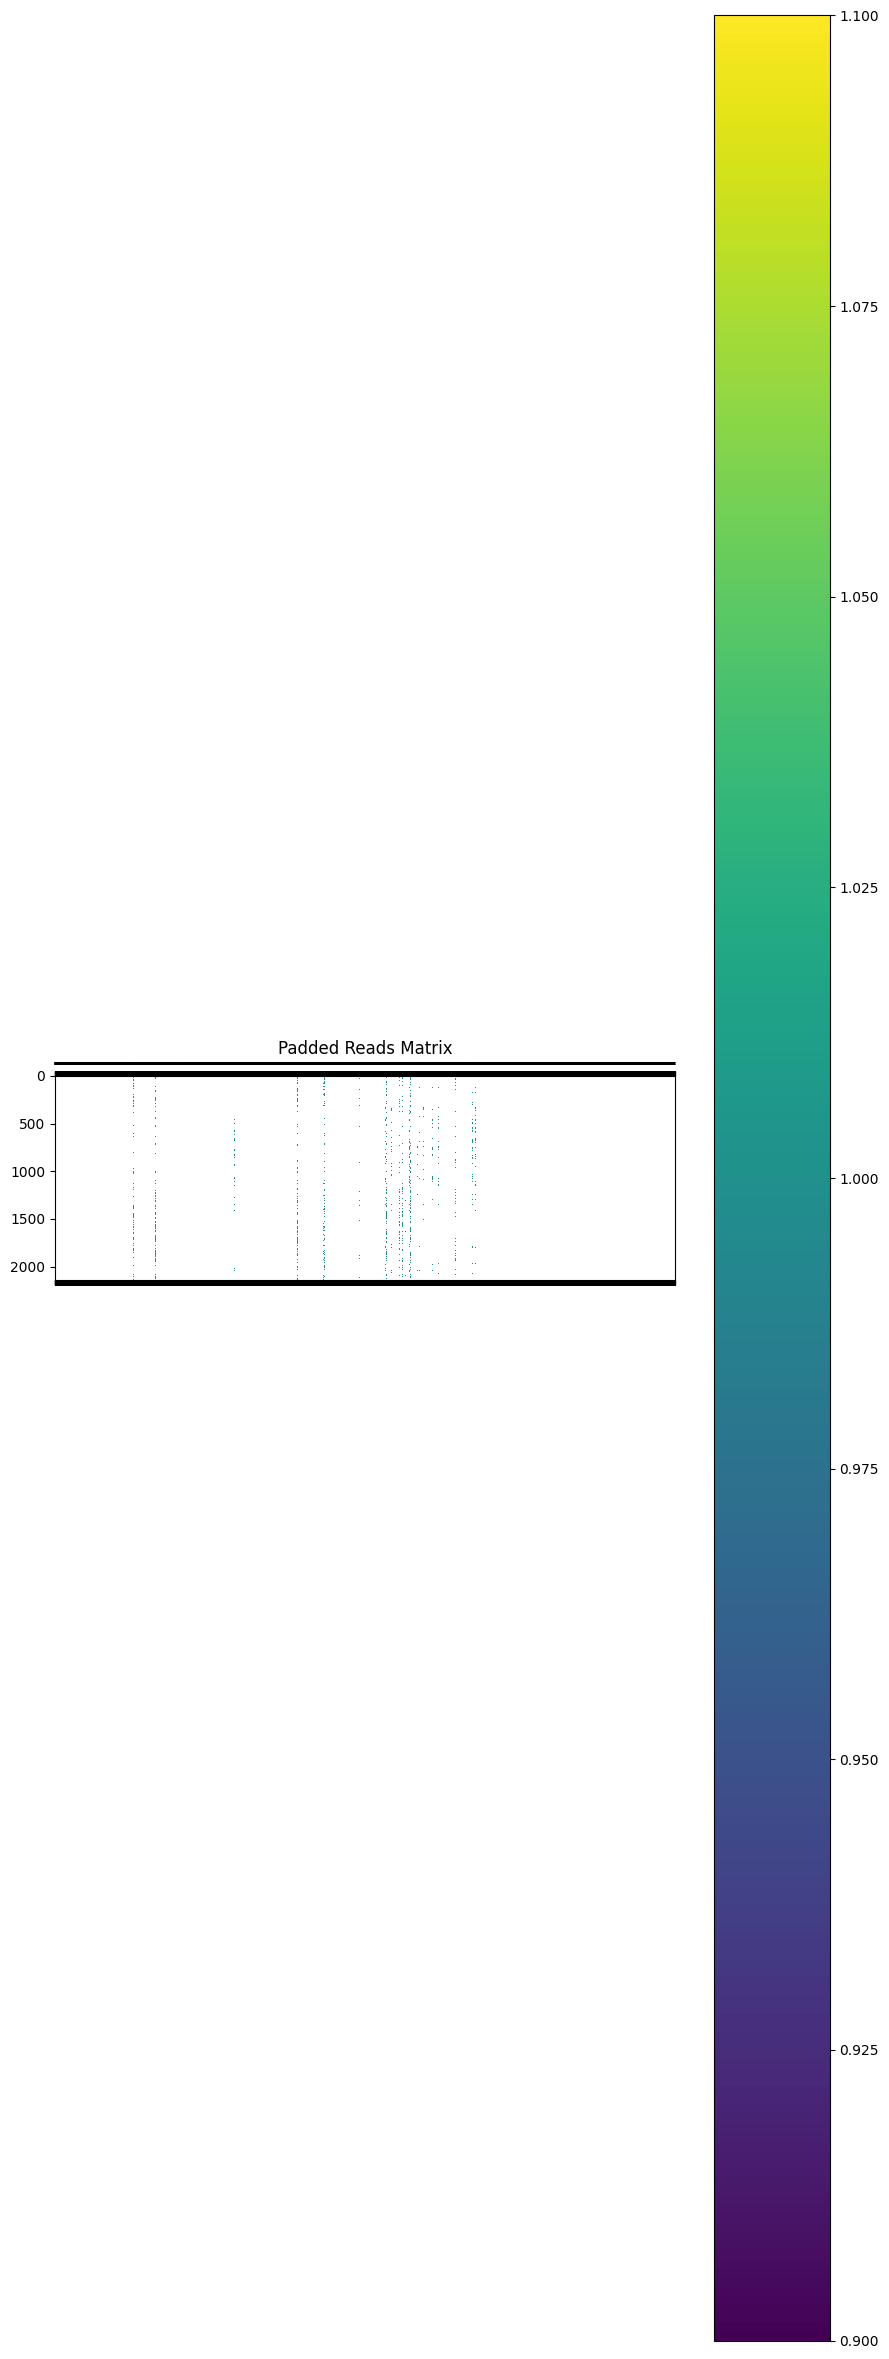

Padded reads saved to removed_low70_methylated_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


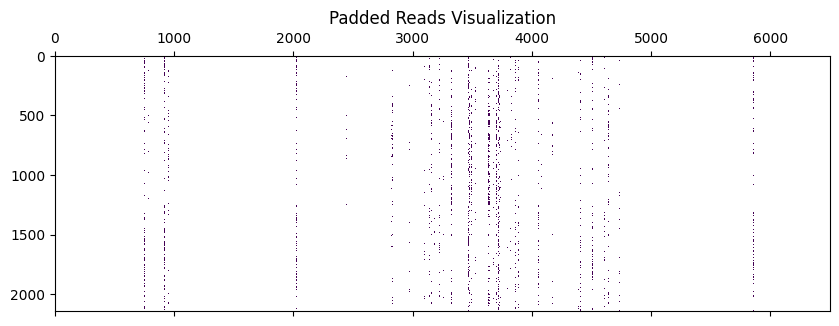

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

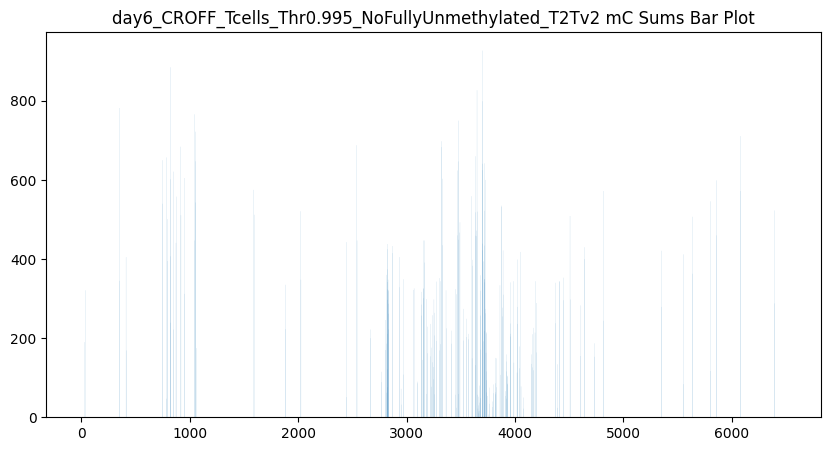

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


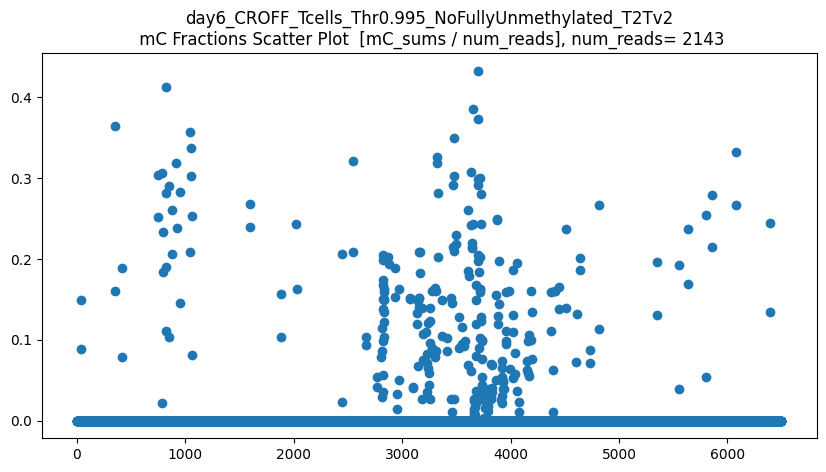

len(CGs_all) = 2143
CGs_all.shape = (2143, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


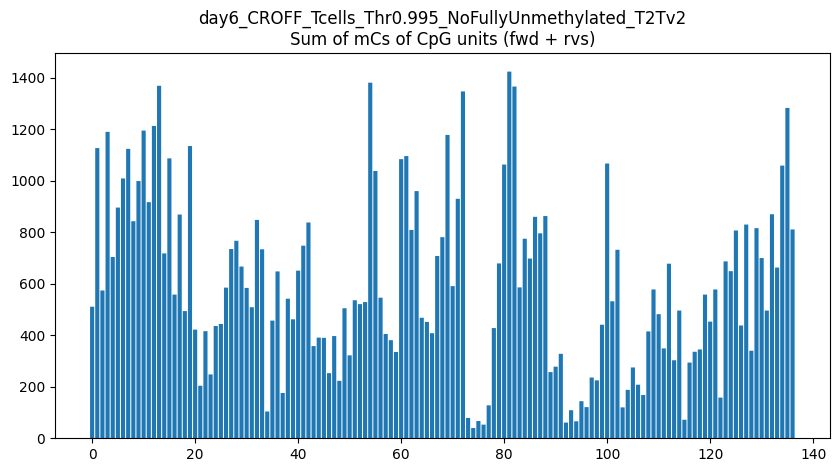

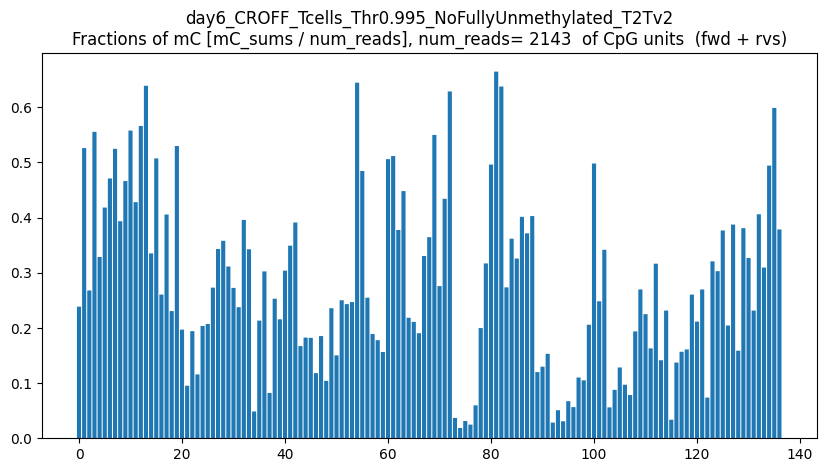

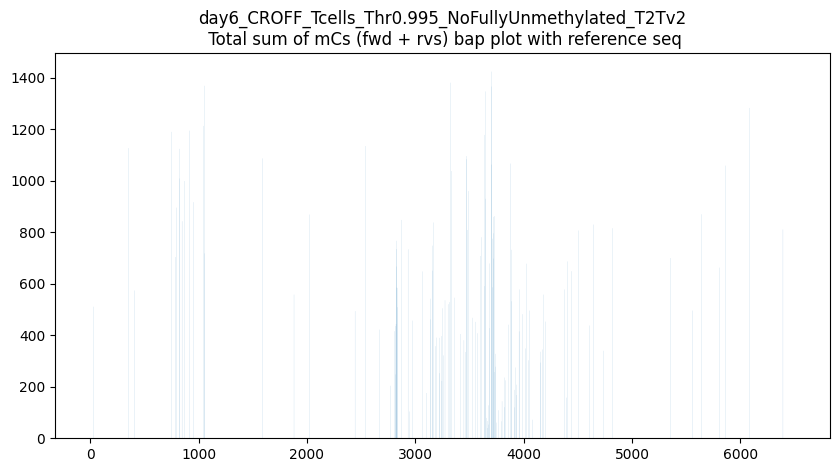

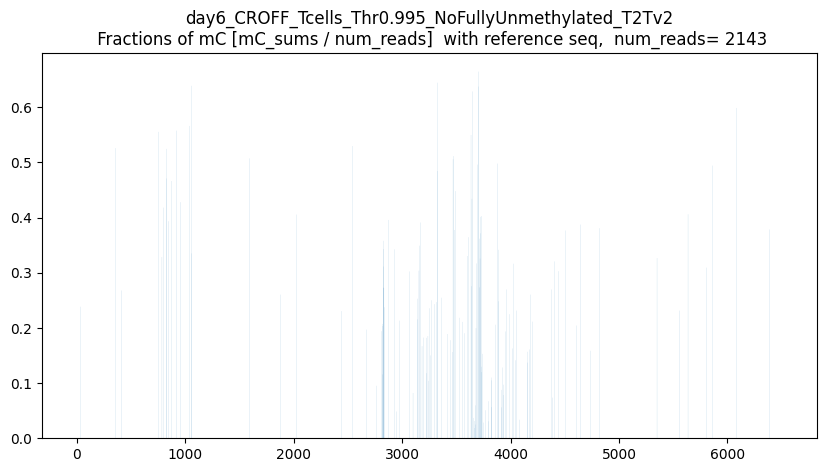

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



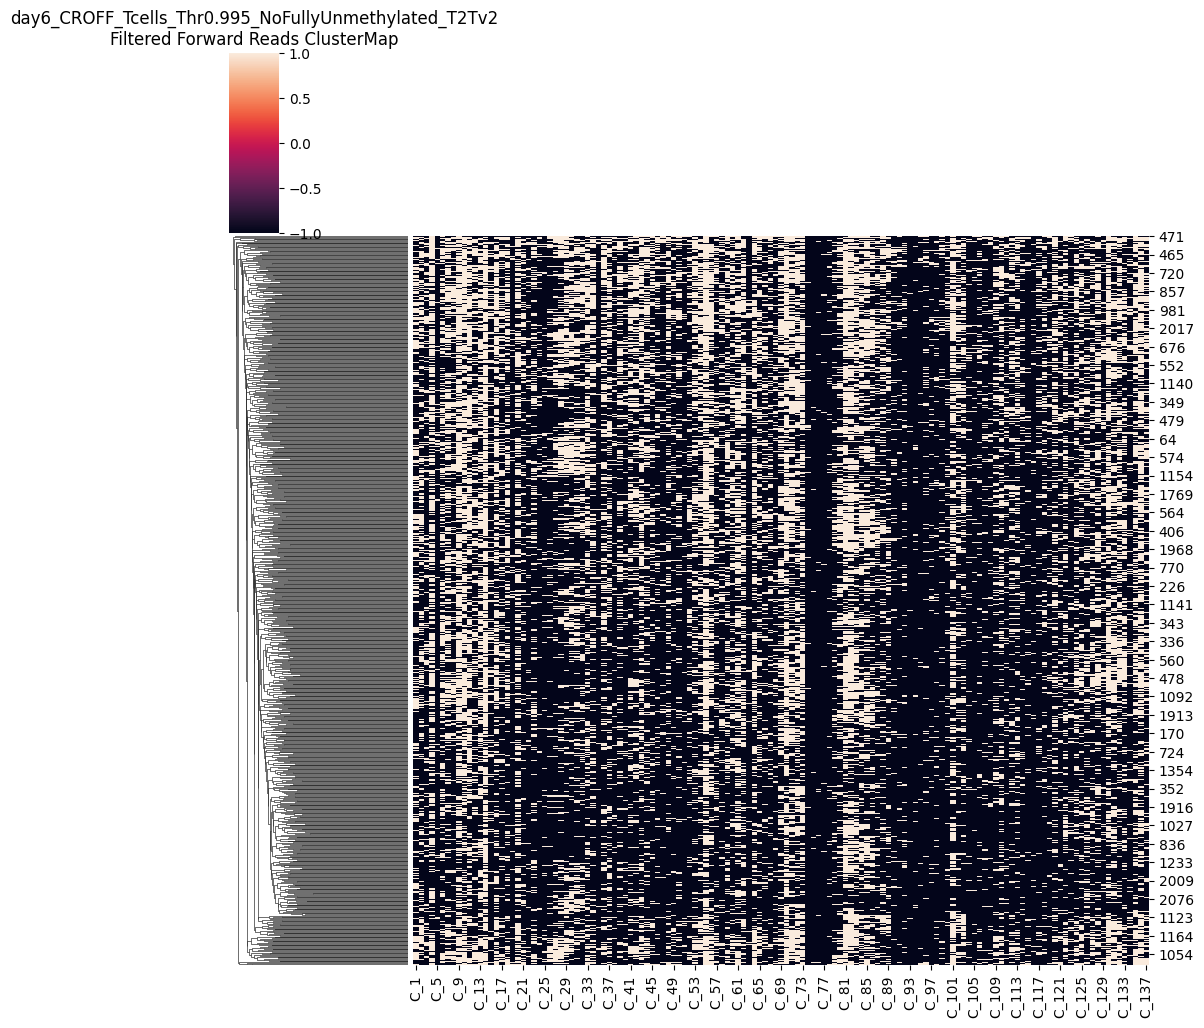

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



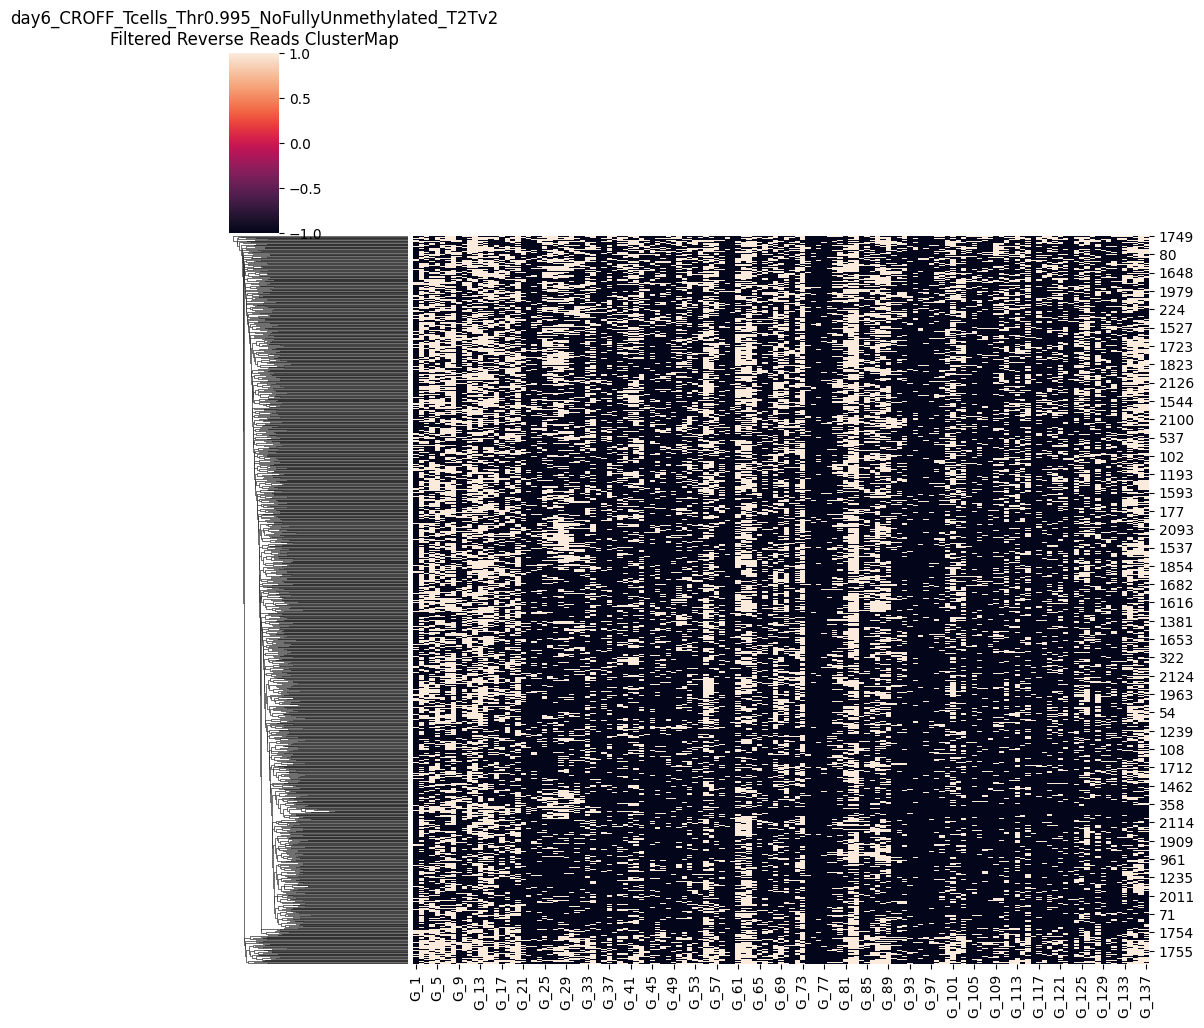

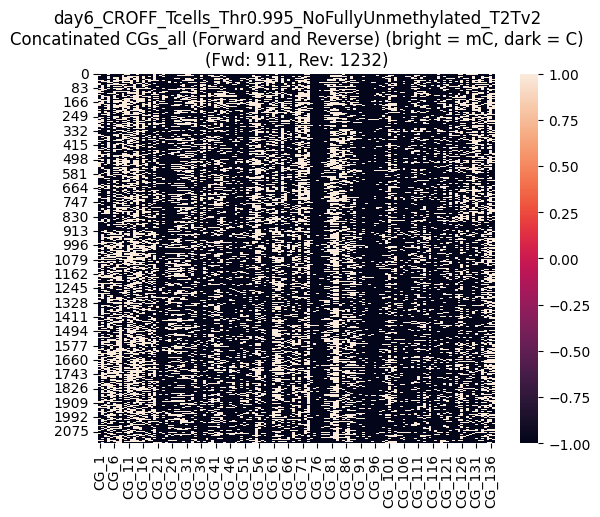

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



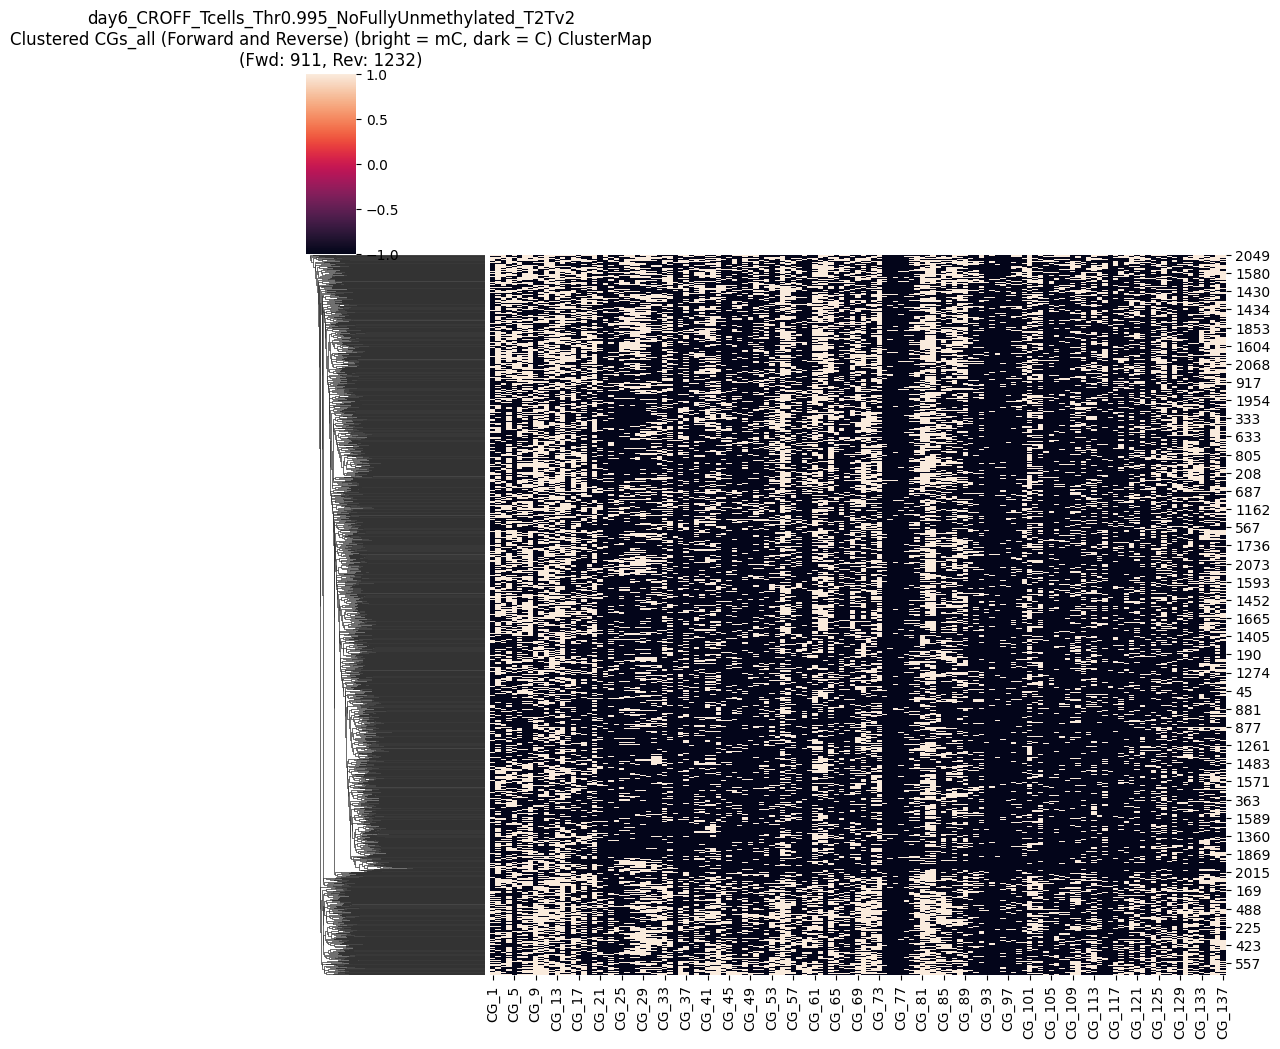

CGs_all saved as CG_137_removed_low70_methylated_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD911_numRVS1232.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [29]:
threshold_percent = 70
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [31]:
# Remove lower than 50% * mean(#mC) methylated reads

Mean methylated CGs per read: 28.0
Maximum methylated CGs per read: 74.0
Threshold (50% of max): 14.00
Original number of reads: 3367
Number of reads after filtering: 2461
Removed 906 reads


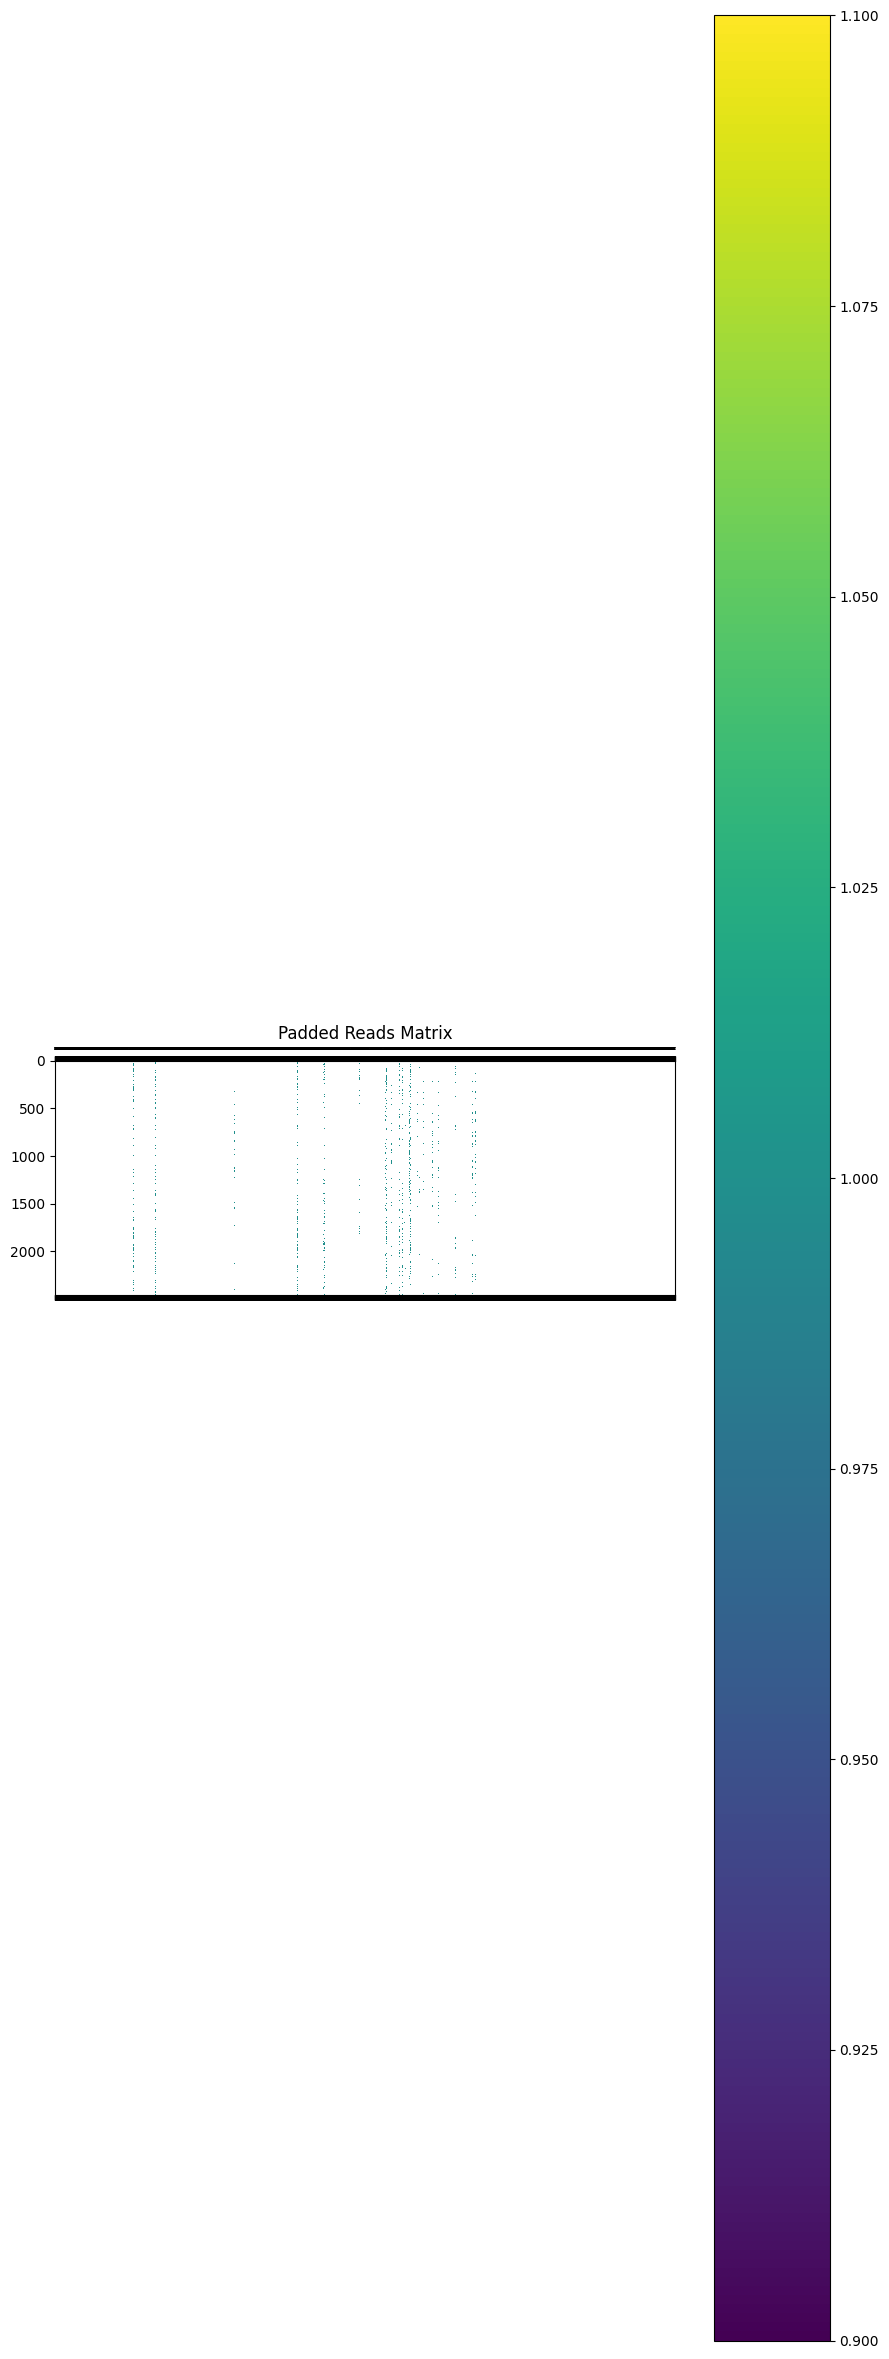

Padded reads saved to removed_low50_methylated_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03.npy
Padded reads loaded successfully.


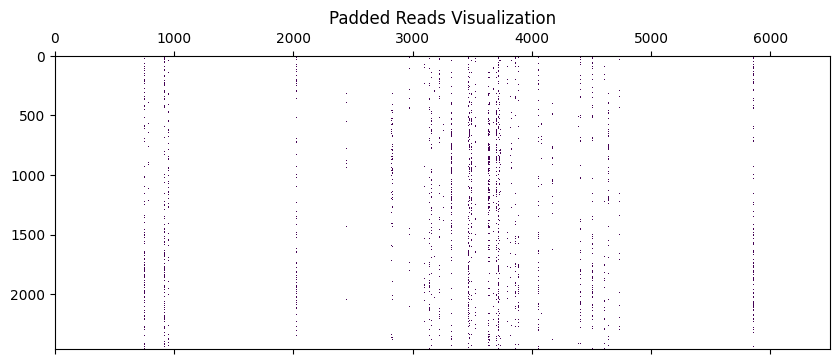

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

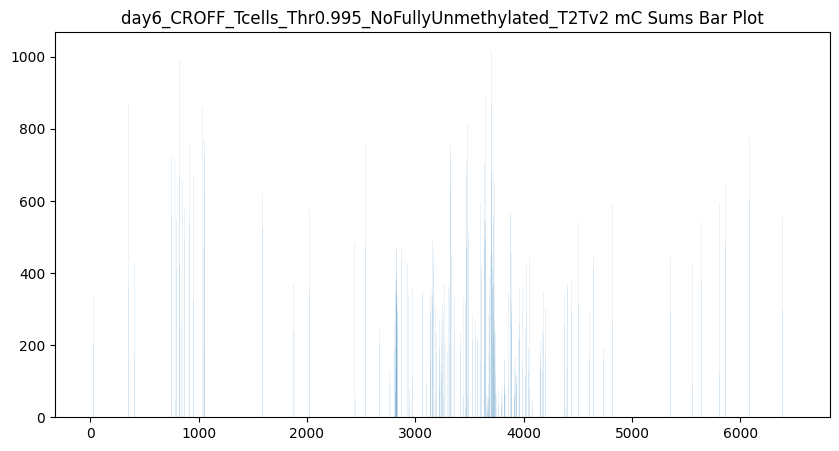

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


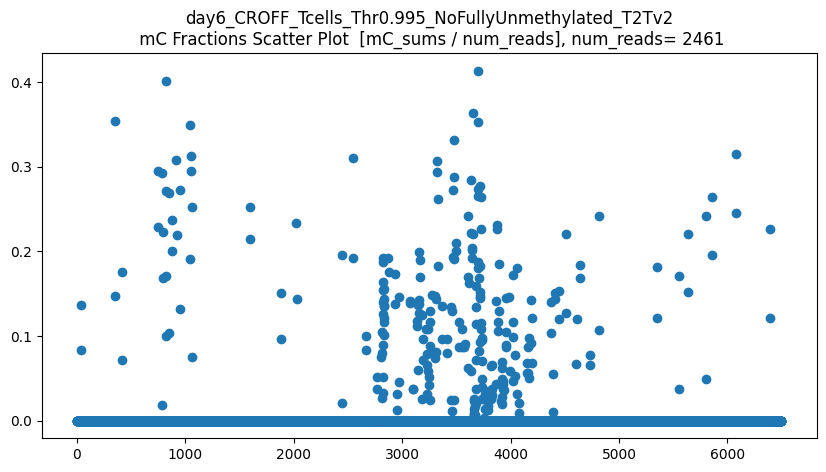

len(CGs_all) = 2461
CGs_all.shape = (2461, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


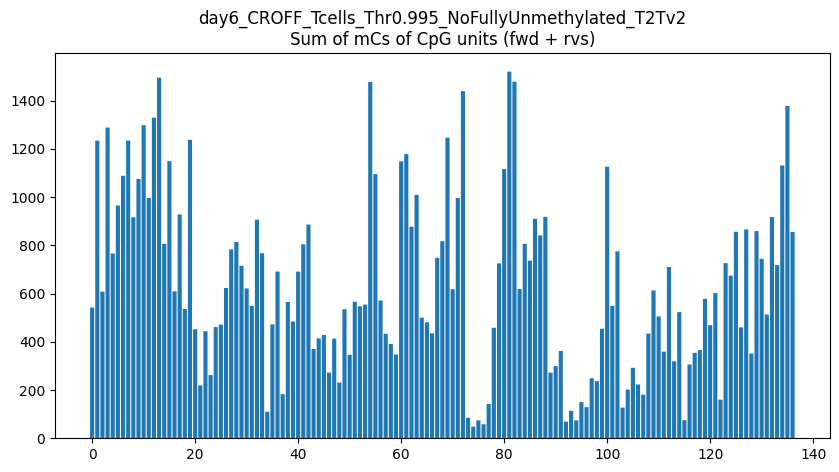

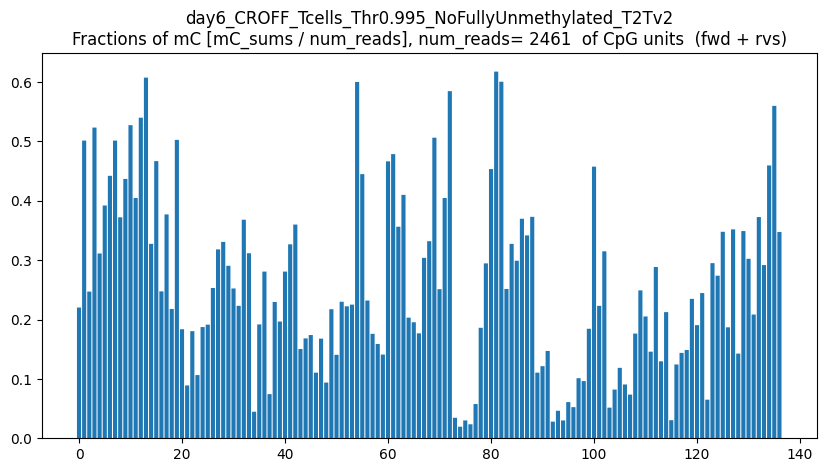

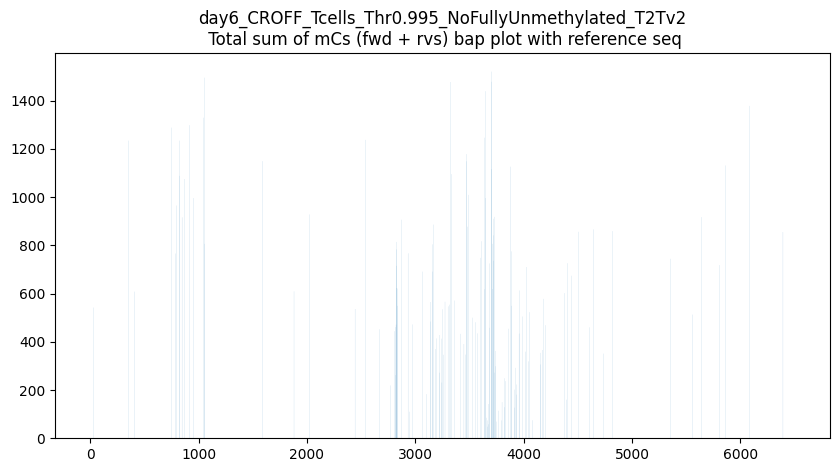

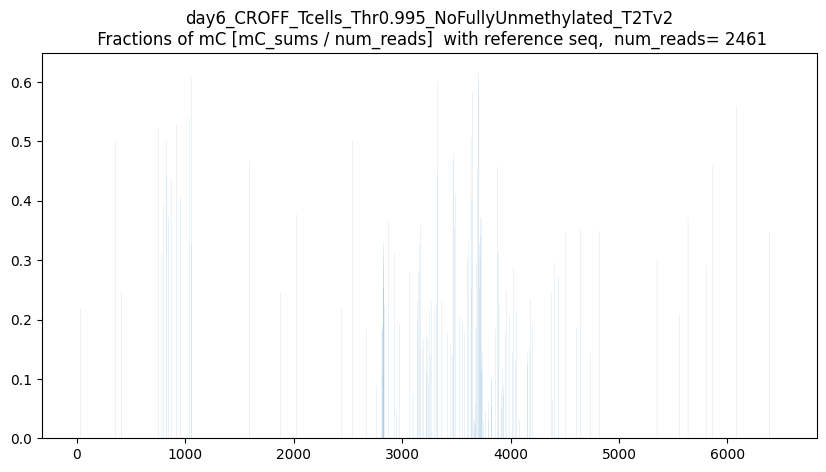

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



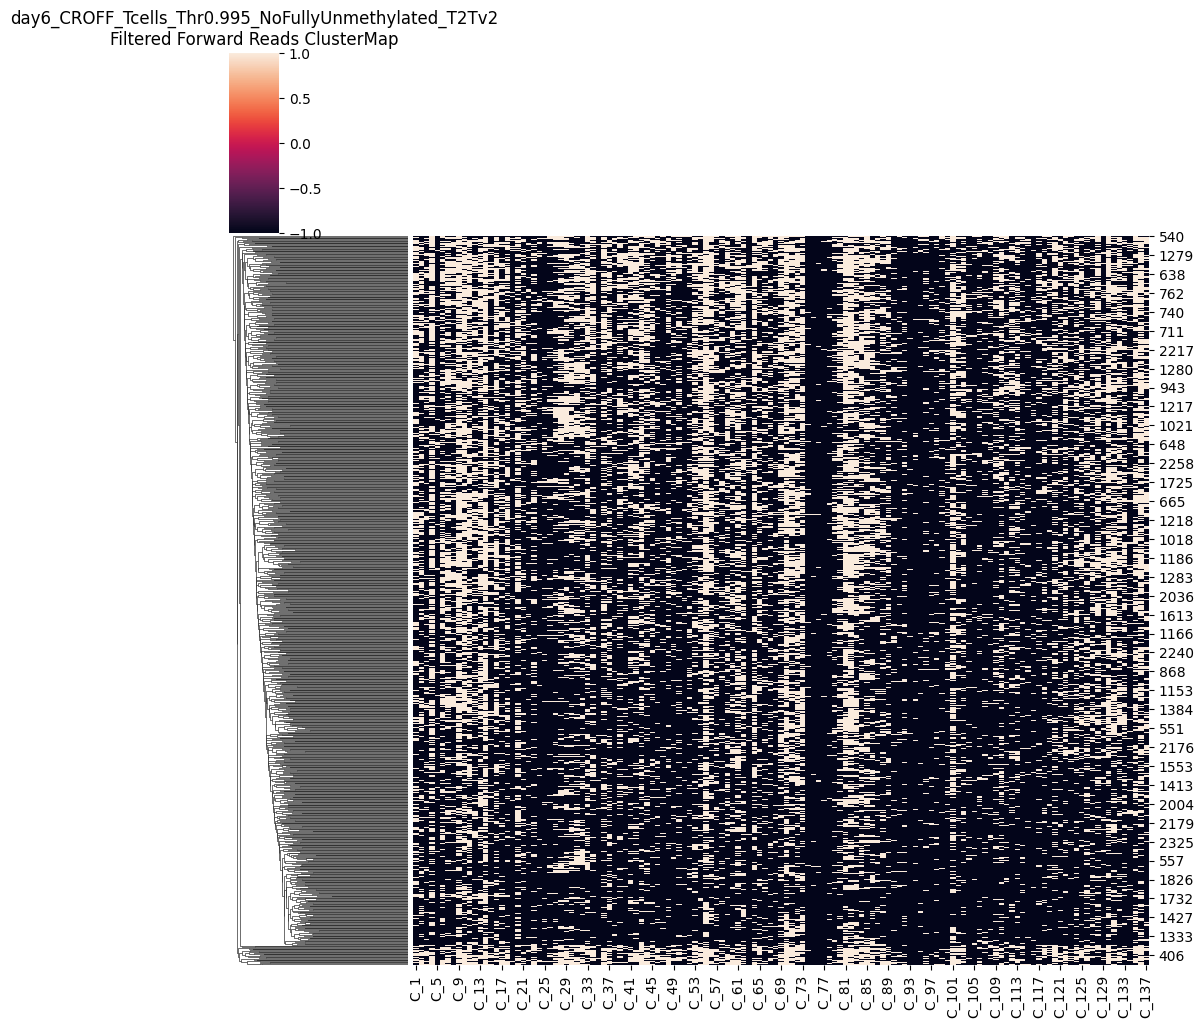

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



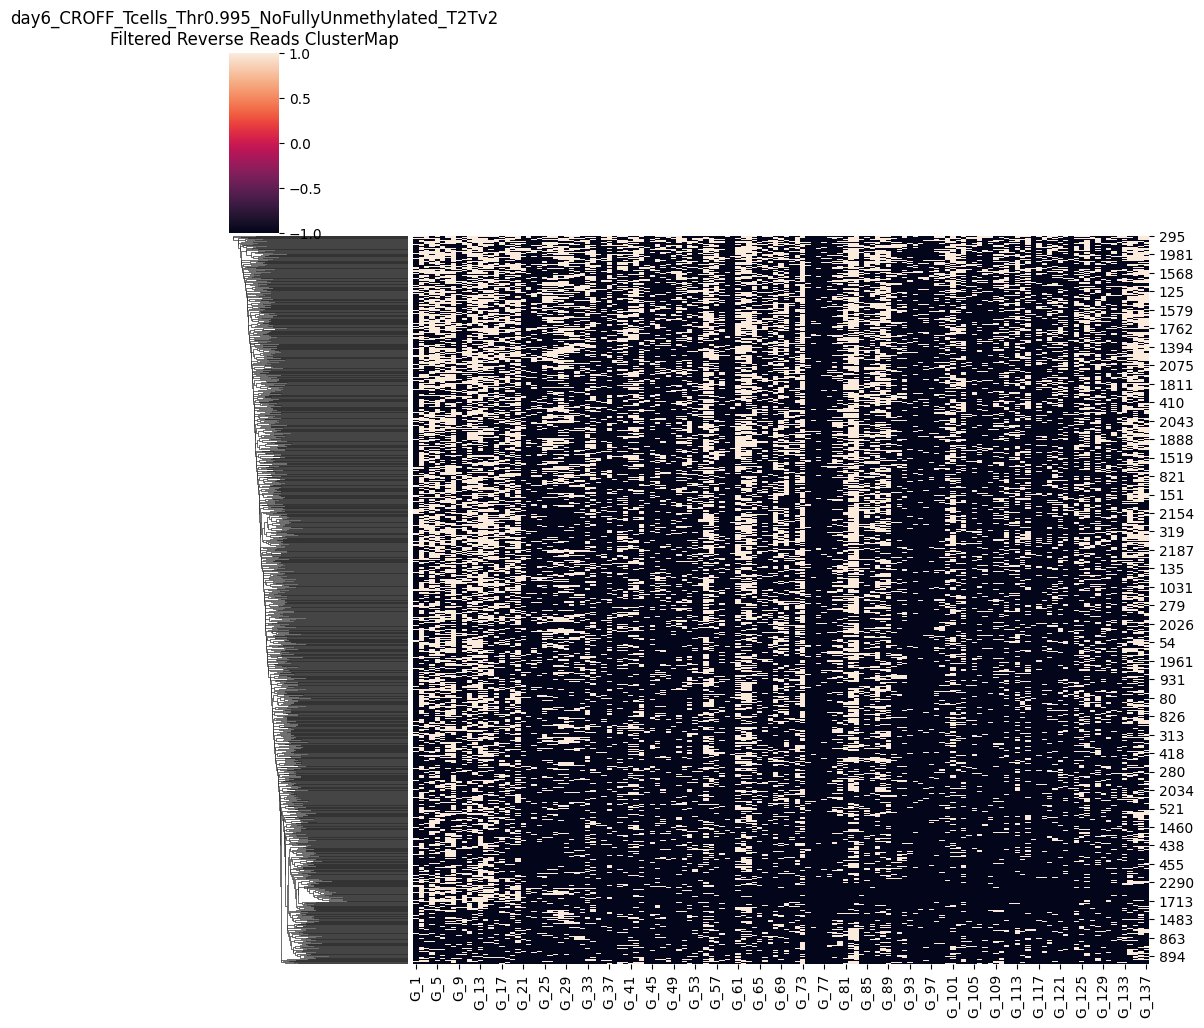

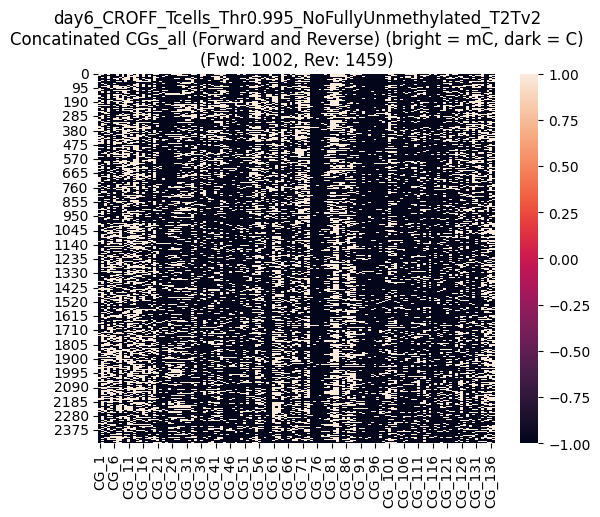

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



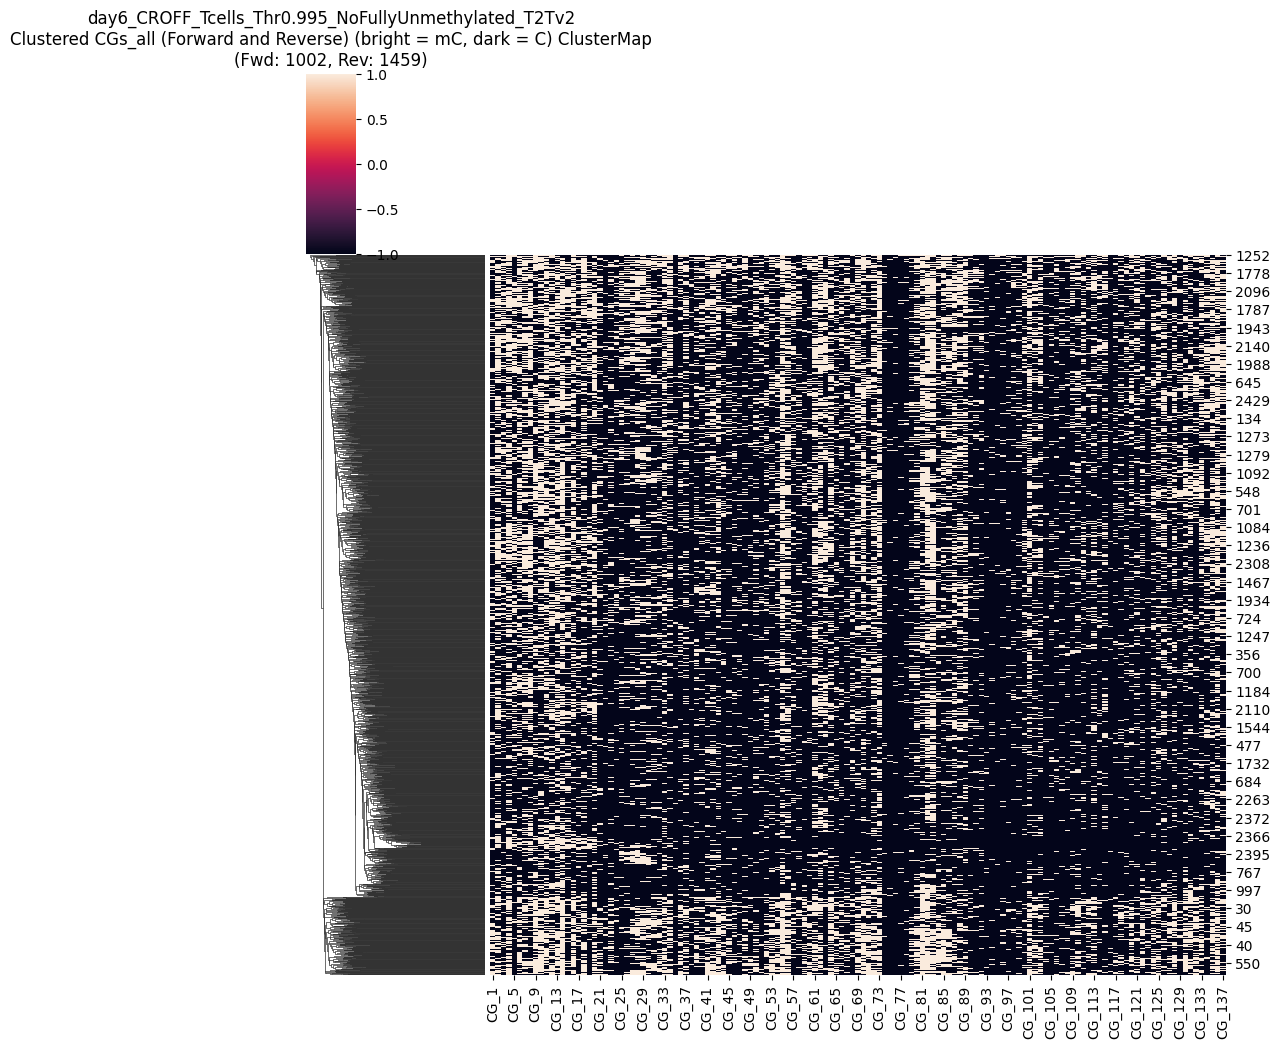

CGs_all saved as CG_137_removed_low50_methylated_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD1002_numRVS1459.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   NaN    NaN  ...   
2      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN    NaN  ...   
3      NaN   1.0   NaN   1.0   NaN   NaN   1.0   NaN   1.0    1.0  ...   
4      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
2456   NaN   1.0   NaN   NaN   NaN   NaN   1.0   1.0   NaN    NaN  ...   
2457   NaN   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
2458   1.0   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
2459   NaN   1.0   NaN   1.0   NaN   NaN   1.0   1.0   1.0    NaN  ...   
2460   NaN   NaN   NaN   1.0   NaN   NaN   1.0   1.0   NaN    NaN  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
2        NaN     NaN     1.0     NaN     1.0     1.0     NaN     NaN     NaN   
3        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
4        NaN     1.0     1.0     NaN     1.0     NaN     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2456     NaN     NaN     NaN     NaN     NaN     NaN     NaN     1.0     1.0   
2457     NaN     1.0     NaN     NaN     NaN     NaN     NaN     1.0     1.0   
2458     1.0     NaN     NaN     NaN     NaN     1.0     1.0     NaN     NaN   
2459     1.0     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
2460     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      CG_137  
0        1.0  
1        NaN  
2        NaN  
3        NaN  
4        1.0  
...      ...  
2456     NaN  
2457     NaN  
2458     1.0  
2459     NaN  
2460     NaN  

[2461 rows x 137 columns]

In [36]:
threshold_percent = 50
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_silenced_remove_low50 = CGs_all
CGs_all_silenced_remove_low50

In [32]:
CGs_all

CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   NaN    NaN  ...   
2      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN    NaN  ...   
3      NaN   1.0   NaN   1.0   NaN   NaN   1.0   NaN   1.0    1.0  ...   
4      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
2456   NaN   1.0   NaN   NaN   NaN   NaN   1.0   1.0   NaN    NaN  ...   
2457   NaN   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
2458   1.0   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
2459   NaN   1.0   NaN   1.0   NaN   NaN   1.0   1.0   1.0    NaN  ...   
2460   NaN   NaN   NaN   1.0   NaN   NaN   1.0   1.0   NaN    NaN  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
2        NaN     NaN     1.0     NaN     1.0     1.0     NaN     NaN     NaN   
3        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
4        NaN     1.0     1.0     NaN     1.0     NaN     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2456     NaN     NaN     NaN     NaN     NaN     NaN     NaN     1.0     1.0   
2457     NaN     1.0     NaN     NaN     NaN     NaN     NaN     1.0     1.0   
2458     1.0     NaN     NaN     NaN     NaN     1.0     1.0     NaN     NaN   
2459     1.0     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
2460     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      CG_137  
0        1.0  
1        NaN  
2        NaN  
3        NaN  
4        1.0  
...      ...  
2456     NaN  
2457     NaN  
2458     1.0  
2459     NaN  
2460     NaN  

[2461 rows x 137 columns]

In [35]:
CGs_all_silenced_remove_low80 = CGs_all
CGs_all_silenced_remove_low80

CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   NaN    NaN  ...   
2      NaN   1.0   NaN   1.0   NaN   NaN   1.0   NaN   1.0    1.0  ...   
3      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   1.0    1.0  ...   
4      1.0   1.0   NaN   1.0   NaN   NaN   1.0   NaN   1.0    NaN  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1970   1.0   1.0   NaN   NaN   1.0   1.0   NaN   1.0   1.0    1.0  ...   
1971   NaN   NaN   NaN   1.0   1.0   1.0   NaN   1.0   NaN    1.0  ...   
1972   NaN   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
1973   1.0   1.0   NaN   NaN   1.0   NaN   NaN   1.0   1.0    1.0  ...   
1974   NaN   1.0   NaN   1.0   NaN   NaN   1.0   1.0   1.0    NaN  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
2        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
3        NaN     1.0     1.0     NaN     1.0     NaN     NaN     1.0     1.0   
4        NaN     NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1970     1.0     NaN     1.0     NaN     NaN     1.0     NaN     1.0     NaN   
1971     1.0     NaN     1.0     NaN     NaN     NaN     NaN     NaN     1.0   
1972     NaN     1.0     NaN     NaN     NaN     NaN     NaN     1.0     1.0   
1973     1.0     NaN     NaN     NaN     NaN     1.0     1.0     NaN     NaN   
1974     1.0     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   

      CG_137  
0        1.0  
1        NaN  
2        NaN  
3        1.0  
4        NaN  
...      ...  
1970     NaN  
1971     NaN  
1972     NaN  
1973     1.0  
1974     NaN  

[1975 rows x 137 columns]

# Compare frequencies

In [ ]:
# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_cut.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_cut) 

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_cut.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_cut) 

# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='Silenced')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='Unedited')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

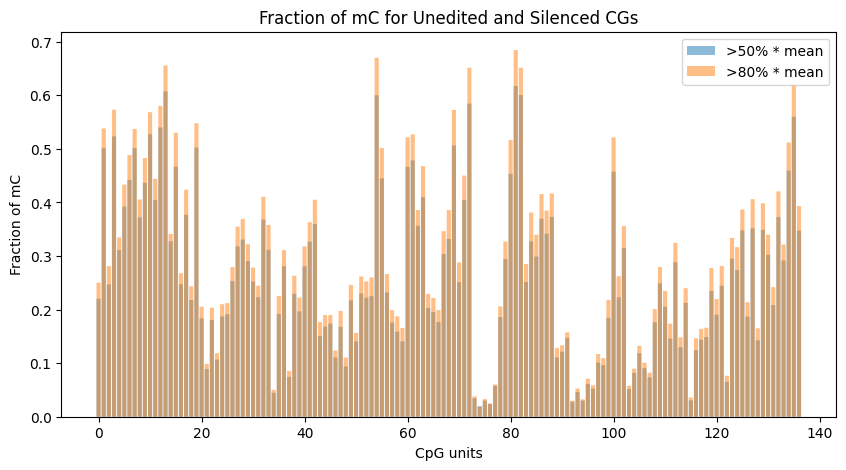

In [44]:
# CGs_all_silenced_remove_low80 vs. CGs_all_silenced_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_silenced_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_silenced_remove_low80) 


# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

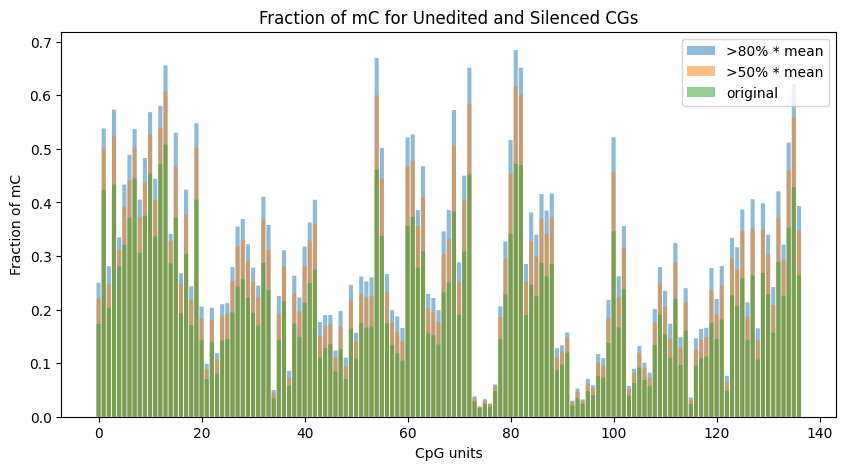

In [68]:
# CGs_all_silenced_remove_low80 vs. CGs_all_silenced_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_silenced_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_silenced_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_silenced_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

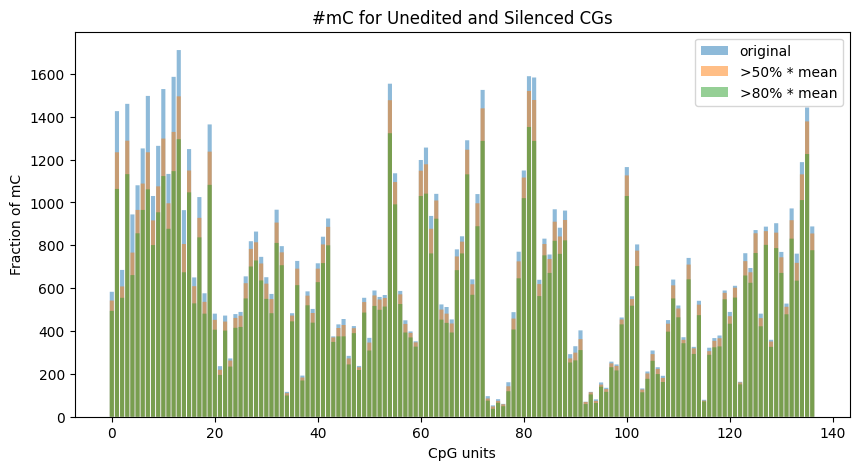

In [70]:
# CGs_all_silenced_remove_low80 vs. CGs_all_silenced_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums #/ len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_silenced_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums #/ len(CGs_all_silenced_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_silenced_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums #/ len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut


plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [59]:
CGs_all_unedited_remove_low80
CGs_all_unedited_remove_low50 

CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   1.0   1.0   1.0   NaN   NaN   1.0   NaN   NaN    NaN  ...   
2      NaN   1.0   NaN   1.0   NaN   1.0   1.0   1.0   1.0    1.0  ...   
3      NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN    1.0  ...   
4      NaN   NaN   1.0   1.0   NaN   1.0   1.0   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1436   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN    NaN  ...   
1437   NaN   1.0   NaN   1.0   1.0   1.0   NaN   NaN   NaN    NaN  ...   
1438   NaN   NaN   1.0   NaN   1.0   NaN   1.0   1.0   NaN    1.0  ...   
1439   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN    NaN  ...   
1440   NaN   NaN   NaN   NaN   1.0   1.0   NaN   NaN   NaN    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     NaN     NaN     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
2        NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
3        1.0     1.0     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
4        1.0     1.0     NaN     1.0     NaN     NaN     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1436     1.0     1.0     NaN     1.0     NaN     1.0     NaN     1.0     NaN   
1437     1.0     NaN     NaN     1.0     NaN     1.0     NaN     NaN     NaN   
1438     NaN     NaN     1.0     NaN     NaN     NaN     1.0     1.0     1.0   
1439     NaN     NaN     NaN     NaN     1.0     NaN     1.0     1.0     1.0   
1440     NaN     NaN     NaN     NaN     NaN     1.0     NaN     1.0     NaN   

      CG_137  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
1436     NaN  
1437     NaN  
1438     1.0  
1439     NaN  
1440     NaN  

[1441 rows x 137 columns]

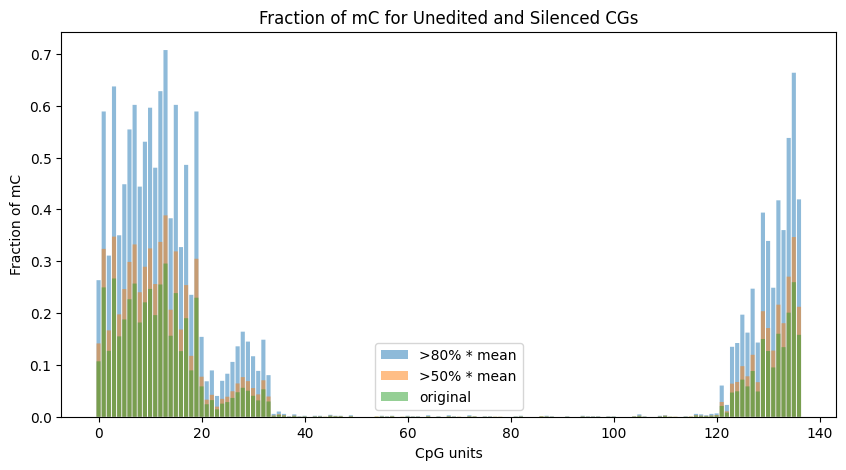

In [67]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [63]:
plt.show()

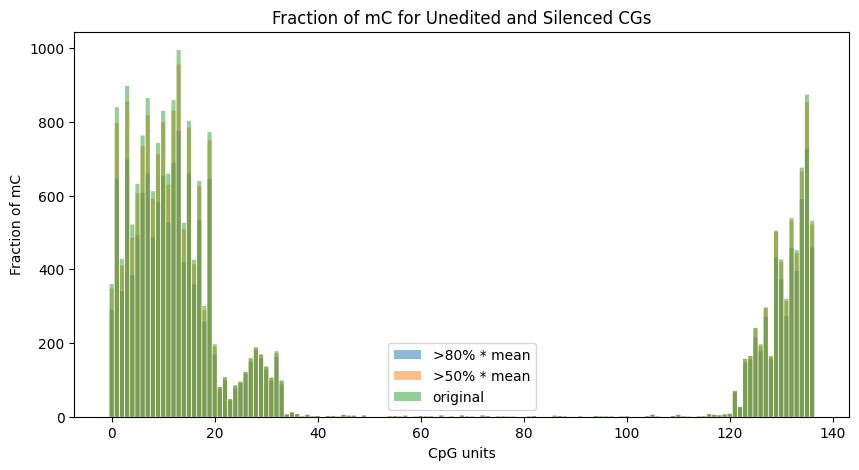

In [64]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  #/ len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  #/ len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums # / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

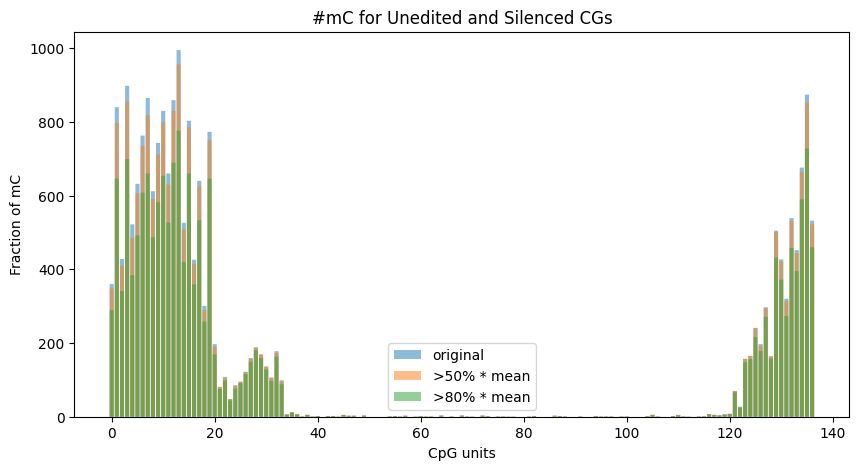

In [66]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  #/ len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  #/ len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums # / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut



plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [72]:
CGs_all_unedited_remove_low70

CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
1      NaN   1.0   1.0   1.0   NaN   NaN   1.0   NaN   NaN    NaN  ...   
2      NaN   1.0   NaN   1.0   NaN   1.0   1.0   1.0   1.0    1.0  ...   
3      NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN    1.0  ...   
4      NaN   NaN   1.0   1.0   NaN   1.0   1.0   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1214   NaN   1.0   NaN   NaN   NaN   1.0   1.0   1.0   NaN    NaN  ...   
1215   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
1216   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN    NaN  ...   
1217   NaN   1.0   NaN   1.0   1.0   1.0   NaN   NaN   NaN    NaN  ...   
1218   NaN   NaN   1.0   NaN   1.0   NaN   1.0   1.0   NaN    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     NaN     NaN     1.0     1.0     NaN     1.0     NaN   
1        NaN     NaN     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
2        NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
3        1.0     1.0     1.0     1.0     NaN     1.0     NaN     1.0     1.0   
4        1.0     1.0     NaN     1.0     NaN     NaN     NaN     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1214     NaN     NaN     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
1215     NaN     NaN     NaN     NaN     NaN     NaN     1.0     1.0     1.0   
1216     1.0     1.0     NaN     1.0     NaN     1.0     NaN     1.0     NaN   
1217     1.0     NaN     NaN     1.0     NaN     1.0     NaN     NaN     NaN   
1218     NaN     NaN     1.0     NaN     NaN     NaN     1.0     1.0     1.0   

      CG_137  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
1214     1.0  
1215     NaN  
1216     NaN  
1217     NaN  
1218     1.0  

[1219 rows x 137 columns]

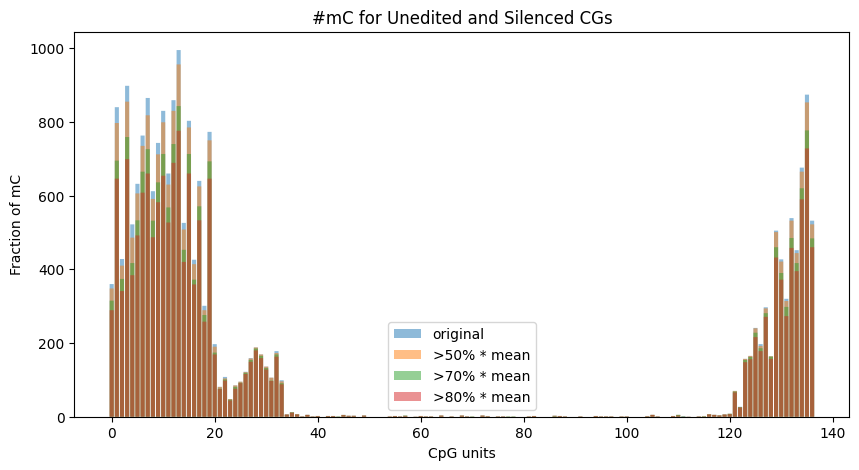

In [ ]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  #/ len(CGs_all_silenced_remove_low50) 


CGs_all_unedited_remove_low70_sums = np.nansum(CGs_all_unedited_remove_low70.values, axis=0) 
CGs_all_unedited_remove_low70_frac = CGs_all_unedited_remove_low70_sums  #/ len(CGs_all_unedited_remove_low70) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  #/ len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums # / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut



plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_unedited_remove_low70_sums)), CGs_all_unedited_remove_low70_frac, snap=False, alpha=0.5, label='>70% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

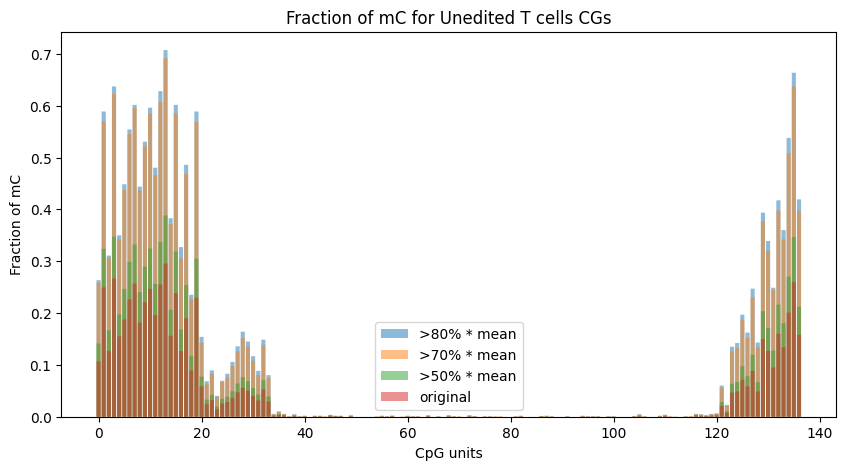

In [81]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  /len(CGs_all_silenced_remove_low50) 


CGs_all_unedited_remove_low70_sums = np.nansum(CGs_all_unedited_remove_low70.values, axis=0) 
CGs_all_unedited_remove_low70_frac = CGs_all_unedited_remove_low70_sums  / len(CGs_all_unedited_remove_low70) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  / len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut



plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')
plt.bar(np.arange(len(CGs_all_unedited_remove_low70_sums)), CGs_all_unedited_remove_low70_frac, snap=False, alpha=0.5, label='>70% * mean')
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')
plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs')
plt.legend()

# Show the plot
plt.show()